# MNIST digit recognition with MLPclassifier

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math

## Read data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

display(train_df.head(1))
display(test_df.head(1))

print(train_df.info())
print(test_df.info())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


## Prepare X,y and plot

<IPython.core.display.Math object>

<IPython.core.display.Math object>

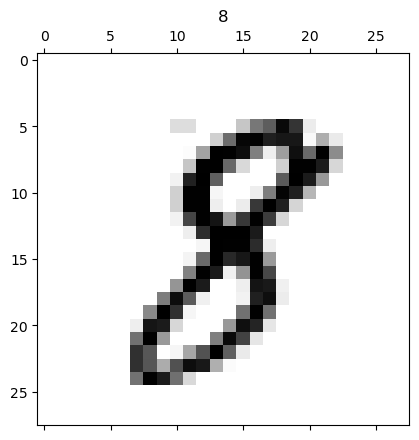

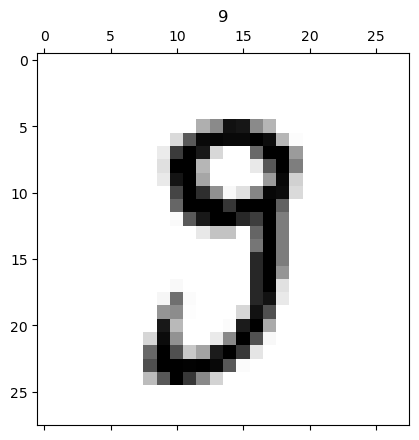

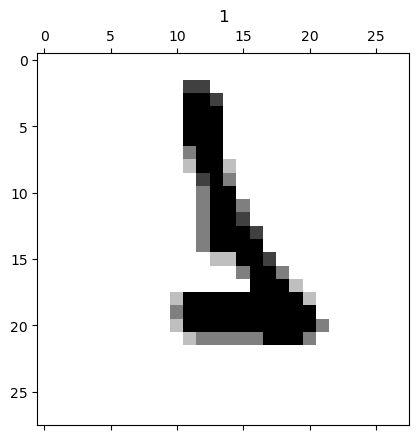

In [3]:
X = train_df.drop(columns=['label'],axis=1).values.astype('float32')/255
y = train_df['label'].values.astype('int32')

display(Math(f"X \\in [{np.min(X)},{np.max(X)}]"))
display(Math(f"y \\in [{np.min(y)},{np.max(y)}]"))

def plt_image(ex_idx):
    ex_label = y[ex_idx]
    ex_image = X[ex_idx,:].reshape(28,28)
    plt.matshow(ex_image,cmap='binary')
    plt.title(ex_label)
    plt.show() 

ex_idxs = [20,40,60]
for ex_idx in ex_idxs:
    plt_image(ex_idx)

## MLP classifier

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier(max_iter=200,verbose=True)

param_grid = {'hidden_layer_sizes': [(100,),(400,100),(100,100,100)],
              'activation': ['relu','logistic'],
              'solver': ['adam','sgd'],
              'alpha': [0.0001,0.001,0.01],
              'batch_size': [50,100,200]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, refit=False, scoring='accuracy',verbose=2)
grid_search.fit(X,y)

print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Iteration 1, loss = 0.37295633
Iteration 2, loss = 0.17225538
Iteration 3, loss = 0.12352998
Iteration 4, loss = 0.09451591
Iteration 5, loss = 0.07492742
Iteration 6, loss = 0.06144740
Iteration 7, loss = 0.04919556
Iteration 8, loss = 0.04156113
Iteration 9, loss = 0.03400888
Iteration 10, loss = 0.02873998
Iteration 11, loss = 0.02383651
Iteration 12, loss = 0.01959767
Iteration 13, loss = 0.01675616
Iteration 14, loss = 0.01470996
Iteration 15, loss = 0.01279907
Iteration 16, loss = 0.01076655
Iteration 17, loss = 0.00912821
Iteration 18, loss = 0.00990122
Iteration 19, loss = 0.01021190
Iteration 20, loss = 0.00616851
Iteration 21, loss = 0.01010955
Iteration 22, loss = 0.00523257
Iteration 23, loss = 0.00756719
Iteration 24, loss = 0.00559569
Iteration 25, loss = 0.00370070
Iteration 26, loss = 0.00839332
Iteration 27, loss = 0.00802532
Iteration 28, loss = 0.00422385
Iteration 29, loss = 0.00251014
Iteration 30, loss

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.01879221
Iteration 2, loss = 0.46352547
Iteration 3, loss = 0.38024529
Iteration 4, loss = 0.34152610
Iteration 5, loss = 0.31664204
Iteration 6, loss = 0.29830634
Iteration 7, loss = 0.28361104
Iteration 8, loss = 0.27136751
Iteration 9, loss = 0.26092070
Iteration 10, loss = 0.25127391
Iteration 11, loss = 0.24257422
Iteration 12, loss = 0.23459725
Iteration 13, loss = 0.22738057
Iteration 14, loss = 0.22022156
Iteration 15, loss = 0.21401159
Iteration 16, loss = 0.20786282
Iteration 17, loss = 0.20195432
Iteration 18, loss = 0.19663253
Iteration 19, loss = 0.19127855
Iteration 20, loss = 0.18656981
Iteration 21, loss = 0.18155105
Iteration 22, loss = 0.17708608
Iteration 23, loss = 0.17307143
Iteration 24, loss = 0.16870236
Iteration 25, loss = 0.16501996
Iteration 26, loss = 0.16121898
Iteration 27, loss = 0.15776495
Iteration 28, loss = 0.15424575
Iteration 29, loss = 0.15109390
Iteration 30, loss = 0.14779712
Iteration 31, loss = 0.14476143
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.01914783
Iteration 2, loss = 0.46478022
Iteration 3, loss = 0.38160881
Iteration 4, loss = 0.34294989
Iteration 5, loss = 0.31882726
Iteration 6, loss = 0.30100215
Iteration 7, loss = 0.28718149
Iteration 8, loss = 0.27521223
Iteration 9, loss = 0.26489546
Iteration 10, loss = 0.25566354
Iteration 11, loss = 0.24708449
Iteration 12, loss = 0.23931154
Iteration 13, loss = 0.23209221
Iteration 14, loss = 0.22516013
Iteration 15, loss = 0.21896410
Iteration 16, loss = 0.21280376
Iteration 17, loss = 0.20710239
Iteration 18, loss = 0.20140805
Iteration 19, loss = 0.19623415
Iteration 20, loss = 0.19130491
Iteration 21, loss = 0.18635776
Iteration 22, loss = 0.18199281
Iteration 23, loss = 0.17756432
Iteration 24, loss = 0.17334862
Iteration 25, loss = 0.16946251
Iteration 26, loss = 0.16543644
Iteration 27, loss = 0.16193135
Iteration 28, loss = 0.15822725
Iteration 29, loss = 0.15474531
Iteration 30, loss = 0.15154201
Iteration 31, loss = 0.14825931
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.00808834
Iteration 2, loss = 0.47363595
Iteration 3, loss = 0.38984075
Iteration 4, loss = 0.34981513
Iteration 5, loss = 0.32453110
Iteration 6, loss = 0.30566829
Iteration 7, loss = 0.29028066
Iteration 8, loss = 0.27735504
Iteration 9, loss = 0.26573283
Iteration 10, loss = 0.25553004
Iteration 11, loss = 0.24603939
Iteration 12, loss = 0.23760593
Iteration 13, loss = 0.22942408
Iteration 14, loss = 0.22206706
Iteration 15, loss = 0.21485925
Iteration 16, loss = 0.20840290
Iteration 17, loss = 0.20210076
Iteration 18, loss = 0.19633029
Iteration 19, loss = 0.19095009
Iteration 20, loss = 0.18579467
Iteration 21, loss = 0.18087767
Iteration 22, loss = 0.17615651
Iteration 23, loss = 0.17174416
Iteration 24, loss = 0.16729361
Iteration 25, loss = 0.16319466
Iteration 26, loss = 0.15952623
Iteration 27, loss = 0.15585624
Iteration 28, loss = 0.15228840
Iteration 29, loss = 0.14872829
Iteration 30, loss = 0.14560369
Iteration 31, loss = 0.14255274
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.08255641
Iteration 2, loss = 0.48498479
Iteration 3, loss = 0.39576217
Iteration 4, loss = 0.35495437
Iteration 5, loss = 0.32910796
Iteration 6, loss = 0.31032244
Iteration 7, loss = 0.29534115
Iteration 8, loss = 0.28254044
Iteration 9, loss = 0.27142761
Iteration 10, loss = 0.26127236
Iteration 11, loss = 0.25227248
Iteration 12, loss = 0.24412073
Iteration 13, loss = 0.23617877
Iteration 14, loss = 0.22929353
Iteration 15, loss = 0.22249200
Iteration 16, loss = 0.21610071
Iteration 17, loss = 0.21014315
Iteration 18, loss = 0.20452533
Iteration 19, loss = 0.19920538
Iteration 20, loss = 0.19423980
Iteration 21, loss = 0.18942405
Iteration 22, loss = 0.18465749
Iteration 23, loss = 0.18046142
Iteration 24, loss = 0.17637708
Iteration 25, loss = 0.17228640
Iteration 26, loss = 0.16850275
Iteration 27, loss = 0.16469452
Iteration 28, loss = 0.16108086
Iteration 29, loss = 0.15759546
Iteration 30, loss = 0.15412926
Iteration 31, loss = 0.15110277
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.26978195
Iteration 2, loss = 0.10497960
Iteration 3, loss = 0.06729771
Iteration 4, loss = 0.04929030
Iteration 5, loss = 0.03370663
Iteration 6, loss = 0.02517883
Iteration 7, loss = 0.02175793
Iteration 8, loss = 0.02249092
Iteration 9, loss = 0.01931223
Iteration 10, loss = 0.01641332
Iteration 11, loss = 0.01693130
Iteration 12, loss = 0.01336040
Iteration 13, loss = 0.01274018
Iteration 14, loss = 0.01710945
Iteration 15, loss = 0.01089729
Iteration 16, loss = 0.01218402
Iteration 17, loss = 0.01583548
Iteration 18, loss = 0.01019031
Iteration 19, loss = 0.00606815
Iteration 20, loss = 0.00999694
Iteration 21, loss = 0.01940810
Iteration 22, loss = 0.01006982
Iteration 23, loss = 0.00983979
Iteration 24, loss = 0.01031591
Iteration 25, loss = 0.00975740
Iteration 26, loss = 0.01277033
Iteration 27, loss = 0.01102770
Iteration 28, loss = 0.00562669
Iteration 29, loss = 0.00458546
Iteration 30, loss = 0.01571113
Iteration 31, loss = 0.01005285
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.40075408
Iteration 2, loss = 0.66020750
Iteration 3, loss = 0.50244213
Iteration 4, loss = 0.43584958
Iteration 5, loss = 0.39768679
Iteration 6, loss = 0.37178343
Iteration 7, loss = 0.35293999
Iteration 8, loss = 0.33783943
Iteration 9, loss = 0.32563913
Iteration 10, loss = 0.31512441
Iteration 11, loss = 0.30631140
Iteration 12, loss = 0.29816891
Iteration 13, loss = 0.29126391
Iteration 14, loss = 0.28458803
Iteration 15, loss = 0.27816810
Iteration 16, loss = 0.27273791
Iteration 17, loss = 0.26735926
Iteration 18, loss = 0.26238358
Iteration 19, loss = 0.25750340
Iteration 20, loss = 0.25298789
Iteration 21, loss = 0.24855893
Iteration 22, loss = 0.24436228
Iteration 23, loss = 0.24017962
Iteration 24, loss = 0.23639047
Iteration 25, loss = 0.23262235
Iteration 26, loss = 0.22897143
Iteration 27, loss = 0.22537816
Iteration 28, loss = 0.22184043
Iteration 29, loss = 0.21865250
Iteration 30, loss = 0.21534095
Iteration 31, loss = 0.21229077
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.40972031
Iteration 2, loss = 0.66925119
Iteration 3, loss = 0.50647514
Iteration 4, loss = 0.43640069
Iteration 5, loss = 0.39616077
Iteration 6, loss = 0.36967205
Iteration 7, loss = 0.35019842
Iteration 8, loss = 0.33505932
Iteration 9, loss = 0.32209361
Iteration 10, loss = 0.31153444
Iteration 11, loss = 0.30222897
Iteration 12, loss = 0.29386567
Iteration 13, loss = 0.28638057
Iteration 14, loss = 0.27925410
Iteration 15, loss = 0.27283821
Iteration 16, loss = 0.26685494
Iteration 17, loss = 0.26107134
Iteration 18, loss = 0.25577100
Iteration 19, loss = 0.25067534
Iteration 20, loss = 0.24580964
Iteration 21, loss = 0.24136311
Iteration 22, loss = 0.23700711
Iteration 23, loss = 0.23280719
Iteration 24, loss = 0.22887256
Iteration 25, loss = 0.22501182
Iteration 26, loss = 0.22131290
Iteration 27, loss = 0.21775701
Iteration 28, loss = 0.21447910
Iteration 29, loss = 0.21125974
Iteration 30, loss = 0.20808565
Iteration 31, loss = 0.20505237
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.41666679
Iteration 2, loss = 0.65327597
Iteration 3, loss = 0.49773266
Iteration 4, loss = 0.43201693
Iteration 5, loss = 0.39412196
Iteration 6, loss = 0.36841783
Iteration 7, loss = 0.34949694
Iteration 8, loss = 0.33471877
Iteration 9, loss = 0.32242132
Iteration 10, loss = 0.31190641
Iteration 11, loss = 0.30291434
Iteration 12, loss = 0.29468810
Iteration 13, loss = 0.28719431
Iteration 14, loss = 0.28042899
Iteration 15, loss = 0.27412885
Iteration 16, loss = 0.26829476
Iteration 17, loss = 0.26274665
Iteration 18, loss = 0.25747495
Iteration 19, loss = 0.25264094
Iteration 20, loss = 0.24789572
Iteration 21, loss = 0.24355349
Iteration 22, loss = 0.23930321
Iteration 23, loss = 0.23512232
Iteration 24, loss = 0.23134912
Iteration 25, loss = 0.22761495
Iteration 26, loss = 0.22384090
Iteration 27, loss = 0.22025562
Iteration 28, loss = 0.21695393
Iteration 29, loss = 0.21380941
Iteration 30, loss = 0.21037715
Iteration 31, loss = 0.20732371
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.46182066
Iteration 2, loss = 0.69639922
Iteration 3, loss = 0.52209974
Iteration 4, loss = 0.44890389
Iteration 5, loss = 0.40733805
Iteration 6, loss = 0.37946880
Iteration 7, loss = 0.35910981
Iteration 8, loss = 0.34314907
Iteration 9, loss = 0.33012146
Iteration 10, loss = 0.31900938
Iteration 11, loss = 0.30915197
Iteration 12, loss = 0.30067067
Iteration 13, loss = 0.29286609
Iteration 14, loss = 0.28583957
Iteration 15, loss = 0.27920358
Iteration 16, loss = 0.27304898
Iteration 17, loss = 0.26738113
Iteration 18, loss = 0.26216285
Iteration 19, loss = 0.25690972
Iteration 20, loss = 0.25216114
Iteration 21, loss = 0.24744068
Iteration 22, loss = 0.24311349
Iteration 23, loss = 0.23882365
Iteration 24, loss = 0.23474988
Iteration 25, loss = 0.23092752
Iteration 26, loss = 0.22721414
Iteration 27, loss = 0.22356504
Iteration 28, loss = 0.22006242
Iteration 29, loss = 0.21676763
Iteration 30, loss = 0.21374782
Iteration 31, loss = 0.21043143
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.31652241
Iteration 2, loss = 0.12217755
Iteration 3, loss = 0.07610389
Iteration 4, loss = 0.05094367
Iteration 5, loss = 0.03575384
Iteration 6, loss = 0.02309515
Iteration 7, loss = 0.02108098
Iteration 8, loss = 0.01710485
Iteration 9, loss = 0.01471461
Iteration 10, loss = 0.01208376
Iteration 11, loss = 0.01401170
Iteration 12, loss = 0.00729946
Iteration 13, loss = 0.01060889
Iteration 14, loss = 0.01434919
Iteration 15, loss = 0.01290746
Iteration 16, loss = 0.00861585
Iteration 17, loss = 0.01593334
Iteration 18, loss = 0.00420798
Iteration 19, loss = 0.00831782
Iteration 20, loss = 0.00960795
Iteration 21, loss = 0.00570079
Iteration 22, loss = 0.00598692
Iteration 23, loss = 0.01203859
Iteration 24, loss = 0.00247504
Iteration 25, loss = 0.00184621
Iteration 26, loss = 0.00132289
Iteration 27, loss = 0.00122772
Iteration 28, loss = 0.00119910
Iteration 29, loss = 0.00117716
Iteration 30, loss = 0.00115590
Iteration 31, loss = 0.00113477
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36704264
Iteration 2, loss = 0.54398146
Iteration 3, loss = 0.40729282
Iteration 4, loss = 0.35264815
Iteration 5, loss = 0.32054222
Iteration 6, loss = 0.29806032
Iteration 7, loss = 0.28009283
Iteration 8, loss = 0.26521822
Iteration 9, loss = 0.25266231
Iteration 10, loss = 0.24161724
Iteration 11, loss = 0.23138371
Iteration 12, loss = 0.22234667
Iteration 13, loss = 0.21396862
Iteration 14, loss = 0.20621375
Iteration 15, loss = 0.19886776
Iteration 16, loss = 0.19199961
Iteration 17, loss = 0.18577378
Iteration 18, loss = 0.17943882
Iteration 19, loss = 0.17417660
Iteration 20, loss = 0.16889837
Iteration 21, loss = 0.16377460
Iteration 22, loss = 0.15910794
Iteration 23, loss = 0.15448346
Iteration 24, loss = 0.15007885
Iteration 25, loss = 0.14615555
Iteration 26, loss = 0.14199379
Iteration 27, loss = 0.13830383
Iteration 28, loss = 0.13471654
Iteration 29, loss = 0.13125900
Iteration 30, loss = 0.12781903
Iteration 31, loss = 0.12464039
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.35825147
Iteration 2, loss = 0.54859186
Iteration 3, loss = 0.40951654
Iteration 4, loss = 0.35315604
Iteration 5, loss = 0.31955768
Iteration 6, loss = 0.29672433
Iteration 7, loss = 0.27847086
Iteration 8, loss = 0.26322164
Iteration 9, loss = 0.25011701
Iteration 10, loss = 0.23888309
Iteration 11, loss = 0.22854846
Iteration 12, loss = 0.21950304
Iteration 13, loss = 0.21073856
Iteration 14, loss = 0.20295830
Iteration 15, loss = 0.19514833
Iteration 16, loss = 0.18856596
Iteration 17, loss = 0.18187870
Iteration 18, loss = 0.17593130
Iteration 19, loss = 0.16982556
Iteration 20, loss = 0.16470751
Iteration 21, loss = 0.15926829
Iteration 22, loss = 0.15473755
Iteration 23, loss = 0.15000986
Iteration 24, loss = 0.14559228
Iteration 25, loss = 0.14125835
Iteration 26, loss = 0.13745440
Iteration 27, loss = 0.13352134
Iteration 28, loss = 0.12999541
Iteration 29, loss = 0.12660163
Iteration 30, loss = 0.12316136
Iteration 31, loss = 0.12010730
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.41973127
Iteration 2, loss = 0.57852613
Iteration 3, loss = 0.42432515
Iteration 4, loss = 0.36343165
Iteration 5, loss = 0.32860997
Iteration 6, loss = 0.30507791
Iteration 7, loss = 0.28685849
Iteration 8, loss = 0.27189603
Iteration 9, loss = 0.25932380
Iteration 10, loss = 0.24847543
Iteration 11, loss = 0.23841186
Iteration 12, loss = 0.22905796
Iteration 13, loss = 0.22067728
Iteration 14, loss = 0.21255349
Iteration 15, loss = 0.20586168
Iteration 16, loss = 0.19837251
Iteration 17, loss = 0.19228199
Iteration 18, loss = 0.18608675
Iteration 19, loss = 0.18005206
Iteration 20, loss = 0.17491454
Iteration 21, loss = 0.16970375
Iteration 22, loss = 0.16455308
Iteration 23, loss = 0.15948349
Iteration 24, loss = 0.15514860
Iteration 25, loss = 0.15045499
Iteration 26, loss = 0.14645044
Iteration 27, loss = 0.14224948
Iteration 28, loss = 0.13856859
Iteration 29, loss = 0.13461353
Iteration 30, loss = 0.13101151
Iteration 31, loss = 0.12748843
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37376578
Iteration 2, loss = 0.55063190
Iteration 3, loss = 0.41297196
Iteration 4, loss = 0.35805798
Iteration 5, loss = 0.32643702
Iteration 6, loss = 0.30364581
Iteration 7, loss = 0.28615583
Iteration 8, loss = 0.27125444
Iteration 9, loss = 0.25898934
Iteration 10, loss = 0.24775068
Iteration 11, loss = 0.23794656
Iteration 12, loss = 0.22859294
Iteration 13, loss = 0.22039963
Iteration 14, loss = 0.21286480
Iteration 15, loss = 0.20539321
Iteration 16, loss = 0.19844159
Iteration 17, loss = 0.19228941
Iteration 18, loss = 0.18597943
Iteration 19, loss = 0.18041383
Iteration 20, loss = 0.17471463
Iteration 21, loss = 0.16952747
Iteration 22, loss = 0.16470207
Iteration 23, loss = 0.15974099
Iteration 24, loss = 0.15490367
Iteration 25, loss = 0.15073509
Iteration 26, loss = 0.14676733
Iteration 27, loss = 0.14274870
Iteration 28, loss = 0.13893944
Iteration 29, loss = 0.13501139
Iteration 30, loss = 0.13178134
Iteration 31, loss = 0.12832201
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.40408029
Iteration 2, loss = 0.15809320
Iteration 3, loss = 0.10539299
Iteration 4, loss = 0.07997723
Iteration 5, loss = 0.05915609
Iteration 6, loss = 0.04687960
Iteration 7, loss = 0.03750140
Iteration 8, loss = 0.03197810
Iteration 9, loss = 0.02720507
Iteration 10, loss = 0.02112453
Iteration 11, loss = 0.02005264
Iteration 12, loss = 0.01488737
Iteration 13, loss = 0.01731260
Iteration 14, loss = 0.02140952
Iteration 15, loss = 0.01462453
Iteration 16, loss = 0.01113501
Iteration 17, loss = 0.01486563
Iteration 18, loss = 0.01405725
Iteration 19, loss = 0.00691302
Iteration 20, loss = 0.00830687
Iteration 21, loss = 0.00832213
Iteration 22, loss = 0.01991589
Iteration 23, loss = 0.01103749
Iteration 24, loss = 0.00443311
Iteration 25, loss = 0.00147525
Iteration 26, loss = 0.01010989
Iteration 27, loss = 0.01605642
Iteration 28, loss = 0.01183395
Iteration 29, loss = 0.00769113
Iteration 30, loss = 0.00498168
Iteration 31, loss = 0.01101722
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81541198
Iteration 2, loss = 1.02964400
Iteration 3, loss = 0.74037068
Iteration 4, loss = 0.61217247
Iteration 5, loss = 0.53895468
Iteration 6, loss = 0.49133469
Iteration 7, loss = 0.45756036
Iteration 8, loss = 0.43230385
Iteration 9, loss = 0.41238097
Iteration 10, loss = 0.39633647
Iteration 11, loss = 0.38286529
Iteration 12, loss = 0.37154449
Iteration 13, loss = 0.36176986
Iteration 14, loss = 0.35322242
Iteration 15, loss = 0.34550045
Iteration 16, loss = 0.33855473
Iteration 17, loss = 0.33223408
Iteration 18, loss = 0.32641019
Iteration 19, loss = 0.32120368
Iteration 20, loss = 0.31617788
Iteration 21, loss = 0.31159063
Iteration 22, loss = 0.30719895
Iteration 23, loss = 0.30305807
Iteration 24, loss = 0.29916513
Iteration 25, loss = 0.29549605
Iteration 26, loss = 0.29199493
Iteration 27, loss = 0.28859683
Iteration 28, loss = 0.28525917
Iteration 29, loss = 0.28209995
Iteration 30, loss = 0.27913639
Iteration 31, loss = 0.27608245
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.76276733
Iteration 2, loss = 0.96880608
Iteration 3, loss = 0.69752696
Iteration 4, loss = 0.57952237
Iteration 5, loss = 0.51336117
Iteration 6, loss = 0.47023144
Iteration 7, loss = 0.43976323
Iteration 8, loss = 0.41693029
Iteration 9, loss = 0.39883902
Iteration 10, loss = 0.38409215
Iteration 11, loss = 0.37192507
Iteration 12, loss = 0.36145134
Iteration 13, loss = 0.35225277
Iteration 14, loss = 0.34419839
Iteration 15, loss = 0.33696618
Iteration 16, loss = 0.33064609
Iteration 17, loss = 0.32453915
Iteration 18, loss = 0.31903621
Iteration 19, loss = 0.31409105
Iteration 20, loss = 0.30943267
Iteration 21, loss = 0.30487153
Iteration 22, loss = 0.30087253
Iteration 23, loss = 0.29682919
Iteration 24, loss = 0.29307390
Iteration 25, loss = 0.28940199
Iteration 26, loss = 0.28601505
Iteration 27, loss = 0.28276275
Iteration 28, loss = 0.27956700
Iteration 29, loss = 0.27648529
Iteration 30, loss = 0.27347815
Iteration 31, loss = 0.27065193
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83042904
Iteration 2, loss = 1.08014019
Iteration 3, loss = 0.77322122
Iteration 4, loss = 0.63042717
Iteration 5, loss = 0.54955048
Iteration 6, loss = 0.49779347
Iteration 7, loss = 0.46166724
Iteration 8, loss = 0.43510091
Iteration 9, loss = 0.41453711
Iteration 10, loss = 0.39806330
Iteration 11, loss = 0.38443536
Iteration 12, loss = 0.37300618
Iteration 13, loss = 0.36302368
Iteration 14, loss = 0.35446422
Iteration 15, loss = 0.34662419
Iteration 16, loss = 0.33978700
Iteration 17, loss = 0.33351849
Iteration 18, loss = 0.32768926
Iteration 19, loss = 0.32235080
Iteration 20, loss = 0.31735822
Iteration 21, loss = 0.31272101
Iteration 22, loss = 0.30834664
Iteration 23, loss = 0.30418397
Iteration 24, loss = 0.30017196
Iteration 25, loss = 0.29645547
Iteration 26, loss = 0.29278675
Iteration 27, loss = 0.28950919
Iteration 28, loss = 0.28610123
Iteration 29, loss = 0.28284136
Iteration 30, loss = 0.27973701
Iteration 31, loss = 0.27672976
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80772516
Iteration 2, loss = 1.02273424
Iteration 3, loss = 0.72182856
Iteration 4, loss = 0.59503180
Iteration 5, loss = 0.52599638
Iteration 6, loss = 0.48132257
Iteration 7, loss = 0.45000406
Iteration 8, loss = 0.42630029
Iteration 9, loss = 0.40747679
Iteration 10, loss = 0.39230279
Iteration 11, loss = 0.37964222
Iteration 12, loss = 0.36867865
Iteration 13, loss = 0.35909770
Iteration 14, loss = 0.35069936
Iteration 15, loss = 0.34322961
Iteration 16, loss = 0.33663385
Iteration 17, loss = 0.33024123
Iteration 18, loss = 0.32462270
Iteration 19, loss = 0.31930400
Iteration 20, loss = 0.31429104
Iteration 21, loss = 0.30982682
Iteration 22, loss = 0.30534504
Iteration 23, loss = 0.30126124
Iteration 24, loss = 0.29750542
Iteration 25, loss = 0.29372255
Iteration 26, loss = 0.29019598
Iteration 27, loss = 0.28688091
Iteration 28, loss = 0.28357721
Iteration 29, loss = 0.28047634
Iteration 30, loss = 0.27732453
Iteration 31, loss = 0.27444365
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37380352
Iteration 2, loss = 0.14050682
Iteration 3, loss = 0.09300611
Iteration 4, loss = 0.06555105
Iteration 5, loss = 0.04773870
Iteration 6, loss = 0.03469287
Iteration 7, loss = 0.02529401
Iteration 8, loss = 0.01818876
Iteration 9, loss = 0.01178519
Iteration 10, loss = 0.00905522
Iteration 11, loss = 0.00654622
Iteration 12, loss = 0.00440593
Iteration 13, loss = 0.00756263
Iteration 14, loss = 0.00413817
Iteration 15, loss = 0.00677429
Iteration 16, loss = 0.01673072
Iteration 17, loss = 0.01389652
Iteration 18, loss = 0.00410381
Iteration 19, loss = 0.00199120
Iteration 20, loss = 0.00092283
Iteration 21, loss = 0.00066592
Iteration 22, loss = 0.00060837
Iteration 23, loss = 0.00057233
Iteration 24, loss = 0.00054858
Iteration 25, loss = 0.00052901
Iteration 26, loss = 0.00051445
Iteration 27, loss = 0.00049983
Iteration 28, loss = 0.00048651
Iteration 29, loss = 0.00047775
Iteration 30, loss = 0.00046521
Iteration 31, loss = 0.00045651
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.70110483
Iteration 2, loss = 0.85103761
Iteration 3, loss = 0.57745095
Iteration 4, loss = 0.47226424
Iteration 5, loss = 0.41739552
Iteration 6, loss = 0.38267219
Iteration 7, loss = 0.35800601
Iteration 8, loss = 0.33939700
Iteration 9, loss = 0.32444899
Iteration 10, loss = 0.31199983
Iteration 11, loss = 0.30117448
Iteration 12, loss = 0.29167142
Iteration 13, loss = 0.28335457
Iteration 14, loss = 0.27587169
Iteration 15, loss = 0.26880120
Iteration 16, loss = 0.26247091
Iteration 17, loss = 0.25606479
Iteration 18, loss = 0.25075233
Iteration 19, loss = 0.24533012
Iteration 20, loss = 0.24004867
Iteration 21, loss = 0.23546033
Iteration 22, loss = 0.23067787
Iteration 23, loss = 0.22624562
Iteration 24, loss = 0.22184394
Iteration 25, loss = 0.21788315
Iteration 26, loss = 0.21374304
Iteration 27, loss = 0.20979642
Iteration 28, loss = 0.20636213
Iteration 29, loss = 0.20273206
Iteration 30, loss = 0.19924564
Iteration 31, loss = 0.19586134
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.75358075
Iteration 2, loss = 0.88753099
Iteration 3, loss = 0.59101191
Iteration 4, loss = 0.47764674
Iteration 5, loss = 0.41900784
Iteration 6, loss = 0.38233588
Iteration 7, loss = 0.35689630
Iteration 8, loss = 0.33793494
Iteration 9, loss = 0.32261522
Iteration 10, loss = 0.30995636
Iteration 11, loss = 0.29941444
Iteration 12, loss = 0.28989108
Iteration 13, loss = 0.28119448
Iteration 14, loss = 0.27372705
Iteration 15, loss = 0.26642463
Iteration 16, loss = 0.26008359
Iteration 17, loss = 0.25393719
Iteration 18, loss = 0.24823126
Iteration 19, loss = 0.24279523
Iteration 20, loss = 0.23752975
Iteration 21, loss = 0.23295354
Iteration 22, loss = 0.22787654
Iteration 23, loss = 0.22351528
Iteration 24, loss = 0.21911448
Iteration 25, loss = 0.21497518
Iteration 26, loss = 0.21102793
Iteration 27, loss = 0.20723316
Iteration 28, loss = 0.20330434
Iteration 29, loss = 0.19973017
Iteration 30, loss = 0.19612147
Iteration 31, loss = 0.19275539
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80278354
Iteration 2, loss = 0.90222506
Iteration 3, loss = 0.59344334
Iteration 4, loss = 0.48072381
Iteration 5, loss = 0.42233014
Iteration 6, loss = 0.38585938
Iteration 7, loss = 0.36024958
Iteration 8, loss = 0.34081282
Iteration 9, loss = 0.32534530
Iteration 10, loss = 0.31240409
Iteration 11, loss = 0.30127181
Iteration 12, loss = 0.29161747
Iteration 13, loss = 0.28303790
Iteration 14, loss = 0.27503557
Iteration 15, loss = 0.26797424
Iteration 16, loss = 0.26100681
Iteration 17, loss = 0.25510556
Iteration 18, loss = 0.24910270
Iteration 19, loss = 0.24343709
Iteration 20, loss = 0.23840278
Iteration 21, loss = 0.23322173
Iteration 22, loss = 0.22868612
Iteration 23, loss = 0.22397352
Iteration 24, loss = 0.21966861
Iteration 25, loss = 0.21545085
Iteration 26, loss = 0.21133327
Iteration 27, loss = 0.20732075
Iteration 28, loss = 0.20372280
Iteration 29, loss = 0.19995050
Iteration 30, loss = 0.19630655
Iteration 31, loss = 0.19287277
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79669964
Iteration 2, loss = 0.91354443
Iteration 3, loss = 0.60909324
Iteration 4, loss = 0.49267654
Iteration 5, loss = 0.43173728
Iteration 6, loss = 0.39379362
Iteration 7, loss = 0.36695881
Iteration 8, loss = 0.34695200
Iteration 9, loss = 0.33140767
Iteration 10, loss = 0.31803132
Iteration 11, loss = 0.30670852
Iteration 12, loss = 0.29665766
Iteration 13, loss = 0.28819312
Iteration 14, loss = 0.28023489
Iteration 15, loss = 0.27281708
Iteration 16, loss = 0.26616169
Iteration 17, loss = 0.25999042
Iteration 18, loss = 0.25422531
Iteration 19, loss = 0.24865166
Iteration 20, loss = 0.24319003
Iteration 21, loss = 0.23839723
Iteration 22, loss = 0.23365211
Iteration 23, loss = 0.22911174
Iteration 24, loss = 0.22460848
Iteration 25, loss = 0.22036821
Iteration 26, loss = 0.21630829
Iteration 27, loss = 0.21239451
Iteration 28, loss = 0.20866263
Iteration 29, loss = 0.20492999
Iteration 30, loss = 0.20143757
Iteration 31, loss = 0.19779778
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.50504919
Iteration 2, loss = 0.18952281
Iteration 3, loss = 0.13720692
Iteration 4, loss = 0.10573503
Iteration 5, loss = 0.08649344
Iteration 6, loss = 0.06785865
Iteration 7, loss = 0.05724649
Iteration 8, loss = 0.04714510
Iteration 9, loss = 0.04023509
Iteration 10, loss = 0.03036566
Iteration 11, loss = 0.02267211
Iteration 12, loss = 0.02186219
Iteration 13, loss = 0.01988382
Iteration 14, loss = 0.01673345
Iteration 15, loss = 0.01404442
Iteration 16, loss = 0.01085220
Iteration 17, loss = 0.01120789
Iteration 18, loss = 0.01263243
Iteration 19, loss = 0.01572018
Iteration 20, loss = 0.01234653
Iteration 21, loss = 0.00941612
Iteration 22, loss = 0.00420075
Iteration 23, loss = 0.00306518
Iteration 24, loss = 0.00418936
Iteration 25, loss = 0.00907889
Iteration 26, loss = 0.02272261
Iteration 27, loss = 0.00782742
Iteration 28, loss = 0.00507666
Iteration 29, loss = 0.00892565
Iteration 30, loss = 0.00730885
Iteration 31, loss = 0.00395178
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.11440105
Iteration 2, loss = 1.40859168
Iteration 3, loss = 0.79352042
Iteration 4, loss = 0.57670910
Iteration 5, loss = 0.48575580
Iteration 6, loss = 0.43357382
Iteration 7, loss = 0.39834130
Iteration 8, loss = 0.37233452
Iteration 9, loss = 0.35157529
Iteration 10, loss = 0.33426800
Iteration 11, loss = 0.32074785
Iteration 12, loss = 0.30874589
Iteration 13, loss = 0.29833639
Iteration 14, loss = 0.28922896
Iteration 15, loss = 0.28106947
Iteration 16, loss = 0.27320085
Iteration 17, loss = 0.26585316
Iteration 18, loss = 0.25931850
Iteration 19, loss = 0.25320697
Iteration 20, loss = 0.24704361
Iteration 21, loss = 0.24166198
Iteration 22, loss = 0.23643969
Iteration 23, loss = 0.23099880
Iteration 24, loss = 0.22592810
Iteration 25, loss = 0.22121112
Iteration 26, loss = 0.21671869
Iteration 27, loss = 0.21214016
Iteration 28, loss = 0.20808469
Iteration 29, loss = 0.20441901
Iteration 30, loss = 0.20030997
Iteration 31, loss = 0.19650390
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.10309261
Iteration 2, loss = 1.39516534
Iteration 3, loss = 0.82934636
Iteration 4, loss = 0.58788448
Iteration 5, loss = 0.47549251
Iteration 6, loss = 0.41561185
Iteration 7, loss = 0.37821072
Iteration 8, loss = 0.35222300
Iteration 9, loss = 0.33290240
Iteration 10, loss = 0.31671456
Iteration 11, loss = 0.30426570
Iteration 12, loss = 0.29305242
Iteration 13, loss = 0.28323794
Iteration 14, loss = 0.27418557
Iteration 15, loss = 0.26658108
Iteration 16, loss = 0.25922267
Iteration 17, loss = 0.25263877
Iteration 18, loss = 0.24595232
Iteration 19, loss = 0.24022826
Iteration 20, loss = 0.23447957
Iteration 21, loss = 0.22920404
Iteration 22, loss = 0.22407482
Iteration 23, loss = 0.21888153
Iteration 24, loss = 0.21436626
Iteration 25, loss = 0.21030024
Iteration 26, loss = 0.20591853
Iteration 27, loss = 0.20187703
Iteration 28, loss = 0.19825180
Iteration 29, loss = 0.19409860
Iteration 30, loss = 0.19076334
Iteration 31, loss = 0.18723603
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.17190144
Iteration 2, loss = 1.42372839
Iteration 3, loss = 0.76697381
Iteration 4, loss = 0.54010511
Iteration 5, loss = 0.44883194
Iteration 6, loss = 0.40079326
Iteration 7, loss = 0.37012283
Iteration 8, loss = 0.34857436
Iteration 9, loss = 0.33153546
Iteration 10, loss = 0.31738685
Iteration 11, loss = 0.30568164
Iteration 12, loss = 0.29554130
Iteration 13, loss = 0.28655316
Iteration 14, loss = 0.27781987
Iteration 15, loss = 0.26992673
Iteration 16, loss = 0.26241850
Iteration 17, loss = 0.25608980
Iteration 18, loss = 0.25006560
Iteration 19, loss = 0.24411359
Iteration 20, loss = 0.23811406
Iteration 21, loss = 0.23271572
Iteration 22, loss = 0.22793306
Iteration 23, loss = 0.22289403
Iteration 24, loss = 0.21792734
Iteration 25, loss = 0.21379827
Iteration 26, loss = 0.20849312
Iteration 27, loss = 0.20502049
Iteration 28, loss = 0.20071634
Iteration 29, loss = 0.19650269
Iteration 30, loss = 0.19286838
Iteration 31, loss = 0.18920699
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.10879206
Iteration 2, loss = 1.27611697
Iteration 3, loss = 0.69436502
Iteration 4, loss = 0.51680343
Iteration 5, loss = 0.43925801
Iteration 6, loss = 0.39506037
Iteration 7, loss = 0.36595424
Iteration 8, loss = 0.34466709
Iteration 9, loss = 0.32786057
Iteration 10, loss = 0.31410858
Iteration 11, loss = 0.30227433
Iteration 12, loss = 0.29202761
Iteration 13, loss = 0.28267506
Iteration 14, loss = 0.27465971
Iteration 15, loss = 0.26685260
Iteration 16, loss = 0.26049259
Iteration 17, loss = 0.25339068
Iteration 18, loss = 0.24723804
Iteration 19, loss = 0.24139147
Iteration 20, loss = 0.23585547
Iteration 21, loss = 0.23061042
Iteration 22, loss = 0.22553208
Iteration 23, loss = 0.22052406
Iteration 24, loss = 0.21586115
Iteration 25, loss = 0.21129772
Iteration 26, loss = 0.20705363
Iteration 27, loss = 0.20275723
Iteration 28, loss = 0.19868845
Iteration 29, loss = 0.19501950
Iteration 30, loss = 0.19079747
Iteration 31, loss = 0.18700932
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37598201
Iteration 2, loss = 0.18153681
Iteration 3, loss = 0.13329279
Iteration 4, loss = 0.10423380
Iteration 5, loss = 0.08424384
Iteration 6, loss = 0.06947356
Iteration 7, loss = 0.05767166
Iteration 8, loss = 0.04924385
Iteration 9, loss = 0.04296224
Iteration 10, loss = 0.03692777
Iteration 11, loss = 0.03353043
Iteration 12, loss = 0.03039665
Iteration 13, loss = 0.02713226
Iteration 14, loss = 0.02391269
Iteration 15, loss = 0.02270406
Iteration 16, loss = 0.02139918
Iteration 17, loss = 0.02007125
Iteration 18, loss = 0.01963322
Iteration 19, loss = 0.01963597
Iteration 20, loss = 0.01609570
Iteration 21, loss = 0.01812855
Iteration 22, loss = 0.01612978
Iteration 23, loss = 0.02059601
Iteration 24, loss = 0.01681089
Iteration 25, loss = 0.01377327
Iteration 26, loss = 0.02034981
Iteration 27, loss = 0.01689350
Iteration 28, loss = 0.01321221
Iteration 29, loss = 0.01545191
Iteration 30, loss = 0.01863837
Iteration 31, loss = 0.01623155
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.04188712
Iteration 2, loss = 0.47733878
Iteration 3, loss = 0.39153785
Iteration 4, loss = 0.35205955
Iteration 5, loss = 0.32659932
Iteration 6, loss = 0.30760910
Iteration 7, loss = 0.29244830
Iteration 8, loss = 0.27974686
Iteration 9, loss = 0.26845572
Iteration 10, loss = 0.25855343
Iteration 11, loss = 0.24930717
Iteration 12, loss = 0.24096914
Iteration 13, loss = 0.23347818
Iteration 14, loss = 0.22638281
Iteration 15, loss = 0.21959104
Iteration 16, loss = 0.21338556
Iteration 17, loss = 0.20759735
Iteration 18, loss = 0.20203000
Iteration 19, loss = 0.19699545
Iteration 20, loss = 0.19199163
Iteration 21, loss = 0.18721241
Iteration 22, loss = 0.18280330
Iteration 23, loss = 0.17826325
Iteration 24, loss = 0.17427047
Iteration 25, loss = 0.17040668
Iteration 26, loss = 0.16647016
Iteration 27, loss = 0.16288994
Iteration 28, loss = 0.15936655
Iteration 29, loss = 0.15613528
Iteration 30, loss = 0.15273436
Iteration 31, loss = 0.14974278
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.02118326
Iteration 2, loss = 0.46880016
Iteration 3, loss = 0.38386148
Iteration 4, loss = 0.34468682
Iteration 5, loss = 0.31983939
Iteration 6, loss = 0.30195216
Iteration 7, loss = 0.28765663
Iteration 8, loss = 0.27545439
Iteration 9, loss = 0.26492380
Iteration 10, loss = 0.25544432
Iteration 11, loss = 0.24701693
Iteration 12, loss = 0.23948002
Iteration 13, loss = 0.23227649
Iteration 14, loss = 0.22539553
Iteration 15, loss = 0.21906038
Iteration 16, loss = 0.21306089
Iteration 17, loss = 0.20757694
Iteration 18, loss = 0.20206051
Iteration 19, loss = 0.19713098
Iteration 20, loss = 0.19241802
Iteration 21, loss = 0.18786282
Iteration 22, loss = 0.18361451
Iteration 23, loss = 0.17933446
Iteration 24, loss = 0.17521450
Iteration 25, loss = 0.17178884
Iteration 26, loss = 0.16775133
Iteration 27, loss = 0.16437954
Iteration 28, loss = 0.16084830
Iteration 29, loss = 0.15777700
Iteration 30, loss = 0.15468166
Iteration 31, loss = 0.15143817
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.05542375
Iteration 2, loss = 0.47499126
Iteration 3, loss = 0.38701435
Iteration 4, loss = 0.34713678
Iteration 5, loss = 0.32163914
Iteration 6, loss = 0.30292890
Iteration 7, loss = 0.28789096
Iteration 8, loss = 0.27517439
Iteration 9, loss = 0.26429406
Iteration 10, loss = 0.25446043
Iteration 11, loss = 0.24534126
Iteration 12, loss = 0.23744287
Iteration 13, loss = 0.23007245
Iteration 14, loss = 0.22320496
Iteration 15, loss = 0.21661380
Iteration 16, loss = 0.21069285
Iteration 17, loss = 0.20511485
Iteration 18, loss = 0.19989694
Iteration 19, loss = 0.19467655
Iteration 20, loss = 0.18985955
Iteration 21, loss = 0.18511893
Iteration 22, loss = 0.18070741
Iteration 23, loss = 0.17650524
Iteration 24, loss = 0.17261737
Iteration 25, loss = 0.16865098
Iteration 26, loss = 0.16494197
Iteration 27, loss = 0.16118788
Iteration 28, loss = 0.15786861
Iteration 29, loss = 0.15466049
Iteration 30, loss = 0.15139476
Iteration 31, loss = 0.14832107
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.06411355
Iteration 2, loss = 0.47942593
Iteration 3, loss = 0.39194098
Iteration 4, loss = 0.35133974
Iteration 5, loss = 0.32583437
Iteration 6, loss = 0.30712339
Iteration 7, loss = 0.29225327
Iteration 8, loss = 0.27926828
Iteration 9, loss = 0.26818146
Iteration 10, loss = 0.25810533
Iteration 11, loss = 0.24928852
Iteration 12, loss = 0.24068201
Iteration 13, loss = 0.23305832
Iteration 14, loss = 0.22567346
Iteration 15, loss = 0.21896345
Iteration 16, loss = 0.21260116
Iteration 17, loss = 0.20659269
Iteration 18, loss = 0.20072163
Iteration 19, loss = 0.19570035
Iteration 20, loss = 0.19051478
Iteration 21, loss = 0.18590403
Iteration 22, loss = 0.18113772
Iteration 23, loss = 0.17681389
Iteration 24, loss = 0.17247936
Iteration 25, loss = 0.16856719
Iteration 26, loss = 0.16480270
Iteration 27, loss = 0.16105210
Iteration 28, loss = 0.15769317
Iteration 29, loss = 0.15432093
Iteration 30, loss = 0.15139486
Iteration 31, loss = 0.14808906
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.27179083
Iteration 2, loss = 0.11144361
Iteration 3, loss = 0.07644696
Iteration 4, loss = 0.05674223
Iteration 5, loss = 0.04610887
Iteration 6, loss = 0.04100843
Iteration 7, loss = 0.03455073
Iteration 8, loss = 0.03711340
Iteration 9, loss = 0.03126576
Iteration 10, loss = 0.03052724
Iteration 11, loss = 0.03067104
Iteration 12, loss = 0.02967100
Iteration 13, loss = 0.02930814
Iteration 14, loss = 0.02695224
Iteration 15, loss = 0.03033732
Iteration 16, loss = 0.02640274
Iteration 17, loss = 0.03075528
Iteration 18, loss = 0.02879926
Iteration 19, loss = 0.02622107
Iteration 20, loss = 0.02099293
Iteration 21, loss = 0.03145149
Iteration 22, loss = 0.02531901
Iteration 23, loss = 0.02441353
Iteration 24, loss = 0.03160239
Iteration 25, loss = 0.02007225
Iteration 26, loss = 0.02749648
Iteration 27, loss = 0.02771845
Iteration 28, loss = 0.02051536
Iteration 29, loss = 0.02351764
Iteration 30, loss = 0.02710355
Iteration 31, loss = 0.02564355
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.38755764
Iteration 2, loss = 0.64648307
Iteration 3, loss = 0.49583601
Iteration 4, loss = 0.43219640
Iteration 5, loss = 0.39558569
Iteration 6, loss = 0.37087833
Iteration 7, loss = 0.35242730
Iteration 8, loss = 0.33781785
Iteration 9, loss = 0.32547252
Iteration 10, loss = 0.31524018
Iteration 11, loss = 0.30624495
Iteration 12, loss = 0.29788817
Iteration 13, loss = 0.29086245
Iteration 14, loss = 0.28419787
Iteration 15, loss = 0.27794313
Iteration 16, loss = 0.27219263
Iteration 17, loss = 0.26693953
Iteration 18, loss = 0.26179410
Iteration 19, loss = 0.25695005
Iteration 20, loss = 0.25250478
Iteration 21, loss = 0.24813566
Iteration 22, loss = 0.24392694
Iteration 23, loss = 0.24013173
Iteration 24, loss = 0.23604401
Iteration 25, loss = 0.23236305
Iteration 26, loss = 0.22878742
Iteration 27, loss = 0.22553546
Iteration 28, loss = 0.22204674
Iteration 29, loss = 0.21895960
Iteration 30, loss = 0.21573032
Iteration 31, loss = 0.21271456
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.41773288
Iteration 2, loss = 0.66847715
Iteration 3, loss = 0.50633986
Iteration 4, loss = 0.43739322
Iteration 5, loss = 0.39817694
Iteration 6, loss = 0.37230445
Iteration 7, loss = 0.35322117
Iteration 8, loss = 0.33836418
Iteration 9, loss = 0.32621667
Iteration 10, loss = 0.31599459
Iteration 11, loss = 0.30701743
Iteration 12, loss = 0.29903734
Iteration 13, loss = 0.29196242
Iteration 14, loss = 0.28544721
Iteration 15, loss = 0.27933560
Iteration 16, loss = 0.27386339
Iteration 17, loss = 0.26851429
Iteration 18, loss = 0.26358992
Iteration 19, loss = 0.25890623
Iteration 20, loss = 0.25435037
Iteration 21, loss = 0.25012414
Iteration 22, loss = 0.24575972
Iteration 23, loss = 0.24185284
Iteration 24, loss = 0.23805416
Iteration 25, loss = 0.23421051
Iteration 26, loss = 0.23058027
Iteration 27, loss = 0.22705772
Iteration 28, loss = 0.22368369
Iteration 29, loss = 0.22037157
Iteration 30, loss = 0.21714701
Iteration 31, loss = 0.21404923
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36163356
Iteration 2, loss = 0.64404845
Iteration 3, loss = 0.49489834
Iteration 4, loss = 0.43086305
Iteration 5, loss = 0.39349245
Iteration 6, loss = 0.36868432
Iteration 7, loss = 0.35014506
Iteration 8, loss = 0.33561543
Iteration 9, loss = 0.32368288
Iteration 10, loss = 0.31328793
Iteration 11, loss = 0.30413213
Iteration 12, loss = 0.29616226
Iteration 13, loss = 0.28869872
Iteration 14, loss = 0.28201206
Iteration 15, loss = 0.27582386
Iteration 16, loss = 0.26990681
Iteration 17, loss = 0.26439126
Iteration 18, loss = 0.25886196
Iteration 19, loss = 0.25419160
Iteration 20, loss = 0.24930507
Iteration 21, loss = 0.24482436
Iteration 22, loss = 0.24039399
Iteration 23, loss = 0.23641318
Iteration 24, loss = 0.23230985
Iteration 25, loss = 0.22844271
Iteration 26, loss = 0.22477431
Iteration 27, loss = 0.22118877
Iteration 28, loss = 0.21765417
Iteration 29, loss = 0.21466200
Iteration 30, loss = 0.21111521
Iteration 31, loss = 0.20797366
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.44964550
Iteration 2, loss = 0.66980401
Iteration 3, loss = 0.50366093
Iteration 4, loss = 0.43439066
Iteration 5, loss = 0.39536721
Iteration 6, loss = 0.36934709
Iteration 7, loss = 0.35016673
Iteration 8, loss = 0.33533478
Iteration 9, loss = 0.32285110
Iteration 10, loss = 0.31230235
Iteration 11, loss = 0.30310794
Iteration 12, loss = 0.29472919
Iteration 13, loss = 0.28705449
Iteration 14, loss = 0.28010597
Iteration 15, loss = 0.27372255
Iteration 16, loss = 0.26752481
Iteration 17, loss = 0.26186716
Iteration 18, loss = 0.25674834
Iteration 19, loss = 0.25136816
Iteration 20, loss = 0.24671663
Iteration 21, loss = 0.24211311
Iteration 22, loss = 0.23758114
Iteration 23, loss = 0.23342081
Iteration 24, loss = 0.22949266
Iteration 25, loss = 0.22553764
Iteration 26, loss = 0.22192418
Iteration 27, loss = 0.21829688
Iteration 28, loss = 0.21497517
Iteration 29, loss = 0.21170579
Iteration 30, loss = 0.20865359
Iteration 31, loss = 0.20569864
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.30397345
Iteration 2, loss = 0.12100643
Iteration 3, loss = 0.07746082
Iteration 4, loss = 0.05396997
Iteration 5, loss = 0.04057925
Iteration 6, loss = 0.03359926
Iteration 7, loss = 0.02310770
Iteration 8, loss = 0.01888735
Iteration 9, loss = 0.02056890
Iteration 10, loss = 0.01852193
Iteration 11, loss = 0.02273487
Iteration 12, loss = 0.01422945
Iteration 13, loss = 0.01921644
Iteration 14, loss = 0.01821667
Iteration 15, loss = 0.01254133
Iteration 16, loss = 0.01831467
Iteration 17, loss = 0.01308442
Iteration 18, loss = 0.02002765
Iteration 19, loss = 0.01443270
Iteration 20, loss = 0.01360217
Iteration 21, loss = 0.01029498
Iteration 22, loss = 0.01894736
Iteration 23, loss = 0.01563659
Iteration 24, loss = 0.01772468
Iteration 25, loss = 0.01652191
Iteration 26, loss = 0.01426834
Iteration 27, loss = 0.01286886
Iteration 28, loss = 0.01107401
Iteration 29, loss = 0.01761408
Iteration 30, loss = 0.01982957
Iteration 31, loss = 0.01278841
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33808895
Iteration 2, loss = 0.54903058
Iteration 3, loss = 0.41398379
Iteration 4, loss = 0.35881408
Iteration 5, loss = 0.32691438
Iteration 6, loss = 0.30430003
Iteration 7, loss = 0.28658408
Iteration 8, loss = 0.27212718
Iteration 9, loss = 0.25978942
Iteration 10, loss = 0.24864512
Iteration 11, loss = 0.23880794
Iteration 12, loss = 0.22975800
Iteration 13, loss = 0.22116492
Iteration 14, loss = 0.21355789
Iteration 15, loss = 0.20651353
Iteration 16, loss = 0.19999847
Iteration 17, loss = 0.19344079
Iteration 18, loss = 0.18760328
Iteration 19, loss = 0.18209337
Iteration 20, loss = 0.17658723
Iteration 21, loss = 0.17138437
Iteration 22, loss = 0.16675525
Iteration 23, loss = 0.16209359
Iteration 24, loss = 0.15776674
Iteration 25, loss = 0.15358868
Iteration 26, loss = 0.14992854
Iteration 27, loss = 0.14579991
Iteration 28, loss = 0.14184428
Iteration 29, loss = 0.13852202
Iteration 30, loss = 0.13523983
Iteration 31, loss = 0.13195733
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.39035329
Iteration 2, loss = 0.55372950
Iteration 3, loss = 0.41315809
Iteration 4, loss = 0.35819939
Iteration 5, loss = 0.32608952
Iteration 6, loss = 0.30351470
Iteration 7, loss = 0.28572363
Iteration 8, loss = 0.27127958
Iteration 9, loss = 0.25878247
Iteration 10, loss = 0.24761611
Iteration 11, loss = 0.23737108
Iteration 12, loss = 0.22822185
Iteration 13, loss = 0.21978336
Iteration 14, loss = 0.21198899
Iteration 15, loss = 0.20429793
Iteration 16, loss = 0.19728406
Iteration 17, loss = 0.19049125
Iteration 18, loss = 0.18478245
Iteration 19, loss = 0.17886164
Iteration 20, loss = 0.17367270
Iteration 21, loss = 0.16846568
Iteration 22, loss = 0.16375293
Iteration 23, loss = 0.15896517
Iteration 24, loss = 0.15452439
Iteration 25, loss = 0.15016080
Iteration 26, loss = 0.14637230
Iteration 27, loss = 0.14221818
Iteration 28, loss = 0.13878787
Iteration 29, loss = 0.13510607
Iteration 30, loss = 0.13184260
Iteration 31, loss = 0.12861965
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.34702245
Iteration 2, loss = 0.54432816
Iteration 3, loss = 0.40922532
Iteration 4, loss = 0.35516545
Iteration 5, loss = 0.32374840
Iteration 6, loss = 0.30137472
Iteration 7, loss = 0.28427349
Iteration 8, loss = 0.26998805
Iteration 9, loss = 0.25743491
Iteration 10, loss = 0.24648881
Iteration 11, loss = 0.23656742
Iteration 12, loss = 0.22792159
Iteration 13, loss = 0.21935247
Iteration 14, loss = 0.21178737
Iteration 15, loss = 0.20490921
Iteration 16, loss = 0.19774021
Iteration 17, loss = 0.19177956
Iteration 18, loss = 0.18569395
Iteration 19, loss = 0.18030687
Iteration 20, loss = 0.17506061
Iteration 21, loss = 0.17003368
Iteration 22, loss = 0.16508091
Iteration 23, loss = 0.16071464
Iteration 24, loss = 0.15617778
Iteration 25, loss = 0.15233708
Iteration 26, loss = 0.14824223
Iteration 27, loss = 0.14416915
Iteration 28, loss = 0.14078156
Iteration 29, loss = 0.13705400
Iteration 30, loss = 0.13397086
Iteration 31, loss = 0.13055421
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33169125
Iteration 2, loss = 0.56377541
Iteration 3, loss = 0.42270500
Iteration 4, loss = 0.36345674
Iteration 5, loss = 0.32871836
Iteration 6, loss = 0.30479061
Iteration 7, loss = 0.28653003
Iteration 8, loss = 0.27122742
Iteration 9, loss = 0.25889002
Iteration 10, loss = 0.24771556
Iteration 11, loss = 0.23749146
Iteration 12, loss = 0.22844313
Iteration 13, loss = 0.22005129
Iteration 14, loss = 0.21240067
Iteration 15, loss = 0.20526943
Iteration 16, loss = 0.19866261
Iteration 17, loss = 0.19229622
Iteration 18, loss = 0.18631861
Iteration 19, loss = 0.18073636
Iteration 20, loss = 0.17540168
Iteration 21, loss = 0.17045102
Iteration 22, loss = 0.16550748
Iteration 23, loss = 0.16096686
Iteration 24, loss = 0.15656740
Iteration 25, loss = 0.15256782
Iteration 26, loss = 0.14835872
Iteration 27, loss = 0.14436037
Iteration 28, loss = 0.14090147
Iteration 29, loss = 0.13716541
Iteration 30, loss = 0.13376163
Iteration 31, loss = 0.13049535
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.39843328
Iteration 2, loss = 0.16135449
Iteration 3, loss = 0.11078089
Iteration 4, loss = 0.08402816
Iteration 5, loss = 0.06732735
Iteration 6, loss = 0.05464418
Iteration 7, loss = 0.04356243
Iteration 8, loss = 0.03378586
Iteration 9, loss = 0.02883442
Iteration 10, loss = 0.02692841
Iteration 11, loss = 0.02292335
Iteration 12, loss = 0.02671473
Iteration 13, loss = 0.01918842
Iteration 14, loss = 0.01496177
Iteration 15, loss = 0.01774784
Iteration 16, loss = 0.02227367
Iteration 17, loss = 0.01620945
Iteration 18, loss = 0.02093755
Iteration 19, loss = 0.01792922
Iteration 20, loss = 0.01092680
Iteration 21, loss = 0.00926218
Iteration 22, loss = 0.01844361
Iteration 23, loss = 0.01717964
Iteration 24, loss = 0.01568280
Iteration 25, loss = 0.01000228
Iteration 26, loss = 0.00825844
Iteration 27, loss = 0.02146900
Iteration 28, loss = 0.01463792
Iteration 29, loss = 0.00943024
Iteration 30, loss = 0.00750635
Iteration 31, loss = 0.01536041
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86329292
Iteration 2, loss = 1.08516724
Iteration 3, loss = 0.75934066
Iteration 4, loss = 0.61837789
Iteration 5, loss = 0.54105636
Iteration 6, loss = 0.49173472
Iteration 7, loss = 0.45710213
Iteration 8, loss = 0.43157303
Iteration 9, loss = 0.41154671
Iteration 10, loss = 0.39556697
Iteration 11, loss = 0.38229312
Iteration 12, loss = 0.37099227
Iteration 13, loss = 0.36129493
Iteration 14, loss = 0.35279125
Iteration 15, loss = 0.34498841
Iteration 16, loss = 0.33829109
Iteration 17, loss = 0.33189768
Iteration 18, loss = 0.32623109
Iteration 19, loss = 0.32096183
Iteration 20, loss = 0.31593687
Iteration 21, loss = 0.31129723
Iteration 22, loss = 0.30696412
Iteration 23, loss = 0.30285342
Iteration 24, loss = 0.29899669
Iteration 25, loss = 0.29525469
Iteration 26, loss = 0.29170903
Iteration 27, loss = 0.28830517
Iteration 28, loss = 0.28495376
Iteration 29, loss = 0.28190327
Iteration 30, loss = 0.27875858
Iteration 31, loss = 0.27574887
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87752431
Iteration 2, loss = 1.08650229
Iteration 3, loss = 0.75915013
Iteration 4, loss = 0.61845747
Iteration 5, loss = 0.54145452
Iteration 6, loss = 0.49225184
Iteration 7, loss = 0.45785730
Iteration 8, loss = 0.43193507
Iteration 9, loss = 0.41158374
Iteration 10, loss = 0.39506927
Iteration 11, loss = 0.38116111
Iteration 12, loss = 0.36944734
Iteration 13, loss = 0.35918504
Iteration 14, loss = 0.35009881
Iteration 15, loss = 0.34211285
Iteration 16, loss = 0.33482207
Iteration 17, loss = 0.32822912
Iteration 18, loss = 0.32225503
Iteration 19, loss = 0.31667198
Iteration 20, loss = 0.31164673
Iteration 21, loss = 0.30666949
Iteration 22, loss = 0.30217641
Iteration 23, loss = 0.29781732
Iteration 24, loss = 0.29401383
Iteration 25, loss = 0.29013802
Iteration 26, loss = 0.28634024
Iteration 27, loss = 0.28313816
Iteration 28, loss = 0.27968880
Iteration 29, loss = 0.27662786
Iteration 30, loss = 0.27343100
Iteration 31, loss = 0.27050898
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.74275140
Iteration 2, loss = 0.98775732
Iteration 3, loss = 0.71435829
Iteration 4, loss = 0.59194419
Iteration 5, loss = 0.52271217
Iteration 6, loss = 0.47788967
Iteration 7, loss = 0.44619743
Iteration 8, loss = 0.42241757
Iteration 9, loss = 0.40362494
Iteration 10, loss = 0.38834454
Iteration 11, loss = 0.37562190
Iteration 12, loss = 0.36461577
Iteration 13, loss = 0.35512701
Iteration 14, loss = 0.34667607
Iteration 15, loss = 0.33921210
Iteration 16, loss = 0.33230809
Iteration 17, loss = 0.32598793
Iteration 18, loss = 0.32022121
Iteration 19, loss = 0.31501049
Iteration 20, loss = 0.30975742
Iteration 21, loss = 0.30527583
Iteration 22, loss = 0.30074559
Iteration 23, loss = 0.29664731
Iteration 24, loss = 0.29256556
Iteration 25, loss = 0.28887225
Iteration 26, loss = 0.28520156
Iteration 27, loss = 0.28178638
Iteration 28, loss = 0.27840792
Iteration 29, loss = 0.27530620
Iteration 30, loss = 0.27210338
Iteration 31, loss = 0.26910453
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.78289628
Iteration 2, loss = 1.03869390
Iteration 3, loss = 0.73932696
Iteration 4, loss = 0.60637747
Iteration 5, loss = 0.53252420
Iteration 6, loss = 0.48520095
Iteration 7, loss = 0.45199208
Iteration 8, loss = 0.42696382
Iteration 9, loss = 0.40755594
Iteration 10, loss = 0.39177875
Iteration 11, loss = 0.37861784
Iteration 12, loss = 0.36754388
Iteration 13, loss = 0.35799939
Iteration 14, loss = 0.34942782
Iteration 15, loss = 0.34165950
Iteration 16, loss = 0.33492447
Iteration 17, loss = 0.32851952
Iteration 18, loss = 0.32286418
Iteration 19, loss = 0.31753444
Iteration 20, loss = 0.31246592
Iteration 21, loss = 0.30783600
Iteration 22, loss = 0.30340227
Iteration 23, loss = 0.29922450
Iteration 24, loss = 0.29527030
Iteration 25, loss = 0.29145285
Iteration 26, loss = 0.28787915
Iteration 27, loss = 0.28444727
Iteration 28, loss = 0.28102491
Iteration 29, loss = 0.27778000
Iteration 30, loss = 0.27466702
Iteration 31, loss = 0.27170603
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37586750
Iteration 2, loss = 0.14143693
Iteration 3, loss = 0.09351892
Iteration 4, loss = 0.06570541
Iteration 5, loss = 0.04866987
Iteration 6, loss = 0.03555339
Iteration 7, loss = 0.02571050
Iteration 8, loss = 0.02087945
Iteration 9, loss = 0.01447783
Iteration 10, loss = 0.01035831
Iteration 11, loss = 0.00843623
Iteration 12, loss = 0.00635568
Iteration 13, loss = 0.00592952
Iteration 14, loss = 0.01860142
Iteration 15, loss = 0.02400557
Iteration 16, loss = 0.01120631
Iteration 17, loss = 0.00591030
Iteration 18, loss = 0.00465210
Iteration 19, loss = 0.00380703
Iteration 20, loss = 0.00350083
Iteration 21, loss = 0.00338949
Iteration 22, loss = 0.00331826
Iteration 23, loss = 0.00324193
Iteration 24, loss = 0.00318629
Iteration 25, loss = 0.00313056
Iteration 26, loss = 0.00307850
Iteration 27, loss = 0.00302121
Iteration 28, loss = 0.00297005
Iteration 29, loss = 0.00292039
Iteration 30, loss = 0.00287360
Iteration 31, loss = 0.00282463
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83717084
Iteration 2, loss = 0.94295699
Iteration 3, loss = 0.61526864
Iteration 4, loss = 0.49433781
Iteration 5, loss = 0.43252527
Iteration 6, loss = 0.39425679
Iteration 7, loss = 0.36768687
Iteration 8, loss = 0.34747300
Iteration 9, loss = 0.33111510
Iteration 10, loss = 0.31765955
Iteration 11, loss = 0.30648385
Iteration 12, loss = 0.29615248
Iteration 13, loss = 0.28730148
Iteration 14, loss = 0.27903554
Iteration 15, loss = 0.27149409
Iteration 16, loss = 0.26449233
Iteration 17, loss = 0.25806221
Iteration 18, loss = 0.25210200
Iteration 19, loss = 0.24648058
Iteration 20, loss = 0.24103756
Iteration 21, loss = 0.23595820
Iteration 22, loss = 0.23139404
Iteration 23, loss = 0.22661732
Iteration 24, loss = 0.22218488
Iteration 25, loss = 0.21788042
Iteration 26, loss = 0.21384483
Iteration 27, loss = 0.20986025
Iteration 28, loss = 0.20617576
Iteration 29, loss = 0.20255363
Iteration 30, loss = 0.19901041
Iteration 31, loss = 0.19570620
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.73395543
Iteration 2, loss = 0.87481285
Iteration 3, loss = 0.59264249
Iteration 4, loss = 0.48440569
Iteration 5, loss = 0.42598466
Iteration 6, loss = 0.38906182
Iteration 7, loss = 0.36250718
Iteration 8, loss = 0.34252594
Iteration 9, loss = 0.32654560
Iteration 10, loss = 0.31333587
Iteration 11, loss = 0.30192598
Iteration 12, loss = 0.29204243
Iteration 13, loss = 0.28303827
Iteration 14, loss = 0.27518682
Iteration 15, loss = 0.26788785
Iteration 16, loss = 0.26103258
Iteration 17, loss = 0.25472573
Iteration 18, loss = 0.24876310
Iteration 19, loss = 0.24334031
Iteration 20, loss = 0.23798200
Iteration 21, loss = 0.23307345
Iteration 22, loss = 0.22812267
Iteration 23, loss = 0.22364854
Iteration 24, loss = 0.21925258
Iteration 25, loss = 0.21494777
Iteration 26, loss = 0.21111815
Iteration 27, loss = 0.20710701
Iteration 28, loss = 0.20335377
Iteration 29, loss = 0.19979097
Iteration 30, loss = 0.19615697
Iteration 31, loss = 0.19278773
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81590487
Iteration 2, loss = 0.93406552
Iteration 3, loss = 0.60799224
Iteration 4, loss = 0.48724452
Iteration 5, loss = 0.42539936
Iteration 6, loss = 0.38751614
Iteration 7, loss = 0.36099751
Iteration 8, loss = 0.34123355
Iteration 9, loss = 0.32514117
Iteration 10, loss = 0.31194526
Iteration 11, loss = 0.30065760
Iteration 12, loss = 0.29097040
Iteration 13, loss = 0.28227677
Iteration 14, loss = 0.27410988
Iteration 15, loss = 0.26673647
Iteration 16, loss = 0.26022419
Iteration 17, loss = 0.25383144
Iteration 18, loss = 0.24801127
Iteration 19, loss = 0.24254070
Iteration 20, loss = 0.23735496
Iteration 21, loss = 0.23239227
Iteration 22, loss = 0.22781571
Iteration 23, loss = 0.22329474
Iteration 24, loss = 0.21885922
Iteration 25, loss = 0.21473511
Iteration 26, loss = 0.21101172
Iteration 27, loss = 0.20725030
Iteration 28, loss = 0.20356991
Iteration 29, loss = 0.20004456
Iteration 30, loss = 0.19644813
Iteration 31, loss = 0.19332275
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.71538437
Iteration 2, loss = 0.85909336
Iteration 3, loss = 0.59000961
Iteration 4, loss = 0.48387095
Iteration 5, loss = 0.42633579
Iteration 6, loss = 0.38947789
Iteration 7, loss = 0.36397477
Iteration 8, loss = 0.34416913
Iteration 9, loss = 0.32844387
Iteration 10, loss = 0.31544091
Iteration 11, loss = 0.30410370
Iteration 12, loss = 0.29422167
Iteration 13, loss = 0.28543256
Iteration 14, loss = 0.27759062
Iteration 15, loss = 0.27035057
Iteration 16, loss = 0.26333509
Iteration 17, loss = 0.25717109
Iteration 18, loss = 0.25136138
Iteration 19, loss = 0.24590566
Iteration 20, loss = 0.24030412
Iteration 21, loss = 0.23536210
Iteration 22, loss = 0.23060585
Iteration 23, loss = 0.22612466
Iteration 24, loss = 0.22152901
Iteration 25, loss = 0.21720435
Iteration 26, loss = 0.21309307
Iteration 27, loss = 0.20936166
Iteration 28, loss = 0.20560607
Iteration 29, loss = 0.20182933
Iteration 30, loss = 0.19816641
Iteration 31, loss = 0.19485014
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52880042
Iteration 2, loss = 0.18712151
Iteration 3, loss = 0.13491321
Iteration 4, loss = 0.09994455
Iteration 5, loss = 0.07840539
Iteration 6, loss = 0.06208487
Iteration 7, loss = 0.05240604
Iteration 8, loss = 0.04465913
Iteration 9, loss = 0.03610320
Iteration 10, loss = 0.02893378
Iteration 11, loss = 0.02469821
Iteration 12, loss = 0.02623187
Iteration 13, loss = 0.01859856
Iteration 14, loss = 0.01454477
Iteration 15, loss = 0.01348345
Iteration 16, loss = 0.01130801
Iteration 17, loss = 0.01894020
Iteration 18, loss = 0.01093770
Iteration 19, loss = 0.01431172
Iteration 20, loss = 0.00861821
Iteration 21, loss = 0.00473372
Iteration 22, loss = 0.00313020
Iteration 23, loss = 0.01285300
Iteration 24, loss = 0.01697369
Iteration 25, loss = 0.01679722
Iteration 26, loss = 0.00749280
Iteration 27, loss = 0.01164988
Iteration 28, loss = 0.00697205
Iteration 29, loss = 0.00414403
Iteration 30, loss = 0.00640637
Iteration 31, loss = 0.00330532
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.13944365
Iteration 2, loss = 1.53173445
Iteration 3, loss = 0.89409389
Iteration 4, loss = 0.60851020
Iteration 5, loss = 0.49344895
Iteration 6, loss = 0.43380340
Iteration 7, loss = 0.39594125
Iteration 8, loss = 0.36992797
Iteration 9, loss = 0.34902561
Iteration 10, loss = 0.33266017
Iteration 11, loss = 0.31879107
Iteration 12, loss = 0.30741174
Iteration 13, loss = 0.29716846
Iteration 14, loss = 0.28816718
Iteration 15, loss = 0.27962614
Iteration 16, loss = 0.27241201
Iteration 17, loss = 0.26527066
Iteration 18, loss = 0.25922641
Iteration 19, loss = 0.25276430
Iteration 20, loss = 0.24695386
Iteration 21, loss = 0.24221480
Iteration 22, loss = 0.23685189
Iteration 23, loss = 0.23154342
Iteration 24, loss = 0.22747173
Iteration 25, loss = 0.22279943
Iteration 26, loss = 0.21845568
Iteration 27, loss = 0.21441150
Iteration 28, loss = 0.21055537
Iteration 29, loss = 0.20696917
Iteration 30, loss = 0.20346098
Iteration 31, loss = 0.20005872
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.21406662
Iteration 2, loss = 1.64478531
Iteration 3, loss = 0.87818511
Iteration 4, loss = 0.58557363
Iteration 5, loss = 0.47483868
Iteration 6, loss = 0.41704156
Iteration 7, loss = 0.38084384
Iteration 8, loss = 0.35533156
Iteration 9, loss = 0.33492676
Iteration 10, loss = 0.31981041
Iteration 11, loss = 0.30609916
Iteration 12, loss = 0.29450116
Iteration 13, loss = 0.28483694
Iteration 14, loss = 0.27556637
Iteration 15, loss = 0.26757774
Iteration 16, loss = 0.25992627
Iteration 17, loss = 0.25312524
Iteration 18, loss = 0.24665580
Iteration 19, loss = 0.24055197
Iteration 20, loss = 0.23471640
Iteration 21, loss = 0.22927689
Iteration 22, loss = 0.22411252
Iteration 23, loss = 0.21911193
Iteration 24, loss = 0.21430540
Iteration 25, loss = 0.21032785
Iteration 26, loss = 0.20573326
Iteration 27, loss = 0.20178606
Iteration 28, loss = 0.19776624
Iteration 29, loss = 0.19391839
Iteration 30, loss = 0.19038181
Iteration 31, loss = 0.18723156
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.11157147
Iteration 2, loss = 1.37735099
Iteration 3, loss = 0.81184921
Iteration 4, loss = 0.59841693
Iteration 5, loss = 0.49493854
Iteration 6, loss = 0.43516544
Iteration 7, loss = 0.39645456
Iteration 8, loss = 0.36963624
Iteration 9, loss = 0.34928377
Iteration 10, loss = 0.33255369
Iteration 11, loss = 0.31965788
Iteration 12, loss = 0.30787312
Iteration 13, loss = 0.29786094
Iteration 14, loss = 0.28859333
Iteration 15, loss = 0.28079733
Iteration 16, loss = 0.27337569
Iteration 17, loss = 0.26614906
Iteration 18, loss = 0.25899660
Iteration 19, loss = 0.25329260
Iteration 20, loss = 0.24778471
Iteration 21, loss = 0.24185631
Iteration 22, loss = 0.23659040
Iteration 23, loss = 0.23124123
Iteration 24, loss = 0.22614300
Iteration 25, loss = 0.22144776
Iteration 26, loss = 0.21682189
Iteration 27, loss = 0.21252269
Iteration 28, loss = 0.20852953
Iteration 29, loss = 0.20448537
Iteration 30, loss = 0.20011576
Iteration 31, loss = 0.19632736
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.12034047
Iteration 2, loss = 1.38557204
Iteration 3, loss = 0.79941994
Iteration 4, loss = 0.59456366
Iteration 5, loss = 0.49724686
Iteration 6, loss = 0.43691901
Iteration 7, loss = 0.39670134
Iteration 8, loss = 0.36793524
Iteration 9, loss = 0.34669238
Iteration 10, loss = 0.32994793
Iteration 11, loss = 0.31598981
Iteration 12, loss = 0.30396655
Iteration 13, loss = 0.29394885
Iteration 14, loss = 0.28482491
Iteration 15, loss = 0.27680130
Iteration 16, loss = 0.26892537
Iteration 17, loss = 0.26179932
Iteration 18, loss = 0.25537421
Iteration 19, loss = 0.24889727
Iteration 20, loss = 0.24347567
Iteration 21, loss = 0.23766284
Iteration 22, loss = 0.23207570
Iteration 23, loss = 0.22717938
Iteration 24, loss = 0.22206449
Iteration 25, loss = 0.21755567
Iteration 26, loss = 0.21283137
Iteration 27, loss = 0.20835881
Iteration 28, loss = 0.20406768
Iteration 29, loss = 0.20006347
Iteration 30, loss = 0.19622482
Iteration 31, loss = 0.19239799
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.39223090
Iteration 2, loss = 0.20590676
Iteration 3, loss = 0.16039470
Iteration 4, loss = 0.13452574
Iteration 5, loss = 0.11912595
Iteration 6, loss = 0.10640981
Iteration 7, loss = 0.09994949
Iteration 8, loss = 0.09330557
Iteration 9, loss = 0.08753579
Iteration 10, loss = 0.08384291
Iteration 11, loss = 0.08068945
Iteration 12, loss = 0.07812712
Iteration 13, loss = 0.07663813
Iteration 14, loss = 0.07420138
Iteration 15, loss = 0.07204103
Iteration 16, loss = 0.06996447
Iteration 17, loss = 0.07206379
Iteration 18, loss = 0.07034712
Iteration 19, loss = 0.06775501
Iteration 20, loss = 0.06804052
Iteration 21, loss = 0.06650793
Iteration 22, loss = 0.06673999
Iteration 23, loss = 0.06698496
Iteration 24, loss = 0.06588714
Iteration 25, loss = 0.06530336
Iteration 26, loss = 0.06528821
Iteration 27, loss = 0.06597685
Iteration 28, loss = 0.06303159
Iteration 29, loss = 0.06399393
Iteration 30, loss = 0.06362390
Iteration 31, loss = 0.06212127
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.11347666
Iteration 2, loss = 0.50972015
Iteration 3, loss = 0.41676191
Iteration 4, loss = 0.37453552
Iteration 5, loss = 0.34839178
Iteration 6, loss = 0.33007214
Iteration 7, loss = 0.31521337
Iteration 8, loss = 0.30279344
Iteration 9, loss = 0.29206497
Iteration 10, loss = 0.28279654
Iteration 11, loss = 0.27437708
Iteration 12, loss = 0.26658244
Iteration 13, loss = 0.25965838
Iteration 14, loss = 0.25302164
Iteration 15, loss = 0.24687699
Iteration 16, loss = 0.24090460
Iteration 17, loss = 0.23554355
Iteration 18, loss = 0.23031720
Iteration 19, loss = 0.22542408
Iteration 20, loss = 0.22069043
Iteration 21, loss = 0.21652122
Iteration 22, loss = 0.21210971
Iteration 23, loss = 0.20832907
Iteration 24, loss = 0.20419282
Iteration 25, loss = 0.20040967
Iteration 26, loss = 0.19700531
Iteration 27, loss = 0.19365634
Iteration 28, loss = 0.19032432
Iteration 29, loss = 0.18720841
Iteration 30, loss = 0.18403176
Iteration 31, loss = 0.18120171
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.08141295
Iteration 2, loss = 0.50361309
Iteration 3, loss = 0.41296952
Iteration 4, loss = 0.37111219
Iteration 5, loss = 0.34504395
Iteration 6, loss = 0.32586984
Iteration 7, loss = 0.31067230
Iteration 8, loss = 0.29790091
Iteration 9, loss = 0.28650809
Iteration 10, loss = 0.27697755
Iteration 11, loss = 0.26812430
Iteration 12, loss = 0.25967780
Iteration 13, loss = 0.25242292
Iteration 14, loss = 0.24505459
Iteration 15, loss = 0.23854029
Iteration 16, loss = 0.23248133
Iteration 17, loss = 0.22657424
Iteration 18, loss = 0.22099042
Iteration 19, loss = 0.21604426
Iteration 20, loss = 0.21101069
Iteration 21, loss = 0.20628067
Iteration 22, loss = 0.20209138
Iteration 23, loss = 0.19783813
Iteration 24, loss = 0.19371117
Iteration 25, loss = 0.19028519
Iteration 26, loss = 0.18679392
Iteration 27, loss = 0.18315467
Iteration 28, loss = 0.18003008
Iteration 29, loss = 0.17684111
Iteration 30, loss = 0.17392158
Iteration 31, loss = 0.17100354
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.06585113
Iteration 2, loss = 0.48881926
Iteration 3, loss = 0.40726746
Iteration 4, loss = 0.36963397
Iteration 5, loss = 0.34538090
Iteration 6, loss = 0.32778988
Iteration 7, loss = 0.31346956
Iteration 8, loss = 0.30154846
Iteration 9, loss = 0.29123371
Iteration 10, loss = 0.28175237
Iteration 11, loss = 0.27304068
Iteration 12, loss = 0.26499871
Iteration 13, loss = 0.25768578
Iteration 14, loss = 0.25065991
Iteration 15, loss = 0.24420064
Iteration 16, loss = 0.23807357
Iteration 17, loss = 0.23249182
Iteration 18, loss = 0.22696832
Iteration 19, loss = 0.22157713
Iteration 20, loss = 0.21656448
Iteration 21, loss = 0.21196341
Iteration 22, loss = 0.20757963
Iteration 23, loss = 0.20343254
Iteration 24, loss = 0.19935307
Iteration 25, loss = 0.19538194
Iteration 26, loss = 0.19184853
Iteration 27, loss = 0.18832486
Iteration 28, loss = 0.18508893
Iteration 29, loss = 0.18189913
Iteration 30, loss = 0.17887047
Iteration 31, loss = 0.17597846
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.04750799
Iteration 2, loss = 0.50186012
Iteration 3, loss = 0.41481392
Iteration 4, loss = 0.37540833
Iteration 5, loss = 0.35079162
Iteration 6, loss = 0.33295027
Iteration 7, loss = 0.31868020
Iteration 8, loss = 0.30691046
Iteration 9, loss = 0.29646611
Iteration 10, loss = 0.28717889
Iteration 11, loss = 0.27869138
Iteration 12, loss = 0.27098001
Iteration 13, loss = 0.26366518
Iteration 14, loss = 0.25678303
Iteration 15, loss = 0.25021732
Iteration 16, loss = 0.24429381
Iteration 17, loss = 0.23823860
Iteration 18, loss = 0.23267917
Iteration 19, loss = 0.22739294
Iteration 20, loss = 0.22256629
Iteration 21, loss = 0.21750327
Iteration 22, loss = 0.21280317
Iteration 23, loss = 0.20856721
Iteration 24, loss = 0.20425350
Iteration 25, loss = 0.20026089
Iteration 26, loss = 0.19635174
Iteration 27, loss = 0.19269797
Iteration 28, loss = 0.18920325
Iteration 29, loss = 0.18589752
Iteration 30, loss = 0.18246708
Iteration 31, loss = 0.17939974
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32117535
Iteration 2, loss = 0.16488929
Iteration 3, loss = 0.13252483
Iteration 4, loss = 0.11653060
Iteration 5, loss = 0.10318342
Iteration 6, loss = 0.09926710
Iteration 7, loss = 0.09658295
Iteration 8, loss = 0.09059838
Iteration 9, loss = 0.08810849
Iteration 10, loss = 0.08512154
Iteration 11, loss = 0.07778860
Iteration 12, loss = 0.08043284
Iteration 13, loss = 0.07529581
Iteration 14, loss = 0.07175671
Iteration 15, loss = 0.07235392
Iteration 16, loss = 0.06868499
Iteration 17, loss = 0.06977319
Iteration 18, loss = 0.06653952
Iteration 19, loss = 0.06082720
Iteration 20, loss = 0.06610909
Iteration 21, loss = 0.06635831
Iteration 22, loss = 0.06154690
Iteration 23, loss = 0.06417409
Iteration 24, loss = 0.06065774
Iteration 25, loss = 0.06037931
Iteration 26, loss = 0.05883825
Iteration 27, loss = 0.06622132
Iteration 28, loss = 0.05813533
Iteration 29, loss = 0.05481337
Iteration 30, loss = 0.05781036
Iteration 31, loss = 0.05579800
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.00576109
Iteration 2, loss = 0.45301314
Iteration 3, loss = 0.38241888
Iteration 4, loss = 0.34696675
Iteration 5, loss = 0.32240313
Iteration 6, loss = 0.30272794
Iteration 7, loss = 0.28687064
Iteration 8, loss = 0.27272796
Iteration 9, loss = 0.26027547
Iteration 10, loss = 0.24961417
Iteration 11, loss = 0.23999971
Iteration 12, loss = 0.23091810
Iteration 13, loss = 0.22274213
Iteration 14, loss = 0.21514701
Iteration 15, loss = 0.20887871
Iteration 16, loss = 0.20223150
Iteration 17, loss = 0.19659638
Iteration 18, loss = 0.19101930
Iteration 19, loss = 0.18575565
Iteration 20, loss = 0.18110986
Iteration 21, loss = 0.17676190
Iteration 22, loss = 0.17234626
Iteration 23, loss = 0.16865785
Iteration 24, loss = 0.16474922
Iteration 25, loss = 0.16108903
Iteration 26, loss = 0.15794929
Iteration 27, loss = 0.15446264
Iteration 28, loss = 0.15161009
Iteration 29, loss = 0.14900018
Iteration 30, loss = 0.14609117
Iteration 31, loss = 0.14369069
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.03399723
Iteration 2, loss = 0.46203494
Iteration 3, loss = 0.38611813
Iteration 4, loss = 0.34911576
Iteration 5, loss = 0.32396754
Iteration 6, loss = 0.30394639
Iteration 7, loss = 0.28740541
Iteration 8, loss = 0.27318727
Iteration 9, loss = 0.26074825
Iteration 10, loss = 0.24989496
Iteration 11, loss = 0.24046403
Iteration 12, loss = 0.23110415
Iteration 13, loss = 0.22286595
Iteration 14, loss = 0.21563900
Iteration 15, loss = 0.20883624
Iteration 16, loss = 0.20258878
Iteration 17, loss = 0.19692071
Iteration 18, loss = 0.19157557
Iteration 19, loss = 0.18620899
Iteration 20, loss = 0.18196229
Iteration 21, loss = 0.17742488
Iteration 22, loss = 0.17336729
Iteration 23, loss = 0.16941788
Iteration 24, loss = 0.16545124
Iteration 25, loss = 0.16222802
Iteration 26, loss = 0.15867699
Iteration 27, loss = 0.15591043
Iteration 28, loss = 0.15254547
Iteration 29, loss = 0.15019117
Iteration 30, loss = 0.14737774
Iteration 31, loss = 0.14492878
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.02004018
Iteration 2, loss = 0.45992449
Iteration 3, loss = 0.38826755
Iteration 4, loss = 0.35163173
Iteration 5, loss = 0.32559270
Iteration 6, loss = 0.30587765
Iteration 7, loss = 0.28961687
Iteration 8, loss = 0.27482772
Iteration 9, loss = 0.26253344
Iteration 10, loss = 0.25140826
Iteration 11, loss = 0.24112916
Iteration 12, loss = 0.23198511
Iteration 13, loss = 0.22355286
Iteration 14, loss = 0.21628154
Iteration 15, loss = 0.20940989
Iteration 16, loss = 0.20290062
Iteration 17, loss = 0.19666846
Iteration 18, loss = 0.19143507
Iteration 19, loss = 0.18627513
Iteration 20, loss = 0.18141105
Iteration 21, loss = 0.17682624
Iteration 22, loss = 0.17240317
Iteration 23, loss = 0.16854521
Iteration 24, loss = 0.16493214
Iteration 25, loss = 0.16099572
Iteration 26, loss = 0.15803669
Iteration 27, loss = 0.15479125
Iteration 28, loss = 0.15189955
Iteration 29, loss = 0.14856480
Iteration 30, loss = 0.14611762
Iteration 31, loss = 0.14343522
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.04182765
Iteration 2, loss = 0.46548761
Iteration 3, loss = 0.39557013
Iteration 4, loss = 0.35923941
Iteration 5, loss = 0.33347540
Iteration 6, loss = 0.31281702
Iteration 7, loss = 0.29637334
Iteration 8, loss = 0.28191928
Iteration 9, loss = 0.26911323
Iteration 10, loss = 0.25763708
Iteration 11, loss = 0.24732897
Iteration 12, loss = 0.23780932
Iteration 13, loss = 0.22955586
Iteration 14, loss = 0.22132039
Iteration 15, loss = 0.21435613
Iteration 16, loss = 0.20755723
Iteration 17, loss = 0.20164930
Iteration 18, loss = 0.19594846
Iteration 19, loss = 0.19065700
Iteration 20, loss = 0.18571444
Iteration 21, loss = 0.18088594
Iteration 22, loss = 0.17635916
Iteration 23, loss = 0.17240912
Iteration 24, loss = 0.16837806
Iteration 25, loss = 0.16508661
Iteration 26, loss = 0.16129794
Iteration 27, loss = 0.15809276
Iteration 28, loss = 0.15506279
Iteration 29, loss = 0.15195538
Iteration 30, loss = 0.14914647
Iteration 31, loss = 0.14660593
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37820025
Iteration 2, loss = 0.17853579
Iteration 3, loss = 0.14101007
Iteration 4, loss = 0.11767850
Iteration 5, loss = 0.10494705
Iteration 6, loss = 0.09677408
Iteration 7, loss = 0.09113272
Iteration 8, loss = 0.08542667
Iteration 9, loss = 0.08208659
Iteration 10, loss = 0.08153679
Iteration 11, loss = 0.07614729
Iteration 12, loss = 0.07391927
Iteration 13, loss = 0.07460960
Iteration 14, loss = 0.07252565
Iteration 15, loss = 0.07107188
Iteration 16, loss = 0.07097634
Iteration 17, loss = 0.07067724
Iteration 18, loss = 0.07300263
Iteration 19, loss = 0.06446331
Iteration 20, loss = 0.06419100
Iteration 21, loss = 0.06733474
Iteration 22, loss = 0.06554085
Iteration 23, loss = 0.06245838
Iteration 24, loss = 0.06401629
Iteration 25, loss = 0.06408995
Iteration 26, loss = 0.06160824
Iteration 27, loss = 0.06282034
Iteration 28, loss = 0.06205759
Iteration 29, loss = 0.06026496
Iteration 30, loss = 0.06214567
Iteration 31, loss = 0.06203435
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.48047401
Iteration 2, loss = 0.69641013
Iteration 3, loss = 0.52685124
Iteration 4, loss = 0.45665270
Iteration 5, loss = 0.41654744
Iteration 6, loss = 0.38962829
Iteration 7, loss = 0.36991684
Iteration 8, loss = 0.35456314
Iteration 9, loss = 0.34194234
Iteration 10, loss = 0.33141519
Iteration 11, loss = 0.32204343
Iteration 12, loss = 0.31395893
Iteration 13, loss = 0.30633036
Iteration 14, loss = 0.29966891
Iteration 15, loss = 0.29364178
Iteration 16, loss = 0.28773692
Iteration 17, loss = 0.28227781
Iteration 18, loss = 0.27744087
Iteration 19, loss = 0.27262190
Iteration 20, loss = 0.26794894
Iteration 21, loss = 0.26367611
Iteration 22, loss = 0.25962569
Iteration 23, loss = 0.25557959
Iteration 24, loss = 0.25186782
Iteration 25, loss = 0.24820519
Iteration 26, loss = 0.24471873
Iteration 27, loss = 0.24138760
Iteration 28, loss = 0.23828197
Iteration 29, loss = 0.23510275
Iteration 30, loss = 0.23213313
Iteration 31, loss = 0.22928523
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.39956638
Iteration 2, loss = 0.66836476
Iteration 3, loss = 0.51257528
Iteration 4, loss = 0.44509403
Iteration 5, loss = 0.40591998
Iteration 6, loss = 0.37944453
Iteration 7, loss = 0.35941936
Iteration 8, loss = 0.34382972
Iteration 9, loss = 0.33084034
Iteration 10, loss = 0.32000672
Iteration 11, loss = 0.31007682
Iteration 12, loss = 0.30139479
Iteration 13, loss = 0.29347006
Iteration 14, loss = 0.28649857
Iteration 15, loss = 0.27988780
Iteration 16, loss = 0.27372590
Iteration 17, loss = 0.26789981
Iteration 18, loss = 0.26254313
Iteration 19, loss = 0.25737625
Iteration 20, loss = 0.25242064
Iteration 21, loss = 0.24793655
Iteration 22, loss = 0.24357812
Iteration 23, loss = 0.23924335
Iteration 24, loss = 0.23536617
Iteration 25, loss = 0.23152884
Iteration 26, loss = 0.22775233
Iteration 27, loss = 0.22426154
Iteration 28, loss = 0.22083511
Iteration 29, loss = 0.21757393
Iteration 30, loss = 0.21439925
Iteration 31, loss = 0.21145865
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.43863489
Iteration 2, loss = 0.68170446
Iteration 3, loss = 0.51576770
Iteration 4, loss = 0.44711414
Iteration 5, loss = 0.40820695
Iteration 6, loss = 0.38235732
Iteration 7, loss = 0.36301981
Iteration 8, loss = 0.34809489
Iteration 9, loss = 0.33569949
Iteration 10, loss = 0.32529254
Iteration 11, loss = 0.31606917
Iteration 12, loss = 0.30785375
Iteration 13, loss = 0.30042545
Iteration 14, loss = 0.29368662
Iteration 15, loss = 0.28701371
Iteration 16, loss = 0.28143470
Iteration 17, loss = 0.27567642
Iteration 18, loss = 0.27056037
Iteration 19, loss = 0.26546596
Iteration 20, loss = 0.26092364
Iteration 21, loss = 0.25646368
Iteration 22, loss = 0.25209198
Iteration 23, loss = 0.24808873
Iteration 24, loss = 0.24401603
Iteration 25, loss = 0.24032761
Iteration 26, loss = 0.23678958
Iteration 27, loss = 0.23304559
Iteration 28, loss = 0.22983074
Iteration 29, loss = 0.22660757
Iteration 30, loss = 0.22327439
Iteration 31, loss = 0.22035674
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.42633305
Iteration 2, loss = 0.67806261
Iteration 3, loss = 0.51994692
Iteration 4, loss = 0.45307801
Iteration 5, loss = 0.41455527
Iteration 6, loss = 0.38869558
Iteration 7, loss = 0.36942540
Iteration 8, loss = 0.35427504
Iteration 9, loss = 0.34155600
Iteration 10, loss = 0.33096336
Iteration 11, loss = 0.32152231
Iteration 12, loss = 0.31309295
Iteration 13, loss = 0.30553077
Iteration 14, loss = 0.29839610
Iteration 15, loss = 0.29191793
Iteration 16, loss = 0.28579961
Iteration 17, loss = 0.28028584
Iteration 18, loss = 0.27499128
Iteration 19, loss = 0.27004439
Iteration 20, loss = 0.26535304
Iteration 21, loss = 0.26103949
Iteration 22, loss = 0.25673511
Iteration 23, loss = 0.25239468
Iteration 24, loss = 0.24851707
Iteration 25, loss = 0.24466151
Iteration 26, loss = 0.24109066
Iteration 27, loss = 0.23743121
Iteration 28, loss = 0.23401907
Iteration 29, loss = 0.23082594
Iteration 30, loss = 0.22740653
Iteration 31, loss = 0.22432298
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33873633
Iteration 2, loss = 0.15154259
Iteration 3, loss = 0.11187159
Iteration 4, loss = 0.08839488
Iteration 5, loss = 0.07489905
Iteration 6, loss = 0.06409039
Iteration 7, loss = 0.06142185
Iteration 8, loss = 0.05837356
Iteration 9, loss = 0.05330936
Iteration 10, loss = 0.05505418
Iteration 11, loss = 0.05295938
Iteration 12, loss = 0.04743976
Iteration 13, loss = 0.04707876
Iteration 14, loss = 0.04943600
Iteration 15, loss = 0.05115797
Iteration 16, loss = 0.04417733
Iteration 17, loss = 0.04401217
Iteration 18, loss = 0.05292216
Iteration 19, loss = 0.04643035
Iteration 20, loss = 0.04467339
Iteration 21, loss = 0.04272905
Iteration 22, loss = 0.04268268
Iteration 23, loss = 0.03947301
Iteration 24, loss = 0.04365561
Iteration 25, loss = 0.04283942
Iteration 26, loss = 0.04015506
Iteration 27, loss = 0.03796579
Iteration 28, loss = 0.03624731
Iteration 29, loss = 0.03925900
Iteration 30, loss = 0.04092811
Iteration 31, loss = 0.03239854
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36893160
Iteration 2, loss = 0.57655146
Iteration 3, loss = 0.44742112
Iteration 4, loss = 0.39398056
Iteration 5, loss = 0.36192461
Iteration 6, loss = 0.33976029
Iteration 7, loss = 0.32224863
Iteration 8, loss = 0.30862460
Iteration 9, loss = 0.29650439
Iteration 10, loss = 0.28540968
Iteration 11, loss = 0.27602966
Iteration 12, loss = 0.26730835
Iteration 13, loss = 0.25865775
Iteration 14, loss = 0.25148153
Iteration 15, loss = 0.24477479
Iteration 16, loss = 0.23788489
Iteration 17, loss = 0.23146890
Iteration 18, loss = 0.22553276
Iteration 19, loss = 0.22017999
Iteration 20, loss = 0.21453854
Iteration 21, loss = 0.20982492
Iteration 22, loss = 0.20474560
Iteration 23, loss = 0.20027535
Iteration 24, loss = 0.19609561
Iteration 25, loss = 0.19152977
Iteration 26, loss = 0.18802079
Iteration 27, loss = 0.18410981
Iteration 28, loss = 0.18037149
Iteration 29, loss = 0.17695633
Iteration 30, loss = 0.17325882
Iteration 31, loss = 0.16997989
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.39618240
Iteration 2, loss = 0.57728749
Iteration 3, loss = 0.44007084
Iteration 4, loss = 0.38393452
Iteration 5, loss = 0.35204400
Iteration 6, loss = 0.32856913
Iteration 7, loss = 0.31041890
Iteration 8, loss = 0.29494283
Iteration 9, loss = 0.28233762
Iteration 10, loss = 0.27064488
Iteration 11, loss = 0.26029871
Iteration 12, loss = 0.25115756
Iteration 13, loss = 0.24272132
Iteration 14, loss = 0.23547422
Iteration 15, loss = 0.22809718
Iteration 16, loss = 0.22128547
Iteration 17, loss = 0.21510444
Iteration 18, loss = 0.20955771
Iteration 19, loss = 0.20387468
Iteration 20, loss = 0.19902859
Iteration 21, loss = 0.19425187
Iteration 22, loss = 0.18999321
Iteration 23, loss = 0.18548431
Iteration 24, loss = 0.18141246
Iteration 25, loss = 0.17784228
Iteration 26, loss = 0.17425971
Iteration 27, loss = 0.17065074
Iteration 28, loss = 0.16730562
Iteration 29, loss = 0.16422304
Iteration 30, loss = 0.16120082
Iteration 31, loss = 0.15833378
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.31887077
Iteration 2, loss = 0.56242580
Iteration 3, loss = 0.44047529
Iteration 4, loss = 0.39061298
Iteration 5, loss = 0.36088404
Iteration 6, loss = 0.33987938
Iteration 7, loss = 0.32373261
Iteration 8, loss = 0.30986376
Iteration 9, loss = 0.29766809
Iteration 10, loss = 0.28762175
Iteration 11, loss = 0.27823414
Iteration 12, loss = 0.26921587
Iteration 13, loss = 0.26115122
Iteration 14, loss = 0.25357059
Iteration 15, loss = 0.24612724
Iteration 16, loss = 0.23951963
Iteration 17, loss = 0.23329347
Iteration 18, loss = 0.22731015
Iteration 19, loss = 0.22155570
Iteration 20, loss = 0.21613325
Iteration 21, loss = 0.21075464
Iteration 22, loss = 0.20547174
Iteration 23, loss = 0.20076540
Iteration 24, loss = 0.19640047
Iteration 25, loss = 0.19194206
Iteration 26, loss = 0.18779092
Iteration 27, loss = 0.18387380
Iteration 28, loss = 0.17993283
Iteration 29, loss = 0.17619205
Iteration 30, loss = 0.17263733
Iteration 31, loss = 0.16955455
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.41597694
Iteration 2, loss = 0.60103282
Iteration 3, loss = 0.45615015
Iteration 4, loss = 0.39857391
Iteration 5, loss = 0.36477950
Iteration 6, loss = 0.34246396
Iteration 7, loss = 0.32447328
Iteration 8, loss = 0.31016395
Iteration 9, loss = 0.29748086
Iteration 10, loss = 0.28657901
Iteration 11, loss = 0.27658353
Iteration 12, loss = 0.26767716
Iteration 13, loss = 0.25936412
Iteration 14, loss = 0.25205125
Iteration 15, loss = 0.24473131
Iteration 16, loss = 0.23772038
Iteration 17, loss = 0.23147208
Iteration 18, loss = 0.22538236
Iteration 19, loss = 0.21973629
Iteration 20, loss = 0.21391349
Iteration 21, loss = 0.20894755
Iteration 22, loss = 0.20417963
Iteration 23, loss = 0.19927998
Iteration 24, loss = 0.19516748
Iteration 25, loss = 0.19085514
Iteration 26, loss = 0.18650250
Iteration 27, loss = 0.18263686
Iteration 28, loss = 0.17893823
Iteration 29, loss = 0.17546290
Iteration 30, loss = 0.17173314
Iteration 31, loss = 0.16860154
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.44395011
Iteration 2, loss = 0.17896453
Iteration 3, loss = 0.13022564
Iteration 4, loss = 0.10360944
Iteration 5, loss = 0.09080024
Iteration 6, loss = 0.07571987
Iteration 7, loss = 0.06670698
Iteration 8, loss = 0.05916604
Iteration 9, loss = 0.05385017
Iteration 10, loss = 0.05051123
Iteration 11, loss = 0.05215259
Iteration 12, loss = 0.05083755
Iteration 13, loss = 0.04481878
Iteration 14, loss = 0.04440435
Iteration 15, loss = 0.04053207
Iteration 16, loss = 0.04475029
Iteration 17, loss = 0.03914036
Iteration 18, loss = 0.04655792
Iteration 19, loss = 0.04221387
Iteration 20, loss = 0.03830059
Iteration 21, loss = 0.03979991
Iteration 22, loss = 0.04246218
Iteration 23, loss = 0.04198147
Iteration 24, loss = 0.03691085
Iteration 25, loss = 0.03881172
Iteration 26, loss = 0.03815876
Iteration 27, loss = 0.03787407
Iteration 28, loss = 0.03813330
Iteration 29, loss = 0.03481912
Iteration 30, loss = 0.03481877
Iteration 31, loss = 0.04243876
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.76758282
Iteration 2, loss = 0.65669164
Iteration 3, loss = 0.45241338
Iteration 4, loss = 0.38450835
Iteration 5, loss = 0.34721397
Iteration 6, loss = 0.32087355
Iteration 7, loss = 0.30099068
Iteration 8, loss = 0.28454300
Iteration 9, loss = 0.27110965
Iteration 10, loss = 0.25789838
Iteration 11, loss = 0.24637989
Iteration 12, loss = 0.23601140
Iteration 13, loss = 0.22671334
Iteration 14, loss = 0.21856531
Iteration 15, loss = 0.21063114
Iteration 16, loss = 0.20375270
Iteration 17, loss = 0.19658855
Iteration 18, loss = 0.19047223
Iteration 19, loss = 0.18436472
Iteration 20, loss = 0.17914148
Iteration 21, loss = 0.17415216
Iteration 22, loss = 0.16899893
Iteration 23, loss = 0.16464173
Iteration 24, loss = 0.15998661
Iteration 25, loss = 0.15627911
Iteration 26, loss = 0.15195641
Iteration 27, loss = 0.14846646
Iteration 28, loss = 0.14505482
Iteration 29, loss = 0.14148223
Iteration 30, loss = 0.13826979
Iteration 31, loss = 0.13479750
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.77646130
Iteration 2, loss = 0.68116713
Iteration 3, loss = 0.45658359
Iteration 4, loss = 0.38639271
Iteration 5, loss = 0.34788845
Iteration 6, loss = 0.32339786
Iteration 7, loss = 0.30328349
Iteration 8, loss = 0.28648235
Iteration 9, loss = 0.27183180
Iteration 10, loss = 0.25959619
Iteration 11, loss = 0.24828207
Iteration 12, loss = 0.23827540
Iteration 13, loss = 0.22871199
Iteration 14, loss = 0.21969463
Iteration 15, loss = 0.21204156
Iteration 16, loss = 0.20486980
Iteration 17, loss = 0.19807569
Iteration 18, loss = 0.19148880
Iteration 19, loss = 0.18568159
Iteration 20, loss = 0.17969931
Iteration 21, loss = 0.17491206
Iteration 22, loss = 0.17039206
Iteration 23, loss = 0.16563967
Iteration 24, loss = 0.16114147
Iteration 25, loss = 0.15725636
Iteration 26, loss = 0.15321762
Iteration 27, loss = 0.14966559
Iteration 28, loss = 0.14560190
Iteration 29, loss = 0.14283114
Iteration 30, loss = 0.13955435
Iteration 31, loss = 0.13644771
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55194716
Iteration 2, loss = 0.25233221
Iteration 3, loss = 0.19995384
Iteration 4, loss = 0.16803926
Iteration 5, loss = 0.14364482
Iteration 6, loss = 0.12664924
Iteration 7, loss = 0.11168498
Iteration 8, loss = 0.10102051
Iteration 9, loss = 0.09263170
Iteration 10, loss = 0.08262986
Iteration 11, loss = 0.07569231
Iteration 12, loss = 0.07057738
Iteration 13, loss = 0.06453564
Iteration 14, loss = 0.06020982
Iteration 15, loss = 0.05631867
Iteration 16, loss = 0.05256174
Iteration 17, loss = 0.04902226
Iteration 18, loss = 0.04690209
Iteration 19, loss = 0.04379087
Iteration 20, loss = 0.04265101
Iteration 21, loss = 0.03986872
Iteration 22, loss = 0.03789988
Iteration 23, loss = 0.03594671
Iteration 24, loss = 0.03437753
Iteration 25, loss = 0.03319383
Iteration 26, loss = 0.03219114
Iteration 27, loss = 0.03077984
Iteration 28, loss = 0.02959430
Iteration 29, loss = 0.02920458
Iteration 30, loss = 0.02842380
Iteration 31, loss = 0.02766292
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.75473150
Iteration 2, loss = 1.03817113
Iteration 3, loss = 0.75029147
Iteration 4, loss = 0.61743222
Iteration 5, loss = 0.54232892
Iteration 6, loss = 0.49390966
Iteration 7, loss = 0.45971774
Iteration 8, loss = 0.43428081
Iteration 9, loss = 0.41426789
Iteration 10, loss = 0.39828067
Iteration 11, loss = 0.38485003
Iteration 12, loss = 0.37355101
Iteration 13, loss = 0.36348181
Iteration 14, loss = 0.35484052
Iteration 15, loss = 0.34696855
Iteration 16, loss = 0.34002996
Iteration 17, loss = 0.33351930
Iteration 18, loss = 0.32764271
Iteration 19, loss = 0.32226667
Iteration 20, loss = 0.31711833
Iteration 21, loss = 0.31236897
Iteration 22, loss = 0.30794332
Iteration 23, loss = 0.30371058
Iteration 24, loss = 0.29961989
Iteration 25, loss = 0.29586187
Iteration 26, loss = 0.29215865
Iteration 27, loss = 0.28871110
Iteration 28, loss = 0.28525210
Iteration 29, loss = 0.28218883
Iteration 30, loss = 0.27909545
Iteration 31, loss = 0.27612407
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.84876040
Iteration 2, loss = 1.06129865
Iteration 3, loss = 0.75191502
Iteration 4, loss = 0.61583522
Iteration 5, loss = 0.54049247
Iteration 6, loss = 0.49221911
Iteration 7, loss = 0.45806677
Iteration 8, loss = 0.43272286
Iteration 9, loss = 0.41268537
Iteration 10, loss = 0.39671925
Iteration 11, loss = 0.38318849
Iteration 12, loss = 0.37185875
Iteration 13, loss = 0.36200058
Iteration 14, loss = 0.35322494
Iteration 15, loss = 0.34559268
Iteration 16, loss = 0.33842467
Iteration 17, loss = 0.33208713
Iteration 18, loss = 0.32611549
Iteration 19, loss = 0.32073501
Iteration 20, loss = 0.31571126
Iteration 21, loss = 0.31104175
Iteration 22, loss = 0.30648778
Iteration 23, loss = 0.30228351
Iteration 24, loss = 0.29841417
Iteration 25, loss = 0.29462354
Iteration 26, loss = 0.29092974
Iteration 27, loss = 0.28750709
Iteration 28, loss = 0.28422194
Iteration 29, loss = 0.28086938
Iteration 30, loss = 0.27792815
Iteration 31, loss = 0.27487321
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88052272
Iteration 2, loss = 1.09508573
Iteration 3, loss = 0.75069755
Iteration 4, loss = 0.60946393
Iteration 5, loss = 0.53452379
Iteration 6, loss = 0.48739530
Iteration 7, loss = 0.45455537
Iteration 8, loss = 0.42989384
Iteration 9, loss = 0.41082835
Iteration 10, loss = 0.39521720
Iteration 11, loss = 0.38214514
Iteration 12, loss = 0.37083561
Iteration 13, loss = 0.36118075
Iteration 14, loss = 0.35257934
Iteration 15, loss = 0.34483975
Iteration 16, loss = 0.33776510
Iteration 17, loss = 0.33130968
Iteration 18, loss = 0.32555274
Iteration 19, loss = 0.31995222
Iteration 20, loss = 0.31503695
Iteration 21, loss = 0.31019772
Iteration 22, loss = 0.30589762
Iteration 23, loss = 0.30159093
Iteration 24, loss = 0.29763664
Iteration 25, loss = 0.29384478
Iteration 26, loss = 0.29018350
Iteration 27, loss = 0.28675137
Iteration 28, loss = 0.28347640
Iteration 29, loss = 0.28021425
Iteration 30, loss = 0.27713471
Iteration 31, loss = 0.27420409
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80900657
Iteration 2, loss = 1.02677576
Iteration 3, loss = 0.72687748
Iteration 4, loss = 0.59942436
Iteration 5, loss = 0.52951647
Iteration 6, loss = 0.48470977
Iteration 7, loss = 0.45316210
Iteration 8, loss = 0.42961154
Iteration 9, loss = 0.41103965
Iteration 10, loss = 0.39589204
Iteration 11, loss = 0.38322570
Iteration 12, loss = 0.37242604
Iteration 13, loss = 0.36302896
Iteration 14, loss = 0.35473127
Iteration 15, loss = 0.34729298
Iteration 16, loss = 0.34082848
Iteration 17, loss = 0.33456729
Iteration 18, loss = 0.32890725
Iteration 19, loss = 0.32376489
Iteration 20, loss = 0.31889174
Iteration 21, loss = 0.31448042
Iteration 22, loss = 0.31003070
Iteration 23, loss = 0.30593328
Iteration 24, loss = 0.30198862
Iteration 25, loss = 0.29843450
Iteration 26, loss = 0.29469171
Iteration 27, loss = 0.29132505
Iteration 28, loss = 0.28816361
Iteration 29, loss = 0.28488489
Iteration 30, loss = 0.28171422
Iteration 31, loss = 0.27884987
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.38460050
Iteration 2, loss = 0.15363815
Iteration 3, loss = 0.10573297
Iteration 4, loss = 0.07862543
Iteration 5, loss = 0.06226790
Iteration 6, loss = 0.05404123
Iteration 7, loss = 0.04168097
Iteration 8, loss = 0.03639646
Iteration 9, loss = 0.03255397
Iteration 10, loss = 0.02877353
Iteration 11, loss = 0.02772438
Iteration 12, loss = 0.02781404
Iteration 13, loss = 0.02435997
Iteration 14, loss = 0.02795623
Iteration 15, loss = 0.02850863
Iteration 16, loss = 0.03569598
Iteration 17, loss = 0.02986676
Iteration 18, loss = 0.02738733
Iteration 19, loss = 0.03281830
Iteration 20, loss = 0.02779451
Iteration 21, loss = 0.02412009
Iteration 22, loss = 0.02150917
Iteration 23, loss = 0.01962406
Iteration 24, loss = 0.01865907
Iteration 25, loss = 0.01786294
Iteration 26, loss = 0.01712125
Iteration 27, loss = 0.01650216
Iteration 28, loss = 0.03892225
Iteration 29, loss = 0.04220840
Iteration 30, loss = 0.03392207
Iteration 31, loss = 0.02567832
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83344586
Iteration 2, loss = 0.93102600
Iteration 3, loss = 0.61448070
Iteration 4, loss = 0.49679853
Iteration 5, loss = 0.43747152
Iteration 6, loss = 0.40130910
Iteration 7, loss = 0.37593941
Iteration 8, loss = 0.35702398
Iteration 9, loss = 0.34154798
Iteration 10, loss = 0.32880350
Iteration 11, loss = 0.31834631
Iteration 12, loss = 0.30889226
Iteration 13, loss = 0.30019978
Iteration 14, loss = 0.29285472
Iteration 15, loss = 0.28561952
Iteration 16, loss = 0.27925915
Iteration 17, loss = 0.27319219
Iteration 18, loss = 0.26773500
Iteration 19, loss = 0.26231598
Iteration 20, loss = 0.25723051
Iteration 21, loss = 0.25222537
Iteration 22, loss = 0.24763624
Iteration 23, loss = 0.24332135
Iteration 24, loss = 0.23908024
Iteration 25, loss = 0.23491812
Iteration 26, loss = 0.23108019
Iteration 27, loss = 0.22692296
Iteration 28, loss = 0.22347390
Iteration 29, loss = 0.21991433
Iteration 30, loss = 0.21648074
Iteration 31, loss = 0.21336249
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80720088
Iteration 2, loss = 0.92057419
Iteration 3, loss = 0.62569632
Iteration 4, loss = 0.51150724
Iteration 5, loss = 0.44970596
Iteration 6, loss = 0.41044274
Iteration 7, loss = 0.38285092
Iteration 8, loss = 0.36174137
Iteration 9, loss = 0.34526047
Iteration 10, loss = 0.33172325
Iteration 11, loss = 0.32032064
Iteration 12, loss = 0.31006944
Iteration 13, loss = 0.30119014
Iteration 14, loss = 0.29319850
Iteration 15, loss = 0.28568721
Iteration 16, loss = 0.27903736
Iteration 17, loss = 0.27289040
Iteration 18, loss = 0.26686073
Iteration 19, loss = 0.26154598
Iteration 20, loss = 0.25632251
Iteration 21, loss = 0.25144983
Iteration 22, loss = 0.24666474
Iteration 23, loss = 0.24221239
Iteration 24, loss = 0.23762085
Iteration 25, loss = 0.23371276
Iteration 26, loss = 0.22988549
Iteration 27, loss = 0.22597068
Iteration 28, loss = 0.22232443
Iteration 29, loss = 0.21863431
Iteration 30, loss = 0.21537310
Iteration 31, loss = 0.21222831
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.77636481
Iteration 2, loss = 0.89491240
Iteration 3, loss = 0.59624995
Iteration 4, loss = 0.48876227
Iteration 5, loss = 0.43286302
Iteration 6, loss = 0.39827558
Iteration 7, loss = 0.37332594
Iteration 8, loss = 0.35510770
Iteration 9, loss = 0.33998401
Iteration 10, loss = 0.32735625
Iteration 11, loss = 0.31649046
Iteration 12, loss = 0.30720705
Iteration 13, loss = 0.29852882
Iteration 14, loss = 0.29065654
Iteration 15, loss = 0.28355412
Iteration 16, loss = 0.27682800
Iteration 17, loss = 0.27081012
Iteration 18, loss = 0.26491338
Iteration 19, loss = 0.25930057
Iteration 20, loss = 0.25410108
Iteration 21, loss = 0.24912810
Iteration 22, loss = 0.24429064
Iteration 23, loss = 0.23971280
Iteration 24, loss = 0.23525676
Iteration 25, loss = 0.23118545
Iteration 26, loss = 0.22700750
Iteration 27, loss = 0.22301503
Iteration 28, loss = 0.21916539
Iteration 29, loss = 0.21553729
Iteration 30, loss = 0.21216527
Iteration 31, loss = 0.20879330
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81019294
Iteration 2, loss = 0.93552933
Iteration 3, loss = 0.62195596
Iteration 4, loss = 0.50864492
Iteration 5, loss = 0.45006474
Iteration 6, loss = 0.41280277
Iteration 7, loss = 0.38680189
Iteration 8, loss = 0.36672048
Iteration 9, loss = 0.35092818
Iteration 10, loss = 0.33752218
Iteration 11, loss = 0.32605740
Iteration 12, loss = 0.31598900
Iteration 13, loss = 0.30700890
Iteration 14, loss = 0.29889507
Iteration 15, loss = 0.29137943
Iteration 16, loss = 0.28445533
Iteration 17, loss = 0.27813147
Iteration 18, loss = 0.27232492
Iteration 19, loss = 0.26642796
Iteration 20, loss = 0.26122852
Iteration 21, loss = 0.25623358
Iteration 22, loss = 0.25125282
Iteration 23, loss = 0.24673854
Iteration 24, loss = 0.24248560
Iteration 25, loss = 0.23814649
Iteration 26, loss = 0.23404157
Iteration 27, loss = 0.23022728
Iteration 28, loss = 0.22652458
Iteration 29, loss = 0.22301764
Iteration 30, loss = 0.21945527
Iteration 31, loss = 0.21601012
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.51008459
Iteration 2, loss = 0.19869913
Iteration 3, loss = 0.13891823
Iteration 4, loss = 0.10979359
Iteration 5, loss = 0.09049802
Iteration 6, loss = 0.07208514
Iteration 7, loss = 0.06214605
Iteration 8, loss = 0.05271416
Iteration 9, loss = 0.04577106
Iteration 10, loss = 0.04129226
Iteration 11, loss = 0.03511359
Iteration 12, loss = 0.03262965
Iteration 13, loss = 0.03071004
Iteration 14, loss = 0.02766723
Iteration 15, loss = 0.03150895
Iteration 16, loss = 0.02503575
Iteration 17, loss = 0.02670390
Iteration 18, loss = 0.02812424
Iteration 19, loss = 0.02515445
Iteration 20, loss = 0.02539831
Iteration 21, loss = 0.02777888
Iteration 22, loss = 0.02652610
Iteration 23, loss = 0.02138057
Iteration 24, loss = 0.01805779
Iteration 25, loss = 0.01629231
Iteration 26, loss = 0.01539591
Iteration 27, loss = 0.01502620
Iteration 28, loss = 0.01470571
Iteration 29, loss = 0.01440404
Iteration 30, loss = 0.01411664
Iteration 31, loss = 0.01385538
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.14143803
Iteration 2, loss = 1.45747565
Iteration 3, loss = 0.81013551
Iteration 4, loss = 0.58136893
Iteration 5, loss = 0.48228156
Iteration 6, loss = 0.42545156
Iteration 7, loss = 0.38898312
Iteration 8, loss = 0.36327724
Iteration 9, loss = 0.34405415
Iteration 10, loss = 0.32844565
Iteration 11, loss = 0.31572643
Iteration 12, loss = 0.30501043
Iteration 13, loss = 0.29523107
Iteration 14, loss = 0.28637248
Iteration 15, loss = 0.27846445
Iteration 16, loss = 0.27098543
Iteration 17, loss = 0.26473831
Iteration 18, loss = 0.25864248
Iteration 19, loss = 0.25263620
Iteration 20, loss = 0.24724047
Iteration 21, loss = 0.24161951
Iteration 22, loss = 0.23687295
Iteration 23, loss = 0.23229654
Iteration 24, loss = 0.22785198
Iteration 25, loss = 0.22364213
Iteration 26, loss = 0.21914636
Iteration 27, loss = 0.21509081
Iteration 28, loss = 0.21128211
Iteration 29, loss = 0.20736801
Iteration 30, loss = 0.20414269
Iteration 31, loss = 0.20028252
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.16609367
Iteration 2, loss = 1.45249049
Iteration 3, loss = 0.80212687
Iteration 4, loss = 0.57796399
Iteration 5, loss = 0.48062568
Iteration 6, loss = 0.42425837
Iteration 7, loss = 0.38760885
Iteration 8, loss = 0.36161082
Iteration 9, loss = 0.34205607
Iteration 10, loss = 0.32615349
Iteration 11, loss = 0.31330864
Iteration 12, loss = 0.30163435
Iteration 13, loss = 0.29162100
Iteration 14, loss = 0.28280250
Iteration 15, loss = 0.27426732
Iteration 16, loss = 0.26692791
Iteration 17, loss = 0.25980741
Iteration 18, loss = 0.25356051
Iteration 19, loss = 0.24707930
Iteration 20, loss = 0.24126793
Iteration 21, loss = 0.23572859
Iteration 22, loss = 0.23041758
Iteration 23, loss = 0.22568162
Iteration 24, loss = 0.22109153
Iteration 25, loss = 0.21630770
Iteration 26, loss = 0.21221417
Iteration 27, loss = 0.20752057
Iteration 28, loss = 0.20377709
Iteration 29, loss = 0.19993257
Iteration 30, loss = 0.19649014
Iteration 31, loss = 0.19282474
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.12741955
Iteration 2, loss = 1.39787467
Iteration 3, loss = 0.79273692
Iteration 4, loss = 0.57463189
Iteration 5, loss = 0.47866886
Iteration 6, loss = 0.42527414
Iteration 7, loss = 0.39060658
Iteration 8, loss = 0.36600790
Iteration 9, loss = 0.34759917
Iteration 10, loss = 0.33233373
Iteration 11, loss = 0.31978830
Iteration 12, loss = 0.30934005
Iteration 13, loss = 0.29952386
Iteration 14, loss = 0.29104613
Iteration 15, loss = 0.28301740
Iteration 16, loss = 0.27638700
Iteration 17, loss = 0.26923796
Iteration 18, loss = 0.26300648
Iteration 19, loss = 0.25719288
Iteration 20, loss = 0.25164303
Iteration 21, loss = 0.24656606
Iteration 22, loss = 0.24153824
Iteration 23, loss = 0.23672482
Iteration 24, loss = 0.23213761
Iteration 25, loss = 0.22762702
Iteration 26, loss = 0.22373768
Iteration 27, loss = 0.21909188
Iteration 28, loss = 0.21502554
Iteration 29, loss = 0.21106516
Iteration 30, loss = 0.20774170
Iteration 31, loss = 0.20376563
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.11926354
Iteration 2, loss = 1.39427736
Iteration 3, loss = 0.80148108
Iteration 4, loss = 0.57379602
Iteration 5, loss = 0.47353576
Iteration 6, loss = 0.42113403
Iteration 7, loss = 0.38858791
Iteration 8, loss = 0.36615796
Iteration 9, loss = 0.34886847
Iteration 10, loss = 0.33521559
Iteration 11, loss = 0.32340689
Iteration 12, loss = 0.31360929
Iteration 13, loss = 0.30390339
Iteration 14, loss = 0.29563819
Iteration 15, loss = 0.28836780
Iteration 16, loss = 0.28175599
Iteration 17, loss = 0.27521226
Iteration 18, loss = 0.26900412
Iteration 19, loss = 0.26346832
Iteration 20, loss = 0.25757205
Iteration 21, loss = 0.25220588
Iteration 22, loss = 0.24732930
Iteration 23, loss = 0.24237494
Iteration 24, loss = 0.23776590
Iteration 25, loss = 0.23297931
Iteration 26, loss = 0.22843803
Iteration 27, loss = 0.22453267
Iteration 28, loss = 0.22001519
Iteration 29, loss = 0.21624704
Iteration 30, loss = 0.21203237
Iteration 31, loss = 0.20847509
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66680840
Iteration 2, loss = 0.28125999
Iteration 3, loss = 0.22149735
Iteration 4, loss = 0.18570409
Iteration 5, loss = 0.15975374
Iteration 6, loss = 0.14005084
Iteration 7, loss = 0.12282710
Iteration 8, loss = 0.10886358
Iteration 9, loss = 0.09714875
Iteration 10, loss = 0.08704749
Iteration 11, loss = 0.07808200
Iteration 12, loss = 0.06965358
Iteration 13, loss = 0.06304568
Iteration 14, loss = 0.05667243
Iteration 15, loss = 0.05162604
Iteration 16, loss = 0.04629539
Iteration 17, loss = 0.04200556
Iteration 18, loss = 0.03816899
Iteration 19, loss = 0.03459677
Iteration 20, loss = 0.03158163
Iteration 21, loss = 0.02833901
Iteration 22, loss = 0.02600757
Iteration 23, loss = 0.02356638
Iteration 24, loss = 0.02173999
Iteration 25, loss = 0.01995428
Iteration 26, loss = 0.01835028
Iteration 27, loss = 0.01674820
Iteration 28, loss = 0.01553246
Iteration 29, loss = 0.01440044
Iteration 30, loss = 0.01336356
Iteration 31, loss = 0.01257004
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.14737219
Iteration 2, loss = 1.73813705
Iteration 3, loss = 1.29490838
Iteration 4, loss = 0.99372749
Iteration 5, loss = 0.81384253
Iteration 6, loss = 0.70124319
Iteration 7, loss = 0.62511300
Iteration 8, loss = 0.57070340
Iteration 9, loss = 0.52946007
Iteration 10, loss = 0.49742316
Iteration 11, loss = 0.47156219
Iteration 12, loss = 0.45055904
Iteration 13, loss = 0.43294311
Iteration 14, loss = 0.41794698
Iteration 15, loss = 0.40507198
Iteration 16, loss = 0.39394034
Iteration 17, loss = 0.38427747
Iteration 18, loss = 0.37569015
Iteration 19, loss = 0.36789078
Iteration 20, loss = 0.36084748
Iteration 21, loss = 0.35440925
Iteration 22, loss = 0.34877718
Iteration 23, loss = 0.34353886
Iteration 24, loss = 0.33858427
Iteration 25, loss = 0.33396606
Iteration 26, loss = 0.32983448
Iteration 27, loss = 0.32582388
Iteration 28, loss = 0.32211955
Iteration 29, loss = 0.31851451
Iteration 30, loss = 0.31519946
Iteration 31, loss = 0.31202403
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.12877878
Iteration 2, loss = 1.68483593
Iteration 3, loss = 1.24836065
Iteration 4, loss = 0.96601664
Iteration 5, loss = 0.79781171
Iteration 6, loss = 0.69077564
Iteration 7, loss = 0.61753574
Iteration 8, loss = 0.56427202
Iteration 9, loss = 0.52371378
Iteration 10, loss = 0.49196310
Iteration 11, loss = 0.46626083
Iteration 12, loss = 0.44538418
Iteration 13, loss = 0.42791063
Iteration 14, loss = 0.41296941
Iteration 15, loss = 0.40036316
Iteration 16, loss = 0.38914185
Iteration 17, loss = 0.37953514
Iteration 18, loss = 0.37088545
Iteration 19, loss = 0.36314461
Iteration 20, loss = 0.35635005
Iteration 21, loss = 0.34995220
Iteration 22, loss = 0.34435502
Iteration 23, loss = 0.33890663
Iteration 24, loss = 0.33413566
Iteration 25, loss = 0.32954728
Iteration 26, loss = 0.32536927
Iteration 27, loss = 0.32130545
Iteration 28, loss = 0.31759377
Iteration 29, loss = 0.31412071
Iteration 30, loss = 0.31081607
Iteration 31, loss = 0.30754184
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.12989203
Iteration 2, loss = 1.70570734
Iteration 3, loss = 1.26976766
Iteration 4, loss = 0.98120970
Iteration 5, loss = 0.80867642
Iteration 6, loss = 0.69873004
Iteration 7, loss = 0.62374066
Iteration 8, loss = 0.56944137
Iteration 9, loss = 0.52838393
Iteration 10, loss = 0.49619350
Iteration 11, loss = 0.47040754
Iteration 12, loss = 0.44938430
Iteration 13, loss = 0.43199404
Iteration 14, loss = 0.41714320
Iteration 15, loss = 0.40430527
Iteration 16, loss = 0.39324653
Iteration 17, loss = 0.38357193
Iteration 18, loss = 0.37490086
Iteration 19, loss = 0.36720323
Iteration 20, loss = 0.36038069
Iteration 21, loss = 0.35385686
Iteration 22, loss = 0.34816823
Iteration 23, loss = 0.34278778
Iteration 24, loss = 0.33793709
Iteration 25, loss = 0.33331974
Iteration 26, loss = 0.32904726
Iteration 27, loss = 0.32497584
Iteration 28, loss = 0.32118482
Iteration 29, loss = 0.31752286
Iteration 30, loss = 0.31421507
Iteration 31, loss = 0.31095882
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.16000913
Iteration 2, loss = 1.75496361
Iteration 3, loss = 1.31331723
Iteration 4, loss = 1.00546911
Iteration 5, loss = 0.82071389
Iteration 6, loss = 0.70553503
Iteration 7, loss = 0.62799136
Iteration 8, loss = 0.57229735
Iteration 9, loss = 0.53052417
Iteration 10, loss = 0.49792576
Iteration 11, loss = 0.47179961
Iteration 12, loss = 0.45047995
Iteration 13, loss = 0.43272691
Iteration 14, loss = 0.41781240
Iteration 15, loss = 0.40493472
Iteration 16, loss = 0.39377649
Iteration 17, loss = 0.38406360
Iteration 18, loss = 0.37537666
Iteration 19, loss = 0.36761469
Iteration 20, loss = 0.36076566
Iteration 21, loss = 0.35448398
Iteration 22, loss = 0.34861145
Iteration 23, loss = 0.34342184
Iteration 24, loss = 0.33842680
Iteration 25, loss = 0.33386313
Iteration 26, loss = 0.32973575
Iteration 27, loss = 0.32575262
Iteration 28, loss = 0.32203197
Iteration 29, loss = 0.31860824
Iteration 30, loss = 0.31520818
Iteration 31, loss = 0.31199020
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.62705980
Iteration 2, loss = 0.22544785
Iteration 3, loss = 0.16454067
Iteration 4, loss = 0.12616184
Iteration 5, loss = 0.10063084
Iteration 6, loss = 0.08058360
Iteration 7, loss = 0.06481062
Iteration 8, loss = 0.05182396
Iteration 9, loss = 0.04330356
Iteration 10, loss = 0.03418943
Iteration 11, loss = 0.02800438
Iteration 12, loss = 0.02458164
Iteration 13, loss = 0.02013118
Iteration 14, loss = 0.01749034
Iteration 15, loss = 0.01410777
Iteration 16, loss = 0.01373684
Iteration 17, loss = 0.01294144
Iteration 18, loss = 0.01255158
Iteration 19, loss = 0.01245428
Iteration 20, loss = 0.01272202
Iteration 21, loss = 0.01185646
Iteration 22, loss = 0.00816880
Iteration 23, loss = 0.00785316
Iteration 24, loss = 0.02000622
Iteration 25, loss = 0.01018797
Iteration 26, loss = 0.00796335
Iteration 27, loss = 0.00741793
Iteration 28, loss = 0.00706224
Iteration 29, loss = 0.00685637
Iteration 30, loss = 0.02645248
Iteration 31, loss = 0.00981177
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.29957891
Iteration 2, loss = 2.28255815
Iteration 3, loss = 2.26353282
Iteration 4, loss = 2.23364056
Iteration 5, loss = 2.18016116
Iteration 6, loss = 2.07773888
Iteration 7, loss = 1.88892042
Iteration 8, loss = 1.62467276
Iteration 9, loss = 1.36974129
Iteration 10, loss = 1.17423621
Iteration 11, loss = 1.03479953
Iteration 12, loss = 0.93344517
Iteration 13, loss = 0.85501443
Iteration 14, loss = 0.79042820
Iteration 15, loss = 0.73542859
Iteration 16, loss = 0.68747049
Iteration 17, loss = 0.64637076
Iteration 18, loss = 0.61061485
Iteration 19, loss = 0.58010690
Iteration 20, loss = 0.55396625
Iteration 21, loss = 0.53145301
Iteration 22, loss = 0.51155296
Iteration 23, loss = 0.49439950
Iteration 24, loss = 0.47913469
Iteration 25, loss = 0.46575359
Iteration 26, loss = 0.45351256
Iteration 27, loss = 0.44246999
Iteration 28, loss = 0.43252999
Iteration 29, loss = 0.42351288
Iteration 30, loss = 0.41560865
Iteration 31, loss = 0.40821786
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30030013
Iteration 2, loss = 2.28435751
Iteration 3, loss = 2.26663153
Iteration 4, loss = 2.23916679
Iteration 5, loss = 2.19168643
Iteration 6, loss = 2.10033273
Iteration 7, loss = 1.92642634
Iteration 8, loss = 1.66855099
Iteration 9, loss = 1.41057634
Iteration 10, loss = 1.20921894
Iteration 11, loss = 1.06406522
Iteration 12, loss = 0.95934138
Iteration 13, loss = 0.87910135
Iteration 14, loss = 0.81338579
Iteration 15, loss = 0.75691965
Iteration 16, loss = 0.70767446
Iteration 17, loss = 0.66483750
Iteration 18, loss = 0.62781069
Iteration 19, loss = 0.59608706
Iteration 20, loss = 0.56867920
Iteration 21, loss = 0.54479709
Iteration 22, loss = 0.52387317
Iteration 23, loss = 0.50560194
Iteration 24, loss = 0.48897036
Iteration 25, loss = 0.47448205
Iteration 26, loss = 0.46129695
Iteration 27, loss = 0.44943516
Iteration 28, loss = 0.43862652
Iteration 29, loss = 0.42885347
Iteration 30, loss = 0.42017956
Iteration 31, loss = 0.41218897
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.29904628
Iteration 2, loss = 2.28108608
Iteration 3, loss = 2.26010568
Iteration 4, loss = 2.22697723
Iteration 5, loss = 2.16769938
Iteration 6, loss = 2.05291200
Iteration 7, loss = 1.85423943
Iteration 8, loss = 1.59970787
Iteration 9, loss = 1.36647846
Iteration 10, loss = 1.18162621
Iteration 11, loss = 1.03892639
Iteration 12, loss = 0.92950091
Iteration 13, loss = 0.84288224
Iteration 14, loss = 0.77250409
Iteration 15, loss = 0.71379423
Iteration 16, loss = 0.66487978
Iteration 17, loss = 0.62394309
Iteration 18, loss = 0.58977140
Iteration 19, loss = 0.56089995
Iteration 20, loss = 0.53638784
Iteration 21, loss = 0.51548503
Iteration 22, loss = 0.49714461
Iteration 23, loss = 0.48139184
Iteration 24, loss = 0.46728014
Iteration 25, loss = 0.45481463
Iteration 26, loss = 0.44376176
Iteration 27, loss = 0.43368524
Iteration 28, loss = 0.42480000
Iteration 29, loss = 0.41663400
Iteration 30, loss = 0.40934463
Iteration 31, loss = 0.40245842
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.29548019
Iteration 2, loss = 2.27856766
Iteration 3, loss = 2.25701395
Iteration 4, loss = 2.22147512
Iteration 5, loss = 2.15636119
Iteration 6, loss = 2.02895082
Iteration 7, loss = 1.81464481
Iteration 8, loss = 1.56530108
Iteration 9, loss = 1.35608868
Iteration 10, loss = 1.19133625
Iteration 11, loss = 1.05922721
Iteration 12, loss = 0.95609463
Iteration 13, loss = 0.87485102
Iteration 14, loss = 0.80824724
Iteration 15, loss = 0.75215543
Iteration 16, loss = 0.70387581
Iteration 17, loss = 0.66189508
Iteration 18, loss = 0.62576872
Iteration 19, loss = 0.59442437
Iteration 20, loss = 0.56702201
Iteration 21, loss = 0.54342885
Iteration 22, loss = 0.52232716
Iteration 23, loss = 0.50367198
Iteration 24, loss = 0.48701218
Iteration 25, loss = 0.47209791
Iteration 26, loss = 0.45890689
Iteration 27, loss = 0.44698310
Iteration 28, loss = 0.43635846
Iteration 29, loss = 0.42658486
Iteration 30, loss = 0.41783126
Iteration 31, loss = 0.41007013
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.04685644
Iteration 2, loss = 0.33216926
Iteration 3, loss = 0.21840938
Iteration 4, loss = 0.16607256
Iteration 5, loss = 0.13346918
Iteration 6, loss = 0.11019886
Iteration 7, loss = 0.09057031
Iteration 8, loss = 0.07765650
Iteration 9, loss = 0.06509116
Iteration 10, loss = 0.05703500
Iteration 11, loss = 0.04984016
Iteration 12, loss = 0.04237940
Iteration 13, loss = 0.03562654
Iteration 14, loss = 0.03070728
Iteration 15, loss = 0.02813374
Iteration 16, loss = 0.02371595
Iteration 17, loss = 0.01996819
Iteration 18, loss = 0.02010147
Iteration 19, loss = 0.01903057
Iteration 20, loss = 0.01607078
Iteration 21, loss = 0.01417604
Iteration 22, loss = 0.01163691
Iteration 23, loss = 0.01245543
Iteration 24, loss = 0.01832013
Iteration 25, loss = 0.01009249
Iteration 26, loss = 0.00947177
Iteration 27, loss = 0.00836260
Iteration 28, loss = 0.01877604
Iteration 29, loss = 0.00998095
Iteration 30, loss = 0.00729255
Iteration 31, loss = 0.00772713
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30525853
Iteration 2, loss = 2.30233566
Iteration 3, loss = 2.30232076
Iteration 4, loss = 2.30204014
Iteration 5, loss = 2.30203761
Iteration 6, loss = 2.30166525
Iteration 7, loss = 2.30149728
Iteration 8, loss = 2.30149767
Iteration 9, loss = 2.30095826
Iteration 10, loss = 2.30060385
Iteration 11, loss = 2.30067005
Iteration 12, loss = 2.30014825
Iteration 13, loss = 2.30016393
Iteration 14, loss = 2.29974511
Iteration 15, loss = 2.29936004
Iteration 16, loss = 2.29884847
Iteration 17, loss = 2.29843912
Iteration 18, loss = 2.29783231
Iteration 19, loss = 2.29725676
Iteration 20, loss = 2.29638624
Iteration 21, loss = 2.29571768
Iteration 22, loss = 2.29451234
Iteration 23, loss = 2.29345787
Iteration 24, loss = 2.29183067
Iteration 25, loss = 2.28960601
Iteration 26, loss = 2.28684497
Iteration 27, loss = 2.28368153
Iteration 28, loss = 2.27880918
Iteration 29, loss = 2.27186666
Iteration 30, loss = 2.26056486
Iteration 31, loss = 2.24193099
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30336519
Iteration 2, loss = 2.30205113
Iteration 3, loss = 2.30188447
Iteration 4, loss = 2.30159958
Iteration 5, loss = 2.30158553
Iteration 6, loss = 2.30123751
Iteration 7, loss = 2.30114613
Iteration 8, loss = 2.30049898
Iteration 9, loss = 2.30059012
Iteration 10, loss = 2.30053422
Iteration 11, loss = 2.30010827
Iteration 12, loss = 2.29964295
Iteration 13, loss = 2.29922042
Iteration 14, loss = 2.29887636
Iteration 15, loss = 2.29847326
Iteration 16, loss = 2.29771601
Iteration 17, loss = 2.29721142
Iteration 18, loss = 2.29628672
Iteration 19, loss = 2.29575612
Iteration 20, loss = 2.29457175
Iteration 21, loss = 2.29352166
Iteration 22, loss = 2.29212719
Iteration 23, loss = 2.29015991
Iteration 24, loss = 2.28770788
Iteration 25, loss = 2.28467450
Iteration 26, loss = 2.28070130
Iteration 27, loss = 2.27488255
Iteration 28, loss = 2.26691706
Iteration 29, loss = 2.25433747
Iteration 30, loss = 2.23422607
Iteration 31, loss = 2.19957567
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30430549
Iteration 2, loss = 2.30194575
Iteration 3, loss = 2.30171831
Iteration 4, loss = 2.30191307
Iteration 5, loss = 2.30124882
Iteration 6, loss = 2.30134706
Iteration 7, loss = 2.30098741
Iteration 8, loss = 2.30103843
Iteration 9, loss = 2.30055112
Iteration 10, loss = 2.29997775
Iteration 11, loss = 2.30013435
Iteration 12, loss = 2.29996318
Iteration 13, loss = 2.29933271
Iteration 14, loss = 2.29888712
Iteration 15, loss = 2.29860023
Iteration 16, loss = 2.29797094
Iteration 17, loss = 2.29751558
Iteration 18, loss = 2.29679260
Iteration 19, loss = 2.29594705
Iteration 20, loss = 2.29508149
Iteration 21, loss = 2.29436831
Iteration 22, loss = 2.29293034
Iteration 23, loss = 2.29181669
Iteration 24, loss = 2.28991352
Iteration 25, loss = 2.28767948
Iteration 26, loss = 2.28520314
Iteration 27, loss = 2.28162809
Iteration 28, loss = 2.27678847
Iteration 29, loss = 2.27005014
Iteration 30, loss = 2.26043343
Iteration 31, loss = 2.24586132
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30430773
Iteration 2, loss = 2.30243172
Iteration 3, loss = 2.30237804
Iteration 4, loss = 2.30196927
Iteration 5, loss = 2.30214365
Iteration 6, loss = 2.30156981
Iteration 7, loss = 2.30161455
Iteration 8, loss = 2.30130302
Iteration 9, loss = 2.30085320
Iteration 10, loss = 2.30103315
Iteration 11, loss = 2.30064948
Iteration 12, loss = 2.30038294
Iteration 13, loss = 2.29988629
Iteration 14, loss = 2.29987375
Iteration 15, loss = 2.29933888
Iteration 16, loss = 2.29878899
Iteration 17, loss = 2.29866216
Iteration 18, loss = 2.29766242
Iteration 19, loss = 2.29744181
Iteration 20, loss = 2.29660417
Iteration 21, loss = 2.29573328
Iteration 22, loss = 2.29529520
Iteration 23, loss = 2.29414474
Iteration 24, loss = 2.29301840
Iteration 25, loss = 2.29127883
Iteration 26, loss = 2.28974189
Iteration 27, loss = 2.28724930
Iteration 28, loss = 2.28448801
Iteration 29, loss = 2.28064170
Iteration 30, loss = 2.27558584
Iteration 31, loss = 2.26806333
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86372219
Iteration 2, loss = 0.33877387
Iteration 3, loss = 0.26536197
Iteration 4, loss = 0.22555592
Iteration 5, loss = 0.19685892
Iteration 6, loss = 0.17467885
Iteration 7, loss = 0.15786668
Iteration 8, loss = 0.14239912
Iteration 9, loss = 0.13070620
Iteration 10, loss = 0.11926802
Iteration 11, loss = 0.11006918
Iteration 12, loss = 0.10094421
Iteration 13, loss = 0.09339281
Iteration 14, loss = 0.08621060
Iteration 15, loss = 0.07933284
Iteration 16, loss = 0.07381189
Iteration 17, loss = 0.06874444
Iteration 18, loss = 0.06306228
Iteration 19, loss = 0.05889365
Iteration 20, loss = 0.05438817
Iteration 21, loss = 0.05041900
Iteration 22, loss = 0.04718957
Iteration 23, loss = 0.04367428
Iteration 24, loss = 0.04056048
Iteration 25, loss = 0.03775880
Iteration 26, loss = 0.03499827
Iteration 27, loss = 0.03246508
Iteration 28, loss = 0.02998456
Iteration 29, loss = 0.02762997
Iteration 30, loss = 0.02571346
Iteration 31, loss = 0.02411959
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.22490885
Iteration 2, loss = 2.04942119
Iteration 3, loss = 1.83473551
Iteration 4, loss = 1.59380352
Iteration 5, loss = 1.36783849
Iteration 6, loss = 1.18174632
Iteration 7, loss = 1.03764049
Iteration 8, loss = 0.92673251
Iteration 9, loss = 0.84037924
Iteration 10, loss = 0.77214424
Iteration 11, loss = 0.71723582
Iteration 12, loss = 0.67219943
Iteration 13, loss = 0.63486272
Iteration 14, loss = 0.60334445
Iteration 15, loss = 0.57642918
Iteration 16, loss = 0.55318165
Iteration 17, loss = 0.53296181
Iteration 18, loss = 0.51511101
Iteration 19, loss = 0.49930350
Iteration 20, loss = 0.48527074
Iteration 21, loss = 0.47264283
Iteration 22, loss = 0.46128149
Iteration 23, loss = 0.45092659
Iteration 24, loss = 0.44154504
Iteration 25, loss = 0.43299200
Iteration 26, loss = 0.42509796
Iteration 27, loss = 0.41778714
Iteration 28, loss = 0.41108813
Iteration 29, loss = 0.40477631
Iteration 30, loss = 0.39903302
Iteration 31, loss = 0.39365699
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.24131530
Iteration 2, loss = 2.07434221
Iteration 3, loss = 1.87033593
Iteration 4, loss = 1.63359585
Iteration 5, loss = 1.40404193
Iteration 6, loss = 1.21137745
Iteration 7, loss = 1.06044414
Iteration 8, loss = 0.94431080
Iteration 9, loss = 0.85460099
Iteration 10, loss = 0.78383174
Iteration 11, loss = 0.72717890
Iteration 12, loss = 0.68106620
Iteration 13, loss = 0.64257724
Iteration 14, loss = 0.61020513
Iteration 15, loss = 0.58246223
Iteration 16, loss = 0.55861826
Iteration 17, loss = 0.53772994
Iteration 18, loss = 0.51923971
Iteration 19, loss = 0.50295295
Iteration 20, loss = 0.48844526
Iteration 21, loss = 0.47524384
Iteration 22, loss = 0.46356053
Iteration 23, loss = 0.45275687
Iteration 24, loss = 0.44304113
Iteration 25, loss = 0.43407547
Iteration 26, loss = 0.42590687
Iteration 27, loss = 0.41827907
Iteration 28, loss = 0.41142885
Iteration 29, loss = 0.40495735
Iteration 30, loss = 0.39890660
Iteration 31, loss = 0.39332885
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.23618003
Iteration 2, loss = 2.06650448
Iteration 3, loss = 1.85838350
Iteration 4, loss = 1.61921951
Iteration 5, loss = 1.38989208
Iteration 6, loss = 1.19829587
Iteration 7, loss = 1.04869925
Iteration 8, loss = 0.93392257
Iteration 9, loss = 0.84479997
Iteration 10, loss = 0.77491480
Iteration 11, loss = 0.71857747
Iteration 12, loss = 0.67269244
Iteration 13, loss = 0.63460147
Iteration 14, loss = 0.60258114
Iteration 15, loss = 0.57532029
Iteration 16, loss = 0.55178588
Iteration 17, loss = 0.53129386
Iteration 18, loss = 0.51332383
Iteration 19, loss = 0.49746901
Iteration 20, loss = 0.48327766
Iteration 21, loss = 0.47067828
Iteration 22, loss = 0.45924866
Iteration 23, loss = 0.44889896
Iteration 24, loss = 0.43952067
Iteration 25, loss = 0.43102656
Iteration 26, loss = 0.42311272
Iteration 27, loss = 0.41593291
Iteration 28, loss = 0.40921566
Iteration 29, loss = 0.40299366
Iteration 30, loss = 0.39720381
Iteration 31, loss = 0.39185761
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.24177557
Iteration 2, loss = 2.05077606
Iteration 3, loss = 1.83490068
Iteration 4, loss = 1.59724425
Iteration 5, loss = 1.37501161
Iteration 6, loss = 1.19045110
Iteration 7, loss = 1.04586882
Iteration 8, loss = 0.93419300
Iteration 9, loss = 0.84773027
Iteration 10, loss = 0.77927195
Iteration 11, loss = 0.72405015
Iteration 12, loss = 0.67884783
Iteration 13, loss = 0.64112091
Iteration 14, loss = 0.60925487
Iteration 15, loss = 0.58199768
Iteration 16, loss = 0.55836458
Iteration 17, loss = 0.53781652
Iteration 18, loss = 0.51973458
Iteration 19, loss = 0.50373133
Iteration 20, loss = 0.48944380
Iteration 21, loss = 0.47657190
Iteration 22, loss = 0.46508090
Iteration 23, loss = 0.45455929
Iteration 24, loss = 0.44503157
Iteration 25, loss = 0.43636071
Iteration 26, loss = 0.42833509
Iteration 27, loss = 0.42098176
Iteration 28, loss = 0.41407387
Iteration 29, loss = 0.40781819
Iteration 30, loss = 0.40193261
Iteration 31, loss = 0.39644310
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.81705692
Iteration 2, loss = 0.27222193
Iteration 3, loss = 0.20183111
Iteration 4, loss = 0.16044768
Iteration 5, loss = 0.13020308
Iteration 6, loss = 0.10791062
Iteration 7, loss = 0.09028066
Iteration 8, loss = 0.07559752
Iteration 9, loss = 0.06412767
Iteration 10, loss = 0.05281205
Iteration 11, loss = 0.04522943
Iteration 12, loss = 0.03764350
Iteration 13, loss = 0.03226816
Iteration 14, loss = 0.02602225
Iteration 15, loss = 0.02181339
Iteration 16, loss = 0.01870631
Iteration 17, loss = 0.01590373
Iteration 18, loss = 0.01322646
Iteration 19, loss = 0.01136123
Iteration 20, loss = 0.00955736
Iteration 21, loss = 0.00802164
Iteration 22, loss = 0.00722989
Iteration 23, loss = 0.00695911
Iteration 24, loss = 0.00644985
Iteration 25, loss = 0.00592102
Iteration 26, loss = 0.00594036
Iteration 27, loss = 0.00632018
Iteration 28, loss = 0.00954116
Iteration 29, loss = 0.01344404
Iteration 30, loss = 0.00500477
Iteration 31, loss = 0.00435956
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30205284
Iteration 2, loss = 2.29093955
Iteration 3, loss = 2.28325904
Iteration 4, loss = 2.27458992
Iteration 5, loss = 2.26480318
Iteration 6, loss = 2.25185020
Iteration 7, loss = 2.23581025
Iteration 8, loss = 2.21462721
Iteration 9, loss = 2.18562997
Iteration 10, loss = 2.14561714
Iteration 11, loss = 2.08975349
Iteration 12, loss = 2.01347600
Iteration 13, loss = 1.91504449
Iteration 14, loss = 1.79769624
Iteration 15, loss = 1.67086221
Iteration 16, loss = 1.54550679
Iteration 17, loss = 1.42856857
Iteration 18, loss = 1.32292562
Iteration 19, loss = 1.22818413
Iteration 20, loss = 1.14355319
Iteration 21, loss = 1.06844773
Iteration 22, loss = 1.00257179
Iteration 23, loss = 0.94482973
Iteration 24, loss = 0.89456081
Iteration 25, loss = 0.85032373
Iteration 26, loss = 0.81113394
Iteration 27, loss = 0.77614994
Iteration 28, loss = 0.74489709
Iteration 29, loss = 0.71682911
Iteration 30, loss = 0.69155365
Iteration 31, loss = 0.66863482
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30561652
Iteration 2, loss = 2.29327890
Iteration 3, loss = 2.28616201
Iteration 4, loss = 2.27798302
Iteration 5, loss = 2.26826985
Iteration 6, loss = 2.25613811
Iteration 7, loss = 2.24067701
Iteration 8, loss = 2.21976650
Iteration 9, loss = 2.19133961
Iteration 10, loss = 2.15143114
Iteration 11, loss = 2.09568690
Iteration 12, loss = 2.01968535
Iteration 13, loss = 1.92231041
Iteration 14, loss = 1.80795937
Iteration 15, loss = 1.68661463
Iteration 16, loss = 1.56910066
Iteration 17, loss = 1.46203920
Iteration 18, loss = 1.36673380
Iteration 19, loss = 1.28063327
Iteration 20, loss = 1.20154020
Iteration 21, loss = 1.12833231
Iteration 22, loss = 1.06207757
Iteration 23, loss = 1.00240608
Iteration 24, loss = 0.94958906
Iteration 25, loss = 0.90279940
Iteration 26, loss = 0.86113507
Iteration 27, loss = 0.82418785
Iteration 28, loss = 0.79091560
Iteration 29, loss = 0.76051834
Iteration 30, loss = 0.73301218
Iteration 31, loss = 0.70763751
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30043893
Iteration 2, loss = 2.29136292
Iteration 3, loss = 2.28392766
Iteration 4, loss = 2.27603224
Iteration 5, loss = 2.26646432
Iteration 6, loss = 2.25465286
Iteration 7, loss = 2.23978885
Iteration 8, loss = 2.22020970
Iteration 9, loss = 2.19395612
Iteration 10, loss = 2.15799980
Iteration 11, loss = 2.10726978
Iteration 12, loss = 2.03696966
Iteration 13, loss = 1.94217889
Iteration 14, loss = 1.82442527
Iteration 15, loss = 1.69206745
Iteration 16, loss = 1.55830940
Iteration 17, loss = 1.43318012
Iteration 18, loss = 1.32142237
Iteration 19, loss = 1.22370873
Iteration 20, loss = 1.13999065
Iteration 21, loss = 1.06802111
Iteration 22, loss = 1.00577381
Iteration 23, loss = 0.95117417
Iteration 24, loss = 0.90311276
Iteration 25, loss = 0.85983367
Iteration 26, loss = 0.82061654
Iteration 27, loss = 0.78524774
Iteration 28, loss = 0.75296642
Iteration 29, loss = 0.72371408
Iteration 30, loss = 0.69688161
Iteration 31, loss = 0.67257885
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30988007
Iteration 2, loss = 2.29496657
Iteration 3, loss = 2.28869586
Iteration 4, loss = 2.28156576
Iteration 5, loss = 2.27326922
Iteration 6, loss = 2.26358615
Iteration 7, loss = 2.25145163
Iteration 8, loss = 2.23541424
Iteration 9, loss = 2.21454578
Iteration 10, loss = 2.18527524
Iteration 11, loss = 2.14495007
Iteration 12, loss = 2.08949212
Iteration 13, loss = 2.01526055
Iteration 14, loss = 1.92225484
Iteration 15, loss = 1.81392956
Iteration 16, loss = 1.69761249
Iteration 17, loss = 1.57943471
Iteration 18, loss = 1.46612462
Iteration 19, loss = 1.36147372
Iteration 20, loss = 1.26739320
Iteration 21, loss = 1.18347728
Iteration 22, loss = 1.10908786
Iteration 23, loss = 1.04363021
Iteration 24, loss = 0.98599666
Iteration 25, loss = 0.93491542
Iteration 26, loss = 0.88881475
Iteration 27, loss = 0.84707594
Iteration 28, loss = 0.80906344
Iteration 29, loss = 0.77397237
Iteration 30, loss = 0.74209585
Iteration 31, loss = 0.71271006
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.31207007
Iteration 2, loss = 0.39746121
Iteration 3, loss = 0.27358791
Iteration 4, loss = 0.21070421
Iteration 5, loss = 0.16955749
Iteration 6, loss = 0.14144741
Iteration 7, loss = 0.11903654
Iteration 8, loss = 0.10241108
Iteration 9, loss = 0.08763824
Iteration 10, loss = 0.07465175
Iteration 11, loss = 0.06517558
Iteration 12, loss = 0.05745217
Iteration 13, loss = 0.04840251
Iteration 14, loss = 0.04325619
Iteration 15, loss = 0.03583658
Iteration 16, loss = 0.03125761
Iteration 17, loss = 0.02741951
Iteration 18, loss = 0.02420884
Iteration 19, loss = 0.02080682
Iteration 20, loss = 0.01742297
Iteration 21, loss = 0.01533067
Iteration 22, loss = 0.01247126
Iteration 23, loss = 0.01121703
Iteration 24, loss = 0.01001690
Iteration 25, loss = 0.00891863
Iteration 26, loss = 0.00705455
Iteration 27, loss = 0.00774075
Iteration 28, loss = 0.01321844
Iteration 29, loss = 0.00672226
Iteration 30, loss = 0.00479685
Iteration 31, loss = 0.00366567
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30804422
Iteration 2, loss = 2.30196534
Iteration 3, loss = 2.30188682
Iteration 4, loss = 2.30181051
Iteration 5, loss = 2.30182576
Iteration 6, loss = 2.30149043
Iteration 7, loss = 2.30156381
Iteration 8, loss = 2.30160070
Iteration 9, loss = 2.30143025
Iteration 10, loss = 2.30129244
Iteration 11, loss = 2.30124969
Iteration 12, loss = 2.30108850
Iteration 13, loss = 2.30103503
Iteration 14, loss = 2.30096997
Iteration 15, loss = 2.30087236
Iteration 16, loss = 2.30068382
Iteration 17, loss = 2.30054644
Iteration 18, loss = 2.30055891
Iteration 19, loss = 2.30042646
Iteration 20, loss = 2.30030941
Iteration 21, loss = 2.30020270
Iteration 22, loss = 2.30016268
Iteration 23, loss = 2.30006510
Iteration 24, loss = 2.29974282
Iteration 25, loss = 2.29963291
Iteration 26, loss = 2.29943437
Iteration 27, loss = 2.29944366
Iteration 28, loss = 2.29927843
Iteration 29, loss = 2.29923734
Iteration 30, loss = 2.29891567
Iteration 31, loss = 2.29886918
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30339859
Iteration 2, loss = 2.30188866
Iteration 3, loss = 2.30171869
Iteration 4, loss = 2.30149263
Iteration 5, loss = 2.30137956
Iteration 6, loss = 2.30137729
Iteration 7, loss = 2.30109775
Iteration 8, loss = 2.30133025
Iteration 9, loss = 2.30109415
Iteration 10, loss = 2.30086109
Iteration 11, loss = 2.30084533
Iteration 12, loss = 2.30084145
Iteration 13, loss = 2.30067922
Iteration 14, loss = 2.30064550
Iteration 15, loss = 2.30065976
Iteration 16, loss = 2.30026311
Iteration 17, loss = 2.30031037
Iteration 18, loss = 2.30012386
Iteration 19, loss = 2.30007305
Iteration 20, loss = 2.29987927
Iteration 21, loss = 2.29982767
Iteration 22, loss = 2.29978509
Iteration 23, loss = 2.29947951
Iteration 24, loss = 2.29923351
Iteration 25, loss = 2.29902984
Iteration 26, loss = 2.29900238
Iteration 27, loss = 2.29885953
Iteration 28, loss = 2.29867281
Iteration 29, loss = 2.29834033
Iteration 30, loss = 2.29811747
Iteration 31, loss = 2.29799834
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30487053
Iteration 2, loss = 2.30164421
Iteration 3, loss = 2.30174939
Iteration 4, loss = 2.30153773
Iteration 5, loss = 2.30140869
Iteration 6, loss = 2.30138098
Iteration 7, loss = 2.30116972
Iteration 8, loss = 2.30113781
Iteration 9, loss = 2.30103092
Iteration 10, loss = 2.30107751
Iteration 11, loss = 2.30090587
Iteration 12, loss = 2.30075977
Iteration 13, loss = 2.30075951
Iteration 14, loss = 2.30083149
Iteration 15, loss = 2.30041199
Iteration 16, loss = 2.30052574
Iteration 17, loss = 2.30014697
Iteration 18, loss = 2.30030509
Iteration 19, loss = 2.30007871
Iteration 20, loss = 2.29977087
Iteration 21, loss = 2.29979197
Iteration 22, loss = 2.29978848
Iteration 23, loss = 2.29923989
Iteration 24, loss = 2.29937147
Iteration 25, loss = 2.29908511
Iteration 26, loss = 2.29901121
Iteration 27, loss = 2.29873803
Iteration 28, loss = 2.29866390
Iteration 29, loss = 2.29840996
Iteration 30, loss = 2.29828173
Iteration 31, loss = 2.29802594
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30902356
Iteration 2, loss = 2.30149900
Iteration 3, loss = 2.30147284
Iteration 4, loss = 2.30155743
Iteration 5, loss = 2.30131814
Iteration 6, loss = 2.30126296
Iteration 7, loss = 2.30102429
Iteration 8, loss = 2.30113279
Iteration 9, loss = 2.30104261
Iteration 10, loss = 2.30081477
Iteration 11, loss = 2.30081731
Iteration 12, loss = 2.30094160
Iteration 13, loss = 2.30077394
Iteration 14, loss = 2.30070149
Iteration 15, loss = 2.30045840
Iteration 16, loss = 2.30044700
Iteration 17, loss = 2.30043860
Iteration 18, loss = 2.30019884
Iteration 19, loss = 2.30021235
Iteration 20, loss = 2.30010343
Iteration 21, loss = 2.30001274
Iteration 22, loss = 2.29961226
Iteration 23, loss = 2.29966720
Iteration 24, loss = 2.29935156
Iteration 25, loss = 2.29941874
Iteration 26, loss = 2.29917137
Iteration 27, loss = 2.29901077
Iteration 28, loss = 2.29898103
Iteration 29, loss = 2.29867170
Iteration 30, loss = 2.29857770
Iteration 31, loss = 2.29836122
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.14949665
Iteration 2, loss = 0.45023357
Iteration 3, loss = 0.32831091
Iteration 4, loss = 0.27703839
Iteration 5, loss = 0.24549278
Iteration 6, loss = 0.22176908
Iteration 7, loss = 0.20250749
Iteration 8, loss = 0.18706625
Iteration 9, loss = 0.17275337
Iteration 10, loss = 0.16087733
Iteration 11, loss = 0.15076461
Iteration 12, loss = 0.14087912
Iteration 13, loss = 0.13206165
Iteration 14, loss = 0.12449991
Iteration 15, loss = 0.11754829
Iteration 16, loss = 0.11019224
Iteration 17, loss = 0.10407276
Iteration 18, loss = 0.09829878
Iteration 19, loss = 0.09306557
Iteration 20, loss = 0.08765382
Iteration 21, loss = 0.08318854
Iteration 22, loss = 0.07861550
Iteration 23, loss = 0.07434591
Iteration 24, loss = 0.07056235
Iteration 25, loss = 0.06674516
Iteration 26, loss = 0.06327146
Iteration 27, loss = 0.05984104
Iteration 28, loss = 0.05673779
Iteration 29, loss = 0.05389881
Iteration 30, loss = 0.05095673
Iteration 31, loss = 0.04824641
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27235529
Iteration 2, loss = 2.19119431
Iteration 3, loss = 2.10998561
Iteration 4, loss = 2.01763521
Iteration 5, loss = 1.91283495
Iteration 6, loss = 1.79714987
Iteration 7, loss = 1.67483691
Iteration 8, loss = 1.55225849
Iteration 9, loss = 1.43474038
Iteration 10, loss = 1.32634472
Iteration 11, loss = 1.22883975
Iteration 12, loss = 1.14298202
Iteration 13, loss = 1.06782270
Iteration 14, loss = 1.00244002
Iteration 15, loss = 0.94549716
Iteration 16, loss = 0.89580223
Iteration 17, loss = 0.85243518
Iteration 18, loss = 0.81406366
Iteration 19, loss = 0.78016246
Iteration 20, loss = 0.74995245
Iteration 21, loss = 0.72295469
Iteration 22, loss = 0.69862840
Iteration 23, loss = 0.67664050
Iteration 24, loss = 0.65660270
Iteration 25, loss = 0.63839444
Iteration 26, loss = 0.62161843
Iteration 27, loss = 0.60625810
Iteration 28, loss = 0.59202668
Iteration 29, loss = 0.57884766
Iteration 30, loss = 0.56666843
Iteration 31, loss = 0.55522810
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27181168
Iteration 2, loss = 2.19297248
Iteration 3, loss = 2.11347106
Iteration 4, loss = 2.02269199
Iteration 5, loss = 1.91874465
Iteration 6, loss = 1.80334805
Iteration 7, loss = 1.68109026
Iteration 8, loss = 1.55835688
Iteration 9, loss = 1.44097823
Iteration 10, loss = 1.33294213
Iteration 11, loss = 1.23599685
Iteration 12, loss = 1.15043512
Iteration 13, loss = 1.07558113
Iteration 14, loss = 1.01022779
Iteration 15, loss = 0.95313920
Iteration 16, loss = 0.90313777
Iteration 17, loss = 0.85912893
Iteration 18, loss = 0.82027140
Iteration 19, loss = 0.78578599
Iteration 20, loss = 0.75498235
Iteration 21, loss = 0.72733048
Iteration 22, loss = 0.70246089
Iteration 23, loss = 0.67986876
Iteration 24, loss = 0.65937162
Iteration 25, loss = 0.64071633
Iteration 26, loss = 0.62351686
Iteration 27, loss = 0.60774181
Iteration 28, loss = 0.59323943
Iteration 29, loss = 0.57977768
Iteration 30, loss = 0.56729076
Iteration 31, loss = 0.55571057
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.26919066
Iteration 2, loss = 2.17976165
Iteration 3, loss = 2.08999378
Iteration 4, loss = 1.98996286
Iteration 5, loss = 1.87885535
Iteration 6, loss = 1.75983529
Iteration 7, loss = 1.63785328
Iteration 8, loss = 1.51873716
Iteration 9, loss = 1.40710313
Iteration 10, loss = 1.30577861
Iteration 11, loss = 1.21552740
Iteration 12, loss = 1.13591454
Iteration 13, loss = 1.06598961
Iteration 14, loss = 1.00458668
Iteration 15, loss = 0.95061367
Iteration 16, loss = 0.90299264
Iteration 17, loss = 0.86074273
Iteration 18, loss = 0.82313278
Iteration 19, loss = 0.78945866
Iteration 20, loss = 0.75928321
Iteration 21, loss = 0.73197405
Iteration 22, loss = 0.70730192
Iteration 23, loss = 0.68482811
Iteration 24, loss = 0.66425588
Iteration 25, loss = 0.64551926
Iteration 26, loss = 0.62828742
Iteration 27, loss = 0.61234825
Iteration 28, loss = 0.59761215
Iteration 29, loss = 0.58403513
Iteration 30, loss = 0.57135968
Iteration 31, loss = 0.55956485
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27184681
Iteration 2, loss = 2.18671320
Iteration 3, loss = 2.10117823
Iteration 4, loss = 2.00504610
Iteration 5, loss = 1.89662154
Iteration 6, loss = 1.77836582
Iteration 7, loss = 1.65485260
Iteration 8, loss = 1.53232926
Iteration 9, loss = 1.41599960
Iteration 10, loss = 1.30943469
Iteration 11, loss = 1.21425248
Iteration 12, loss = 1.13040183
Iteration 13, loss = 1.05718994
Iteration 14, loss = 0.99349403
Iteration 15, loss = 0.93802207
Iteration 16, loss = 0.88943636
Iteration 17, loss = 0.84687656
Iteration 18, loss = 0.80926090
Iteration 19, loss = 0.77594551
Iteration 20, loss = 0.74624918
Iteration 21, loss = 0.71958525
Iteration 22, loss = 0.69556032
Iteration 23, loss = 0.67382151
Iteration 24, loss = 0.65402988
Iteration 25, loss = 0.63598414
Iteration 26, loss = 0.61941915
Iteration 27, loss = 0.60421940
Iteration 28, loss = 0.59018198
Iteration 29, loss = 0.57714172
Iteration 30, loss = 0.56506042
Iteration 31, loss = 0.55375099
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13008031
Iteration 2, loss = 0.35215338
Iteration 3, loss = 0.25535119
Iteration 4, loss = 0.20870612
Iteration 5, loss = 0.17895707
Iteration 6, loss = 0.15381090
Iteration 7, loss = 0.13428269
Iteration 8, loss = 0.11731660
Iteration 9, loss = 0.10281073
Iteration 10, loss = 0.08991874
Iteration 11, loss = 0.07900985
Iteration 12, loss = 0.06915699
Iteration 13, loss = 0.06029518
Iteration 14, loss = 0.05316939
Iteration 15, loss = 0.04687736
Iteration 16, loss = 0.04044312
Iteration 17, loss = 0.03537415
Iteration 18, loss = 0.02995681
Iteration 19, loss = 0.02629365
Iteration 20, loss = 0.02256080
Iteration 21, loss = 0.01980229
Iteration 22, loss = 0.01751351
Iteration 23, loss = 0.01479135
Iteration 24, loss = 0.01276773
Iteration 25, loss = 0.01147614
Iteration 26, loss = 0.00942099
Iteration 27, loss = 0.00823423
Iteration 28, loss = 0.00746736
Iteration 29, loss = 0.00656141
Iteration 30, loss = 0.00626509
Iteration 31, loss = 0.00554339
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31181743
Iteration 2, loss = 2.29694378
Iteration 3, loss = 2.29341363
Iteration 4, loss = 2.29008670
Iteration 5, loss = 2.28638253
Iteration 6, loss = 2.28271309
Iteration 7, loss = 2.27855113
Iteration 8, loss = 2.27424331
Iteration 9, loss = 2.26951459
Iteration 10, loss = 2.26429859
Iteration 11, loss = 2.25840807
Iteration 12, loss = 2.25188765
Iteration 13, loss = 2.24461448
Iteration 14, loss = 2.23615951
Iteration 15, loss = 2.22637368
Iteration 16, loss = 2.21538711
Iteration 17, loss = 2.20214760
Iteration 18, loss = 2.18710357
Iteration 19, loss = 2.16890034
Iteration 20, loss = 2.14774819
Iteration 21, loss = 2.12254197
Iteration 22, loss = 2.09274371
Iteration 23, loss = 2.05763919
Iteration 24, loss = 2.01680133
Iteration 25, loss = 1.96960783
Iteration 26, loss = 1.91626691
Iteration 27, loss = 1.85712332
Iteration 28, loss = 1.79331047
Iteration 29, loss = 1.72602929
Iteration 30, loss = 1.65689099
Iteration 31, loss = 1.58724606
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31203892
Iteration 2, loss = 2.29833521
Iteration 3, loss = 2.29515681
Iteration 4, loss = 2.29152905
Iteration 5, loss = 2.28785816
Iteration 6, loss = 2.28432129
Iteration 7, loss = 2.28008340
Iteration 8, loss = 2.27585882
Iteration 9, loss = 2.27092351
Iteration 10, loss = 2.26570629
Iteration 11, loss = 2.25982096
Iteration 12, loss = 2.25306539
Iteration 13, loss = 2.24541340
Iteration 14, loss = 2.23658852
Iteration 15, loss = 2.22653879
Iteration 16, loss = 2.21448845
Iteration 17, loss = 2.20061943
Iteration 18, loss = 2.18413807
Iteration 19, loss = 2.16477919
Iteration 20, loss = 2.14185858
Iteration 21, loss = 2.11504419
Iteration 22, loss = 2.08372464
Iteration 23, loss = 2.04802167
Iteration 24, loss = 2.00779126
Iteration 25, loss = 1.96357612
Iteration 26, loss = 1.91587664
Iteration 27, loss = 1.86530849
Iteration 28, loss = 1.81269564
Iteration 29, loss = 1.75868576
Iteration 30, loss = 1.70349110
Iteration 31, loss = 1.64720650
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31222110
Iteration 2, loss = 2.29792920
Iteration 3, loss = 2.29467121
Iteration 4, loss = 2.29130635
Iteration 5, loss = 2.28813348
Iteration 6, loss = 2.28442558
Iteration 7, loss = 2.28079748
Iteration 8, loss = 2.27656588
Iteration 9, loss = 2.27216521
Iteration 10, loss = 2.26730196
Iteration 11, loss = 2.26191840
Iteration 12, loss = 2.25592347
Iteration 13, loss = 2.24904189
Iteration 14, loss = 2.24136939
Iteration 15, loss = 2.23235081
Iteration 16, loss = 2.22201984
Iteration 17, loss = 2.20984143
Iteration 18, loss = 2.19551821
Iteration 19, loss = 2.17876945
Iteration 20, loss = 2.15894246
Iteration 21, loss = 2.13544058
Iteration 22, loss = 2.10774651
Iteration 23, loss = 2.07504042
Iteration 24, loss = 2.03723963
Iteration 25, loss = 1.99419649
Iteration 26, loss = 1.94574489
Iteration 27, loss = 1.89282585
Iteration 28, loss = 1.83586539
Iteration 29, loss = 1.77603657
Iteration 30, loss = 1.71484881
Iteration 31, loss = 1.65283363
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30608125
Iteration 2, loss = 2.29581007
Iteration 3, loss = 2.29229575
Iteration 4, loss = 2.28889310
Iteration 5, loss = 2.28517760
Iteration 6, loss = 2.28135683
Iteration 7, loss = 2.27730842
Iteration 8, loss = 2.27276574
Iteration 9, loss = 2.26777302
Iteration 10, loss = 2.26229640
Iteration 11, loss = 2.25616464
Iteration 12, loss = 2.24945733
Iteration 13, loss = 2.24176906
Iteration 14, loss = 2.23288298
Iteration 15, loss = 2.22257200
Iteration 16, loss = 2.21087062
Iteration 17, loss = 2.19694292
Iteration 18, loss = 2.18069471
Iteration 19, loss = 2.16142169
Iteration 20, loss = 2.13884602
Iteration 21, loss = 2.11174226
Iteration 22, loss = 2.07969277
Iteration 23, loss = 2.04209408
Iteration 24, loss = 1.99830704
Iteration 25, loss = 1.94803258
Iteration 26, loss = 1.89168343
Iteration 27, loss = 1.83018397
Iteration 28, loss = 1.76561289
Iteration 29, loss = 1.69960462
Iteration 30, loss = 1.63418262
Iteration 31, loss = 1.57085793
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.71902183
Iteration 2, loss = 0.62824899
Iteration 3, loss = 0.38206963
Iteration 4, loss = 0.29561186
Iteration 5, loss = 0.24126569
Iteration 6, loss = 0.20494124
Iteration 7, loss = 0.17543543
Iteration 8, loss = 0.15216035
Iteration 9, loss = 0.13278378
Iteration 10, loss = 0.11819818
Iteration 11, loss = 0.10463059
Iteration 12, loss = 0.09192385
Iteration 13, loss = 0.08190911
Iteration 14, loss = 0.07240882
Iteration 15, loss = 0.06525108
Iteration 16, loss = 0.05822025
Iteration 17, loss = 0.05268775
Iteration 18, loss = 0.04667171
Iteration 19, loss = 0.04174010
Iteration 20, loss = 0.03756929
Iteration 21, loss = 0.03385179
Iteration 22, loss = 0.03029833
Iteration 23, loss = 0.02667241
Iteration 24, loss = 0.02335702
Iteration 25, loss = 0.02093995
Iteration 26, loss = 0.01898920
Iteration 27, loss = 0.01625789
Iteration 28, loss = 0.01484805
Iteration 29, loss = 0.01252268
Iteration 30, loss = 0.01203411
Iteration 31, loss = 0.00992088
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30827633
Iteration 2, loss = 2.30178573
Iteration 3, loss = 2.30166604
Iteration 4, loss = 2.30149365
Iteration 5, loss = 2.30149987
Iteration 6, loss = 2.30160246
Iteration 7, loss = 2.30139564
Iteration 8, loss = 2.30130894
Iteration 9, loss = 2.30138951
Iteration 10, loss = 2.30110324
Iteration 11, loss = 2.30126879
Iteration 12, loss = 2.30123696
Iteration 13, loss = 2.30107602
Iteration 14, loss = 2.30094432
Iteration 15, loss = 2.30102460
Iteration 16, loss = 2.30097824
Iteration 17, loss = 2.30085025
Iteration 18, loss = 2.30091295
Iteration 19, loss = 2.30077337
Iteration 20, loss = 2.30071924
Iteration 21, loss = 2.30075171
Iteration 22, loss = 2.30056298
Iteration 23, loss = 2.30055580
Iteration 24, loss = 2.30062201
Iteration 25, loss = 2.30055150
Iteration 26, loss = 2.30042697
Iteration 27, loss = 2.30039653
Iteration 28, loss = 2.30037289
Iteration 29, loss = 2.30024789
Iteration 30, loss = 2.30014973
Iteration 31, loss = 2.30003508
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30525265
Iteration 2, loss = 2.30146888
Iteration 3, loss = 2.30155656
Iteration 4, loss = 2.30154928
Iteration 5, loss = 2.30139314
Iteration 6, loss = 2.30137154
Iteration 7, loss = 2.30128887
Iteration 8, loss = 2.30126790
Iteration 9, loss = 2.30121633
Iteration 10, loss = 2.30104301
Iteration 11, loss = 2.30110341
Iteration 12, loss = 2.30109148
Iteration 13, loss = 2.30104307
Iteration 14, loss = 2.30102626
Iteration 15, loss = 2.30100903
Iteration 16, loss = 2.30086933
Iteration 17, loss = 2.30084905
Iteration 18, loss = 2.30069875
Iteration 19, loss = 2.30080594
Iteration 20, loss = 2.30069895
Iteration 21, loss = 2.30068795
Iteration 22, loss = 2.30053818
Iteration 23, loss = 2.30055456
Iteration 24, loss = 2.30049291
Iteration 25, loss = 2.30041419
Iteration 26, loss = 2.30047872
Iteration 27, loss = 2.30024848
Iteration 28, loss = 2.30026564
Iteration 29, loss = 2.30013883
Iteration 30, loss = 2.30021753
Iteration 31, loss = 2.30007419
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30967267
Iteration 2, loss = 2.30155336
Iteration 3, loss = 2.30151562
Iteration 4, loss = 2.30149477
Iteration 5, loss = 2.30144275
Iteration 6, loss = 2.30147410
Iteration 7, loss = 2.30140858
Iteration 8, loss = 2.30137087
Iteration 9, loss = 2.30149080
Iteration 10, loss = 2.30132363
Iteration 11, loss = 2.30122741
Iteration 12, loss = 2.30116549
Iteration 13, loss = 2.30116060
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END activation=logistic, alpha=0.0001, batch_size=200, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   9.3s
Iteration 1, loss = 2.31043365
Iteration 2, loss = 2.30159417
Iteration 3, loss = 2.30164401
Iteration 4, loss = 2.30165484
Iteration 5, loss = 2.30147521
Iteration 6, loss = 2.30152409
Iteration 7, loss = 2.30155623
Iteration 8, loss = 2.30128257
Iteration 9, loss = 2.30145236
Iteration 10, loss = 2.30130941
Iteration 11, loss = 2.30119103
Iteration 12, loss = 2.30129587
I

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.67101393
Iteration 2, loss = 0.28760841
Iteration 3, loss = 0.23126662
Iteration 4, loss = 0.19721165
Iteration 5, loss = 0.17181083
Iteration 6, loss = 0.15372657
Iteration 7, loss = 0.13865564
Iteration 8, loss = 0.12575215
Iteration 9, loss = 0.11503983
Iteration 10, loss = 0.10576814
Iteration 11, loss = 0.09790350
Iteration 12, loss = 0.09101038
Iteration 13, loss = 0.08459990
Iteration 14, loss = 0.07939091
Iteration 15, loss = 0.07479427
Iteration 16, loss = 0.07043219
Iteration 17, loss = 0.06696591
Iteration 18, loss = 0.06348831
Iteration 19, loss = 0.06054118
Iteration 20, loss = 0.05782985
Iteration 21, loss = 0.05512514
Iteration 22, loss = 0.05308096
Iteration 23, loss = 0.05122583
Iteration 24, loss = 0.04952905
Iteration 25, loss = 0.04775320
Iteration 26, loss = 0.04647226
Iteration 27, loss = 0.04516484
Iteration 28, loss = 0.04451173
Iteration 29, loss = 0.04311043
Iteration 30, loss = 0.04230297
Iteration 31, loss = 0.04158936
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.14516090
Iteration 2, loss = 1.72348932
Iteration 3, loss = 1.28318671
Iteration 4, loss = 0.98401544
Iteration 5, loss = 0.80541979
Iteration 6, loss = 0.69384591
Iteration 7, loss = 0.61847025
Iteration 8, loss = 0.56481522
Iteration 9, loss = 0.52447946
Iteration 10, loss = 0.49325716
Iteration 11, loss = 0.46813531
Iteration 12, loss = 0.44780955
Iteration 13, loss = 0.43100647
Iteration 14, loss = 0.41674613
Iteration 15, loss = 0.40438620
Iteration 16, loss = 0.39380579
Iteration 17, loss = 0.38434662
Iteration 18, loss = 0.37616263
Iteration 19, loss = 0.36879707
Iteration 20, loss = 0.36222635
Iteration 21, loss = 0.35625543
Iteration 22, loss = 0.35081179
Iteration 23, loss = 0.34575176
Iteration 24, loss = 0.34097197
Iteration 25, loss = 0.33667399
Iteration 26, loss = 0.33270281
Iteration 27, loss = 0.32888868
Iteration 28, loss = 0.32537515
Iteration 29, loss = 0.32195427
Iteration 30, loss = 0.31892266
Iteration 31, loss = 0.31588129
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.14754376
Iteration 2, loss = 1.72584033
Iteration 3, loss = 1.28470881
Iteration 4, loss = 0.98409117
Iteration 5, loss = 0.80517449
Iteration 6, loss = 0.69403256
Iteration 7, loss = 0.61958766
Iteration 8, loss = 0.56644565
Iteration 9, loss = 0.52653994
Iteration 10, loss = 0.49524939
Iteration 11, loss = 0.47014166
Iteration 12, loss = 0.44964888
Iteration 13, loss = 0.43244505
Iteration 14, loss = 0.41785860
Iteration 15, loss = 0.40528740
Iteration 16, loss = 0.39432133
Iteration 17, loss = 0.38487357
Iteration 18, loss = 0.37630859
Iteration 19, loss = 0.36865729
Iteration 20, loss = 0.36186226
Iteration 21, loss = 0.35564100
Iteration 22, loss = 0.34992820
Iteration 23, loss = 0.34476811
Iteration 24, loss = 0.33987113
Iteration 25, loss = 0.33548136
Iteration 26, loss = 0.33121691
Iteration 27, loss = 0.32742187
Iteration 28, loss = 0.32365718
Iteration 29, loss = 0.32027468
Iteration 30, loss = 0.31695060
Iteration 31, loss = 0.31396705
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.13903956
Iteration 2, loss = 1.72627601
Iteration 3, loss = 1.28780729
Iteration 4, loss = 0.99186528
Iteration 5, loss = 0.81479868
Iteration 6, loss = 0.70299848
Iteration 7, loss = 0.62715731
Iteration 8, loss = 0.57250204
Iteration 9, loss = 0.53124345
Iteration 10, loss = 0.49894384
Iteration 11, loss = 0.47308241
Iteration 12, loss = 0.45193175
Iteration 13, loss = 0.43432718
Iteration 14, loss = 0.41944361
Iteration 15, loss = 0.40655227
Iteration 16, loss = 0.39562067
Iteration 17, loss = 0.38582329
Iteration 18, loss = 0.37725094
Iteration 19, loss = 0.36966008
Iteration 20, loss = 0.36262071
Iteration 21, loss = 0.35633194
Iteration 22, loss = 0.35058852
Iteration 23, loss = 0.34539378
Iteration 24, loss = 0.34038882
Iteration 25, loss = 0.33573923
Iteration 26, loss = 0.33163119
Iteration 27, loss = 0.32762242
Iteration 28, loss = 0.32385908
Iteration 29, loss = 0.32028379
Iteration 30, loss = 0.31699891
Iteration 31, loss = 0.31380272
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.14833058
Iteration 2, loss = 1.73568687
Iteration 3, loss = 1.28940305
Iteration 4, loss = 0.98810912
Iteration 5, loss = 0.81074840
Iteration 6, loss = 0.70013651
Iteration 7, loss = 0.62580351
Iteration 8, loss = 0.57230271
Iteration 9, loss = 0.53217149
Iteration 10, loss = 0.50064127
Iteration 11, loss = 0.47545101
Iteration 12, loss = 0.45464654
Iteration 13, loss = 0.43738685
Iteration 14, loss = 0.42288663
Iteration 15, loss = 0.41017230
Iteration 16, loss = 0.39921839
Iteration 17, loss = 0.38955409
Iteration 18, loss = 0.38090722
Iteration 19, loss = 0.37313889
Iteration 20, loss = 0.36621548
Iteration 21, loss = 0.35982756
Iteration 22, loss = 0.35409752
Iteration 23, loss = 0.34872249
Iteration 24, loss = 0.34387516
Iteration 25, loss = 0.33921105
Iteration 26, loss = 0.33496320
Iteration 27, loss = 0.33097235
Iteration 28, loss = 0.32706795
Iteration 29, loss = 0.32363626
Iteration 30, loss = 0.32032338
Iteration 31, loss = 0.31708603
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.65275959
Iteration 2, loss = 0.25126047
Iteration 3, loss = 0.19369517
Iteration 4, loss = 0.15664259
Iteration 5, loss = 0.13247953
Iteration 6, loss = 0.11440630
Iteration 7, loss = 0.10070830
Iteration 8, loss = 0.08981303
Iteration 9, loss = 0.08169911
Iteration 10, loss = 0.07396889
Iteration 11, loss = 0.06805801
Iteration 12, loss = 0.06265193
Iteration 13, loss = 0.06271735
Iteration 14, loss = 0.05679805
Iteration 15, loss = 0.05403261
Iteration 16, loss = 0.05337321
Iteration 17, loss = 0.05190660
Iteration 18, loss = 0.04916619
Iteration 19, loss = 0.04908131
Iteration 20, loss = 0.04726194
Iteration 21, loss = 0.04749037
Iteration 22, loss = 0.04883208
Iteration 23, loss = 0.04732315
Iteration 24, loss = 0.04257744
Iteration 25, loss = 0.04768983
Iteration 26, loss = 0.04393857
Iteration 27, loss = 0.04168654
Iteration 28, loss = 0.04633257
Iteration 29, loss = 0.04246539
Iteration 30, loss = 0.04528920
Iteration 31, loss = 0.04178982
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30047392
Iteration 2, loss = 2.28288957
Iteration 3, loss = 2.26286765
Iteration 4, loss = 2.23072912
Iteration 5, loss = 2.17172883
Iteration 6, loss = 2.05655124
Iteration 7, loss = 1.85205852
Iteration 8, loss = 1.60091311
Iteration 9, loss = 1.38629517
Iteration 10, loss = 1.21727941
Iteration 11, loss = 1.07949693
Iteration 12, loss = 0.96974053
Iteration 13, loss = 0.88189222
Iteration 14, loss = 0.80993820
Iteration 15, loss = 0.74882920
Iteration 16, loss = 0.69748624
Iteration 17, loss = 0.65381560
Iteration 18, loss = 0.61646435
Iteration 19, loss = 0.58512178
Iteration 20, loss = 0.55826503
Iteration 21, loss = 0.53484600
Iteration 22, loss = 0.51464340
Iteration 23, loss = 0.49686068
Iteration 24, loss = 0.48102558
Iteration 25, loss = 0.46661598
Iteration 26, loss = 0.45400256
Iteration 27, loss = 0.44261876
Iteration 28, loss = 0.43244175
Iteration 29, loss = 0.42322196
Iteration 30, loss = 0.41475205
Iteration 31, loss = 0.40693441
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30248151
Iteration 2, loss = 2.28609365
Iteration 3, loss = 2.26878306
Iteration 4, loss = 2.24161765
Iteration 5, loss = 2.19466687
Iteration 6, loss = 2.10476905
Iteration 7, loss = 1.93986393
Iteration 8, loss = 1.70479253
Iteration 9, loss = 1.46564608
Iteration 10, loss = 1.26634454
Iteration 11, loss = 1.10809443
Iteration 12, loss = 0.98441605
Iteration 13, loss = 0.88890505
Iteration 14, loss = 0.81373072
Iteration 15, loss = 0.75296736
Iteration 16, loss = 0.70277536
Iteration 17, loss = 0.65980782
Iteration 18, loss = 0.62317260
Iteration 19, loss = 0.59164968
Iteration 20, loss = 0.56421312
Iteration 21, loss = 0.54020886
Iteration 22, loss = 0.51921305
Iteration 23, loss = 0.50085511
Iteration 24, loss = 0.48480469
Iteration 25, loss = 0.47044773
Iteration 26, loss = 0.45763352
Iteration 27, loss = 0.44601072
Iteration 28, loss = 0.43584314
Iteration 29, loss = 0.42668407
Iteration 30, loss = 0.41845748
Iteration 31, loss = 0.41085127
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30144386
Iteration 2, loss = 2.28369955
Iteration 3, loss = 2.26449591
Iteration 4, loss = 2.23482186
Iteration 5, loss = 2.18243972
Iteration 6, loss = 2.08121428
Iteration 7, loss = 1.89434524
Iteration 8, loss = 1.63205090
Iteration 9, loss = 1.38179274
Iteration 10, loss = 1.18834299
Iteration 11, loss = 1.04524142
Iteration 12, loss = 0.93767760
Iteration 13, loss = 0.85341110
Iteration 14, loss = 0.78502775
Iteration 15, loss = 0.72731825
Iteration 16, loss = 0.67897811
Iteration 17, loss = 0.63788438
Iteration 18, loss = 0.60314206
Iteration 19, loss = 0.57376788
Iteration 20, loss = 0.54844148
Iteration 21, loss = 0.52693123
Iteration 22, loss = 0.50807343
Iteration 23, loss = 0.49129339
Iteration 24, loss = 0.47675417
Iteration 25, loss = 0.46401103
Iteration 26, loss = 0.45253500
Iteration 27, loss = 0.44225645
Iteration 28, loss = 0.43280265
Iteration 29, loss = 0.42451167
Iteration 30, loss = 0.41683671
Iteration 31, loss = 0.40984981
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.29972865
Iteration 2, loss = 2.28177497
Iteration 3, loss = 2.26084168
Iteration 4, loss = 2.22611524
Iteration 5, loss = 2.16325781
Iteration 6, loss = 2.04046261
Iteration 7, loss = 1.83139260
Iteration 8, loss = 1.57724623
Iteration 9, loss = 1.35525019
Iteration 10, loss = 1.18107771
Iteration 11, loss = 1.04469621
Iteration 12, loss = 0.93923667
Iteration 13, loss = 0.85701324
Iteration 14, loss = 0.79072305
Iteration 15, loss = 0.73468747
Iteration 16, loss = 0.68673674
Iteration 17, loss = 0.64536857
Iteration 18, loss = 0.60992460
Iteration 19, loss = 0.57933917
Iteration 20, loss = 0.55319954
Iteration 21, loss = 0.53057843
Iteration 22, loss = 0.51083655
Iteration 23, loss = 0.49362964
Iteration 24, loss = 0.47855447
Iteration 25, loss = 0.46534193
Iteration 26, loss = 0.45354141
Iteration 27, loss = 0.44294460
Iteration 28, loss = 0.43352435
Iteration 29, loss = 0.42512702
Iteration 30, loss = 0.41750148
Iteration 31, loss = 0.41067769
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.07432679
Iteration 2, loss = 0.31836073
Iteration 3, loss = 0.21743706
Iteration 4, loss = 0.17181053
Iteration 5, loss = 0.14258078
Iteration 6, loss = 0.12238651
Iteration 7, loss = 0.10599196
Iteration 8, loss = 0.09529166
Iteration 9, loss = 0.08581452
Iteration 10, loss = 0.07762631
Iteration 11, loss = 0.06940434
Iteration 12, loss = 0.06313971
Iteration 13, loss = 0.05992850
Iteration 14, loss = 0.05594390
Iteration 15, loss = 0.05027004
Iteration 16, loss = 0.05071789
Iteration 17, loss = 0.04821962
Iteration 18, loss = 0.04630025
Iteration 19, loss = 0.04374866
Iteration 20, loss = 0.04242065
Iteration 21, loss = 0.04273508
Iteration 22, loss = 0.03839286
Iteration 23, loss = 0.03797796
Iteration 24, loss = 0.04024154
Iteration 25, loss = 0.03818078
Iteration 26, loss = 0.03649166
Iteration 27, loss = 0.03569725
Iteration 28, loss = 0.04113897
Iteration 29, loss = 0.03663067
Iteration 30, loss = 0.03578116
Iteration 31, loss = 0.03454795
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30874827
Iteration 2, loss = 2.30373025
Iteration 3, loss = 2.30344154
Iteration 4, loss = 2.30335829
Iteration 5, loss = 2.30321407
Iteration 6, loss = 2.30283944
Iteration 7, loss = 2.30282211
Iteration 8, loss = 2.30257763
Iteration 9, loss = 2.30240445
Iteration 10, loss = 2.30184267
Iteration 11, loss = 2.30193482
Iteration 12, loss = 2.30158886
Iteration 13, loss = 2.30128277
Iteration 14, loss = 2.30103717
Iteration 15, loss = 2.30034881
Iteration 16, loss = 2.30021321
Iteration 17, loss = 2.29995098
Iteration 18, loss = 2.29941163
Iteration 19, loss = 2.29887015
Iteration 20, loss = 2.29829616
Iteration 21, loss = 2.29755480
Iteration 22, loss = 2.29668986
Iteration 23, loss = 2.29583026
Iteration 24, loss = 2.29456946
Iteration 25, loss = 2.29314104
Iteration 26, loss = 2.29161846
Iteration 27, loss = 2.28953158
Iteration 28, loss = 2.28701537
Iteration 29, loss = 2.28371925
Iteration 30, loss = 2.27944798
Iteration 31, loss = 2.27366250
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30623336
Iteration 2, loss = 2.30326315
Iteration 3, loss = 2.30298075
Iteration 4, loss = 2.30303744
Iteration 5, loss = 2.30274591
Iteration 6, loss = 2.30245042
Iteration 7, loss = 2.30225117
Iteration 8, loss = 2.30179550
Iteration 9, loss = 2.30157700
Iteration 10, loss = 2.30138112
Iteration 11, loss = 2.30114107
Iteration 12, loss = 2.30091789
Iteration 13, loss = 2.30074584
Iteration 14, loss = 2.29992907
Iteration 15, loss = 2.29964542
Iteration 16, loss = 2.29889420
Iteration 17, loss = 2.29849230
Iteration 18, loss = 2.29779085
Iteration 19, loss = 2.29662786
Iteration 20, loss = 2.29578575
Iteration 21, loss = 2.29470719
Iteration 22, loss = 2.29303006
Iteration 23, loss = 2.29105419
Iteration 24, loss = 2.28868272
Iteration 25, loss = 2.28547969
Iteration 26, loss = 2.28102512
Iteration 27, loss = 2.27456778
Iteration 28, loss = 2.26518472
Iteration 29, loss = 2.24963259
Iteration 30, loss = 2.22377210
Iteration 31, loss = 2.17938808
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30518541
Iteration 2, loss = 2.30372816
Iteration 3, loss = 2.30323148
Iteration 4, loss = 2.30328829
Iteration 5, loss = 2.30339551
Iteration 6, loss = 2.30286661
Iteration 7, loss = 2.30287934
Iteration 8, loss = 2.30238954
Iteration 9, loss = 2.30240083
Iteration 10, loss = 2.30205236
Iteration 11, loss = 2.30195081
Iteration 12, loss = 2.30189368
Iteration 13, loss = 2.30149551
Iteration 14, loss = 2.30067339
Iteration 15, loss = 2.30056025
Iteration 16, loss = 2.30018027
Iteration 17, loss = 2.29973602
Iteration 18, loss = 2.29932735
Iteration 19, loss = 2.29879393
Iteration 20, loss = 2.29812450
Iteration 21, loss = 2.29726872
Iteration 22, loss = 2.29627897
Iteration 23, loss = 2.29528183
Iteration 24, loss = 2.29414676
Iteration 25, loss = 2.29220043
Iteration 26, loss = 2.29019011
Iteration 27, loss = 2.28774062
Iteration 28, loss = 2.28416733
Iteration 29, loss = 2.27931775
Iteration 30, loss = 2.27240214
Iteration 31, loss = 2.26237624
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30503395
Iteration 2, loss = 2.30344802
Iteration 3, loss = 2.30311787
Iteration 4, loss = 2.30321800
Iteration 5, loss = 2.30298616
Iteration 6, loss = 2.30269237
Iteration 7, loss = 2.30256701
Iteration 8, loss = 2.30238618
Iteration 9, loss = 2.30200330
Iteration 10, loss = 2.30168556
Iteration 11, loss = 2.30178685
Iteration 12, loss = 2.30126212
Iteration 13, loss = 2.30093537
Iteration 14, loss = 2.30049787
Iteration 15, loss = 2.30022781
Iteration 16, loss = 2.30000347
Iteration 17, loss = 2.29941438
Iteration 18, loss = 2.29892382
Iteration 19, loss = 2.29802170
Iteration 20, loss = 2.29722428
Iteration 21, loss = 2.29639408
Iteration 22, loss = 2.29513787
Iteration 23, loss = 2.29388280
Iteration 24, loss = 2.29221991
Iteration 25, loss = 2.29016867
Iteration 26, loss = 2.28740811
Iteration 27, loss = 2.28363125
Iteration 28, loss = 2.27864576
Iteration 29, loss = 2.27105848
Iteration 30, loss = 2.25997395
Iteration 31, loss = 2.24158563
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86744425
Iteration 2, loss = 0.34284351
Iteration 3, loss = 0.27103675
Iteration 4, loss = 0.23273032
Iteration 5, loss = 0.20569005
Iteration 6, loss = 0.18436738
Iteration 7, loss = 0.16760289
Iteration 8, loss = 0.15275543
Iteration 9, loss = 0.14082053
Iteration 10, loss = 0.12968976
Iteration 11, loss = 0.12047689
Iteration 12, loss = 0.11165942
Iteration 13, loss = 0.10353716
Iteration 14, loss = 0.09692862
Iteration 15, loss = 0.09100640
Iteration 16, loss = 0.08530516
Iteration 17, loss = 0.07985276
Iteration 18, loss = 0.07551950
Iteration 19, loss = 0.07112874
Iteration 20, loss = 0.06710867
Iteration 21, loss = 0.06353470
Iteration 22, loss = 0.06056231
Iteration 23, loss = 0.05714542
Iteration 24, loss = 0.05451488
Iteration 25, loss = 0.05210886
Iteration 26, loss = 0.04954144
Iteration 27, loss = 0.04758074
Iteration 28, loss = 0.04553592
Iteration 29, loss = 0.04318504
Iteration 30, loss = 0.04160207
Iteration 31, loss = 0.03983854
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.24688328
Iteration 2, loss = 2.07583257
Iteration 3, loss = 1.87231079
Iteration 4, loss = 1.63933723
Iteration 5, loss = 1.41376462
Iteration 6, loss = 1.22270501
Iteration 7, loss = 1.07192083
Iteration 8, loss = 0.95570170
Iteration 9, loss = 0.86531861
Iteration 10, loss = 0.79413144
Iteration 11, loss = 0.73678923
Iteration 12, loss = 0.69013511
Iteration 13, loss = 0.65132472
Iteration 14, loss = 0.61851766
Iteration 15, loss = 0.59057981
Iteration 16, loss = 0.56633268
Iteration 17, loss = 0.54517745
Iteration 18, loss = 0.52665506
Iteration 19, loss = 0.51015143
Iteration 20, loss = 0.49539754
Iteration 21, loss = 0.48219997
Iteration 22, loss = 0.47035824
Iteration 23, loss = 0.45953973
Iteration 24, loss = 0.44962149
Iteration 25, loss = 0.44081500
Iteration 26, loss = 0.43249814
Iteration 27, loss = 0.42489666
Iteration 28, loss = 0.41791663
Iteration 29, loss = 0.41138134
Iteration 30, loss = 0.40537917
Iteration 31, loss = 0.39975790
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.23909243
Iteration 2, loss = 2.06898383
Iteration 3, loss = 1.86310751
Iteration 4, loss = 1.62528005
Iteration 5, loss = 1.39449098
Iteration 6, loss = 1.20167515
Iteration 7, loss = 1.05140722
Iteration 8, loss = 0.93679378
Iteration 9, loss = 0.84817502
Iteration 10, loss = 0.77865104
Iteration 11, loss = 0.72303133
Iteration 12, loss = 0.67755258
Iteration 13, loss = 0.63980526
Iteration 14, loss = 0.60798626
Iteration 15, loss = 0.58065571
Iteration 16, loss = 0.55703078
Iteration 17, loss = 0.53658167
Iteration 18, loss = 0.51839476
Iteration 19, loss = 0.50237506
Iteration 20, loss = 0.48791445
Iteration 21, loss = 0.47501910
Iteration 22, loss = 0.46345229
Iteration 23, loss = 0.45283472
Iteration 24, loss = 0.44329796
Iteration 25, loss = 0.43451260
Iteration 26, loss = 0.42648340
Iteration 27, loss = 0.41902399
Iteration 28, loss = 0.41224671
Iteration 29, loss = 0.40581761
Iteration 30, loss = 0.39994972
Iteration 31, loss = 0.39444465
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.23616264
Iteration 2, loss = 2.06303180
Iteration 3, loss = 1.85567019
Iteration 4, loss = 1.61924182
Iteration 5, loss = 1.39303903
Iteration 6, loss = 1.20407479
Iteration 7, loss = 1.05613269
Iteration 8, loss = 0.94199931
Iteration 9, loss = 0.85340098
Iteration 10, loss = 0.78344763
Iteration 11, loss = 0.72722923
Iteration 12, loss = 0.68107583
Iteration 13, loss = 0.64277587
Iteration 14, loss = 0.61036471
Iteration 15, loss = 0.58277691
Iteration 16, loss = 0.55887338
Iteration 17, loss = 0.53809762
Iteration 18, loss = 0.51983835
Iteration 19, loss = 0.50368015
Iteration 20, loss = 0.48925904
Iteration 21, loss = 0.47638238
Iteration 22, loss = 0.46474803
Iteration 23, loss = 0.45417711
Iteration 24, loss = 0.44467314
Iteration 25, loss = 0.43585060
Iteration 26, loss = 0.42789816
Iteration 27, loss = 0.42049992
Iteration 28, loss = 0.41371345
Iteration 29, loss = 0.40741107
Iteration 30, loss = 0.40159354
Iteration 31, loss = 0.39608639
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.23363586
Iteration 2, loss = 2.06763326
Iteration 3, loss = 1.86253237
Iteration 4, loss = 1.62401281
Iteration 5, loss = 1.39352633
Iteration 6, loss = 1.20059613
Iteration 7, loss = 1.05112940
Iteration 8, loss = 0.93646242
Iteration 9, loss = 0.84823863
Iteration 10, loss = 0.77930664
Iteration 11, loss = 0.72424755
Iteration 12, loss = 0.67948128
Iteration 13, loss = 0.64231202
Iteration 14, loss = 0.61108653
Iteration 15, loss = 0.58446303
Iteration 16, loss = 0.56145568
Iteration 17, loss = 0.54133071
Iteration 18, loss = 0.52360299
Iteration 19, loss = 0.50788327
Iteration 20, loss = 0.49378628
Iteration 21, loss = 0.48116255
Iteration 22, loss = 0.46968811
Iteration 23, loss = 0.45921789
Iteration 24, loss = 0.44971036
Iteration 25, loss = 0.44099289
Iteration 26, loss = 0.43295275
Iteration 27, loss = 0.42558161
Iteration 28, loss = 0.41862304
Iteration 29, loss = 0.41223146
Iteration 30, loss = 0.40632537
Iteration 31, loss = 0.40070389
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.83697288
Iteration 2, loss = 0.28621062
Iteration 3, loss = 0.21764469
Iteration 4, loss = 0.17806070
Iteration 5, loss = 0.14947761
Iteration 6, loss = 0.12783488
Iteration 7, loss = 0.11144658
Iteration 8, loss = 0.09630821
Iteration 9, loss = 0.08438737
Iteration 10, loss = 0.07600735
Iteration 11, loss = 0.06704404
Iteration 12, loss = 0.06041177
Iteration 13, loss = 0.05433349
Iteration 14, loss = 0.04969333
Iteration 15, loss = 0.04606533
Iteration 16, loss = 0.04212943
Iteration 17, loss = 0.03807457
Iteration 18, loss = 0.03651895
Iteration 19, loss = 0.03448414
Iteration 20, loss = 0.03155298
Iteration 21, loss = 0.03042654
Iteration 22, loss = 0.02990466
Iteration 23, loss = 0.02913043
Iteration 24, loss = 0.02946032
Iteration 25, loss = 0.02701872
Iteration 26, loss = 0.02701007
Iteration 27, loss = 0.02681433
Iteration 28, loss = 0.02425591
Iteration 29, loss = 0.02406889
Iteration 30, loss = 0.02911654
Iteration 31, loss = 0.02727882
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30208443
Iteration 2, loss = 2.29355843
Iteration 3, loss = 2.28654754
Iteration 4, loss = 2.27810177
Iteration 5, loss = 2.26852768
Iteration 6, loss = 2.25677872
Iteration 7, loss = 2.24144538
Iteration 8, loss = 2.22092679
Iteration 9, loss = 2.19302053
Iteration 10, loss = 2.15411175
Iteration 11, loss = 2.09975688
Iteration 12, loss = 2.02629798
Iteration 13, loss = 1.93165398
Iteration 14, loss = 1.82047811
Iteration 15, loss = 1.69946673
Iteration 16, loss = 1.57789316
Iteration 17, loss = 1.46246047
Iteration 18, loss = 1.35752650
Iteration 19, loss = 1.26330308
Iteration 20, loss = 1.18080219
Iteration 21, loss = 1.10905335
Iteration 22, loss = 1.04739501
Iteration 23, loss = 0.99464503
Iteration 24, loss = 0.94941155
Iteration 25, loss = 0.91015923
Iteration 26, loss = 0.87547955
Iteration 27, loss = 0.84462226
Iteration 28, loss = 0.81632210
Iteration 29, loss = 0.79038692
Iteration 30, loss = 0.76580852
Iteration 31, loss = 0.74271674
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30690953
Iteration 2, loss = 2.29464466
Iteration 3, loss = 2.28813009
Iteration 4, loss = 2.28088070
Iteration 5, loss = 2.27233617
Iteration 6, loss = 2.26227863
Iteration 7, loss = 2.24972522
Iteration 8, loss = 2.23335836
Iteration 9, loss = 2.21165086
Iteration 10, loss = 2.18241666
Iteration 11, loss = 2.14168505
Iteration 12, loss = 2.08524423
Iteration 13, loss = 2.00722951
Iteration 14, loss = 1.90629471
Iteration 15, loss = 1.78470206
Iteration 16, loss = 1.65408078
Iteration 17, loss = 1.52541016
Iteration 18, loss = 1.40626776
Iteration 19, loss = 1.30022471
Iteration 20, loss = 1.20691596
Iteration 21, loss = 1.12628593
Iteration 22, loss = 1.05669481
Iteration 23, loss = 0.99667807
Iteration 24, loss = 0.94462924
Iteration 25, loss = 0.89902198
Iteration 26, loss = 0.85887458
Iteration 27, loss = 0.82283360
Iteration 28, loss = 0.79051263
Iteration 29, loss = 0.76101813
Iteration 30, loss = 0.73413096
Iteration 31, loss = 0.70946582
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30324328
Iteration 2, loss = 2.29322415
Iteration 3, loss = 2.28614552
Iteration 4, loss = 2.27843479
Iteration 5, loss = 2.26929983
Iteration 6, loss = 2.25828325
Iteration 7, loss = 2.24423011
Iteration 8, loss = 2.22561968
Iteration 9, loss = 2.20111075
Iteration 10, loss = 2.16731047
Iteration 11, loss = 2.11993739
Iteration 12, loss = 2.05377756
Iteration 13, loss = 1.96393821
Iteration 14, loss = 1.85008757
Iteration 15, loss = 1.72023108
Iteration 16, loss = 1.58836096
Iteration 17, loss = 1.46508626
Iteration 18, loss = 1.35485631
Iteration 19, loss = 1.25733860
Iteration 20, loss = 1.17223533
Iteration 21, loss = 1.09827308
Iteration 22, loss = 1.03420616
Iteration 23, loss = 0.97803917
Iteration 24, loss = 0.92868221
Iteration 25, loss = 0.88469828
Iteration 26, loss = 0.84492302
Iteration 27, loss = 0.80918578
Iteration 28, loss = 0.77630808
Iteration 29, loss = 0.74623520
Iteration 30, loss = 0.71882387
Iteration 31, loss = 0.69351741
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30747519
Iteration 2, loss = 2.29351871
Iteration 3, loss = 2.28642768
Iteration 4, loss = 2.27848752
Iteration 5, loss = 2.26914749
Iteration 6, loss = 2.25782795
Iteration 7, loss = 2.24345954
Iteration 8, loss = 2.22458344
Iteration 9, loss = 2.19893017
Iteration 10, loss = 2.16378791
Iteration 11, loss = 2.11471958
Iteration 12, loss = 2.04647460
Iteration 13, loss = 1.95486960
Iteration 14, loss = 1.84046748
Iteration 15, loss = 1.70942849
Iteration 16, loss = 1.57370934
Iteration 17, loss = 1.44472980
Iteration 18, loss = 1.32992661
Iteration 19, loss = 1.23162587
Iteration 20, loss = 1.14896716
Iteration 21, loss = 1.07930903
Iteration 22, loss = 1.02003000
Iteration 23, loss = 0.96832721
Iteration 24, loss = 0.92268889
Iteration 25, loss = 0.88124021
Iteration 26, loss = 0.84362141
Iteration 27, loss = 0.80884958
Iteration 28, loss = 0.77680141
Iteration 29, loss = 0.74702261
Iteration 30, loss = 0.71949538
Iteration 31, loss = 0.69414158
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37509982
Iteration 2, loss = 0.43620618
Iteration 3, loss = 0.28602729
Iteration 4, loss = 0.22262815
Iteration 5, loss = 0.18038790
Iteration 6, loss = 0.15250095
Iteration 7, loss = 0.12934353
Iteration 8, loss = 0.11293898
Iteration 9, loss = 0.09874433
Iteration 10, loss = 0.08678303
Iteration 11, loss = 0.07774690
Iteration 12, loss = 0.06943602
Iteration 13, loss = 0.06246812
Iteration 14, loss = 0.05713843
Iteration 15, loss = 0.05051507
Iteration 16, loss = 0.04602862
Iteration 17, loss = 0.04186165
Iteration 18, loss = 0.03814968
Iteration 19, loss = 0.03469192
Iteration 20, loss = 0.03264218
Iteration 21, loss = 0.03151717
Iteration 22, loss = 0.02820094
Iteration 23, loss = 0.02463723
Iteration 24, loss = 0.02470074
Iteration 25, loss = 0.02371549
Iteration 26, loss = 0.02294970
Iteration 27, loss = 0.02283991
Iteration 28, loss = 0.02204015
Iteration 29, loss = 0.02462970
Iteration 30, loss = 0.02317746
Iteration 31, loss = 0.01949983
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30417545
Iteration 2, loss = 2.30236058
Iteration 3, loss = 2.30218640
Iteration 4, loss = 2.30204701
Iteration 5, loss = 2.30201437
Iteration 6, loss = 2.30184927
Iteration 7, loss = 2.30177267
Iteration 8, loss = 2.30169886
Iteration 9, loss = 2.30160892
Iteration 10, loss = 2.30148649
Iteration 11, loss = 2.30137496
Iteration 12, loss = 2.30129558
Iteration 13, loss = 2.30140271
Iteration 14, loss = 2.30118050
Iteration 15, loss = 2.30100702
Iteration 16, loss = 2.30081896
Iteration 17, loss = 2.30074796
Iteration 18, loss = 2.30093485
Iteration 19, loss = 2.30072625
Iteration 20, loss = 2.30054552
Iteration 21, loss = 2.30032395
Iteration 22, loss = 2.30030435
Iteration 23, loss = 2.30004233
Iteration 24, loss = 2.29980561
Iteration 25, loss = 2.29976955
Iteration 26, loss = 2.29974421
Iteration 27, loss = 2.29962256
Iteration 28, loss = 2.29947392
Iteration 29, loss = 2.29920340
Iteration 30, loss = 2.29915510
Iteration 31, loss = 2.29887197
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30472089
Iteration 2, loss = 2.30235501
Iteration 3, loss = 2.30228684
Iteration 4, loss = 2.30195838
Iteration 5, loss = 2.30216321
Iteration 6, loss = 2.30198970
Iteration 7, loss = 2.30194033
Iteration 8, loss = 2.30169800
Iteration 9, loss = 2.30167579
Iteration 10, loss = 2.30154915
Iteration 11, loss = 2.30156900
Iteration 12, loss = 2.30141519
Iteration 13, loss = 2.30107843
Iteration 14, loss = 2.30125441
Iteration 15, loss = 2.30095095
Iteration 16, loss = 2.30085520
Iteration 17, loss = 2.30073677
Iteration 18, loss = 2.30065318
Iteration 19, loss = 2.30051213
Iteration 20, loss = 2.30048568
Iteration 21, loss = 2.30035345
Iteration 22, loss = 2.30008285
Iteration 23, loss = 2.29993355
Iteration 24, loss = 2.29982261
Iteration 25, loss = 2.29957667
Iteration 26, loss = 2.29935330
Iteration 27, loss = 2.29915536
Iteration 28, loss = 2.29903542
Iteration 29, loss = 2.29882784
Iteration 30, loss = 2.29838157
Iteration 31, loss = 2.29806865
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30764086
Iteration 2, loss = 2.30255695
Iteration 3, loss = 2.30220630
Iteration 4, loss = 2.30218313
Iteration 5, loss = 2.30214746
Iteration 6, loss = 2.30209855
Iteration 7, loss = 2.30211395
Iteration 8, loss = 2.30193785
Iteration 9, loss = 2.30177789
Iteration 10, loss = 2.30182239
Iteration 11, loss = 2.30167250
Iteration 12, loss = 2.30159140
Iteration 13, loss = 2.30150684
Iteration 14, loss = 2.30145907
Iteration 15, loss = 2.30136213
Iteration 16, loss = 2.30116141
Iteration 17, loss = 2.30115909
Iteration 18, loss = 2.30096235
Iteration 19, loss = 2.30077677
Iteration 20, loss = 2.30079637
Iteration 21, loss = 2.30075367
Iteration 22, loss = 2.30042586
Iteration 23, loss = 2.30013495
Iteration 24, loss = 2.30013691
Iteration 25, loss = 2.29997554
Iteration 26, loss = 2.30007850
Iteration 27, loss = 2.29967569
Iteration 28, loss = 2.29939402
Iteration 29, loss = 2.29935940
Iteration 30, loss = 2.29904467
Iteration 31, loss = 2.29880233
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30796780
Iteration 2, loss = 2.30259501
Iteration 3, loss = 2.30247586
Iteration 4, loss = 2.30222985
Iteration 5, loss = 2.30216764
Iteration 6, loss = 2.30209721
Iteration 7, loss = 2.30170942
Iteration 8, loss = 2.30191313
Iteration 9, loss = 2.30182568
Iteration 10, loss = 2.30175373
Iteration 11, loss = 2.30173651
Iteration 12, loss = 2.30156666
Iteration 13, loss = 2.30160635
Iteration 14, loss = 2.30137957
Iteration 15, loss = 2.30132052
Iteration 16, loss = 2.30105274
Iteration 17, loss = 2.30117743
Iteration 18, loss = 2.30076987
Iteration 19, loss = 2.30067417
Iteration 20, loss = 2.30064443
Iteration 21, loss = 2.30058236
Iteration 22, loss = 2.30030071
Iteration 23, loss = 2.30029042
Iteration 24, loss = 2.30002589
Iteration 25, loss = 2.29975081
Iteration 26, loss = 2.29968463
Iteration 27, loss = 2.29960596
Iteration 28, loss = 2.29922915
Iteration 29, loss = 2.29899005
Iteration 30, loss = 2.29883929
Iteration 31, loss = 2.29860464
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13300647
Iteration 2, loss = 0.44622310
Iteration 3, loss = 0.33023898
Iteration 4, loss = 0.28066525
Iteration 5, loss = 0.24869856
Iteration 6, loss = 0.22487570
Iteration 7, loss = 0.20581441
Iteration 8, loss = 0.18975616
Iteration 9, loss = 0.17683221
Iteration 10, loss = 0.16527866
Iteration 11, loss = 0.15459677
Iteration 12, loss = 0.14506439
Iteration 13, loss = 0.13715169
Iteration 14, loss = 0.12937324
Iteration 15, loss = 0.12237154
Iteration 16, loss = 0.11575153
Iteration 17, loss = 0.10991912
Iteration 18, loss = 0.10416218
Iteration 19, loss = 0.09881593
Iteration 20, loss = 0.09423751
Iteration 21, loss = 0.08942803
Iteration 22, loss = 0.08522296
Iteration 23, loss = 0.08130613
Iteration 24, loss = 0.07712207
Iteration 25, loss = 0.07362439
Iteration 26, loss = 0.07026867
Iteration 27, loss = 0.06716847
Iteration 28, loss = 0.06407330
Iteration 29, loss = 0.06154146
Iteration 30, loss = 0.05861195
Iteration 31, loss = 0.05590709
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.26137917
Iteration 2, loss = 2.17750136
Iteration 3, loss = 2.09319950
Iteration 4, loss = 1.99762136
Iteration 5, loss = 1.89073273
Iteration 6, loss = 1.77405897
Iteration 7, loss = 1.65341555
Iteration 8, loss = 1.53421076
Iteration 9, loss = 1.42150829
Iteration 10, loss = 1.31814644
Iteration 11, loss = 1.22560274
Iteration 12, loss = 1.14367071
Iteration 13, loss = 1.07165145
Iteration 14, loss = 1.00865284
Iteration 15, loss = 0.95329668
Iteration 16, loss = 0.90471442
Iteration 17, loss = 0.86168909
Iteration 18, loss = 0.82368546
Iteration 19, loss = 0.78977401
Iteration 20, loss = 0.75939514
Iteration 21, loss = 0.73216247
Iteration 22, loss = 0.70752532
Iteration 23, loss = 0.68522087
Iteration 24, loss = 0.66487673
Iteration 25, loss = 0.64635723
Iteration 26, loss = 0.62928116
Iteration 27, loss = 0.61363170
Iteration 28, loss = 0.59915437
Iteration 29, loss = 0.58570546
Iteration 30, loss = 0.57328543
Iteration 31, loss = 0.56174193
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27505048
Iteration 2, loss = 2.18630434
Iteration 3, loss = 2.10336855
Iteration 4, loss = 2.01068734
Iteration 5, loss = 1.90744541
Iteration 6, loss = 1.79509431
Iteration 7, loss = 1.67809978
Iteration 8, loss = 1.56127330
Iteration 9, loss = 1.44942709
Iteration 10, loss = 1.34568543
Iteration 11, loss = 1.25180744
Iteration 12, loss = 1.16804408
Iteration 13, loss = 1.09403125
Iteration 14, loss = 1.02890986
Iteration 15, loss = 0.97172214
Iteration 16, loss = 0.92119049
Iteration 17, loss = 0.87660238
Iteration 18, loss = 0.83701093
Iteration 19, loss = 0.80177748
Iteration 20, loss = 0.77014488
Iteration 21, loss = 0.74171277
Iteration 22, loss = 0.71607979
Iteration 23, loss = 0.69281951
Iteration 24, loss = 0.67162462
Iteration 25, loss = 0.65225243
Iteration 26, loss = 0.63445754
Iteration 27, loss = 0.61811976
Iteration 28, loss = 0.60297802
Iteration 29, loss = 0.58901713
Iteration 30, loss = 0.57600947
Iteration 31, loss = 0.56396172
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.28483541
Iteration 2, loss = 2.20038148
Iteration 3, loss = 2.11610736
Iteration 4, loss = 2.02222580
Iteration 5, loss = 1.91655725
Iteration 6, loss = 1.80092347
Iteration 7, loss = 1.67961705
Iteration 8, loss = 1.55863121
Iteration 9, loss = 1.44321718
Iteration 10, loss = 1.33698446
Iteration 11, loss = 1.24183516
Iteration 12, loss = 1.15782167
Iteration 13, loss = 1.08417842
Iteration 14, loss = 1.01975232
Iteration 15, loss = 0.96340903
Iteration 16, loss = 0.91390406
Iteration 17, loss = 0.87021919
Iteration 18, loss = 0.83152769
Iteration 19, loss = 0.79714502
Iteration 20, loss = 0.76637127
Iteration 21, loss = 0.73862244
Iteration 22, loss = 0.71359549
Iteration 23, loss = 0.69089322
Iteration 24, loss = 0.67022476
Iteration 25, loss = 0.65131757
Iteration 26, loss = 0.63396028
Iteration 27, loss = 0.61797361
Iteration 28, loss = 0.60321718
Iteration 29, loss = 0.58956842
Iteration 30, loss = 0.57690660
Iteration 31, loss = 0.56501049
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.27251426
Iteration 2, loss = 2.19287494
Iteration 3, loss = 2.11304902
Iteration 4, loss = 2.02320885
Iteration 5, loss = 1.92133594
Iteration 6, loss = 1.80913784
Iteration 7, loss = 1.69066713
Iteration 8, loss = 1.57168695
Iteration 9, loss = 1.45732446
Iteration 10, loss = 1.35133978
Iteration 11, loss = 1.25540501
Iteration 12, loss = 1.17013160
Iteration 13, loss = 1.09497230
Iteration 14, loss = 1.02902817
Iteration 15, loss = 0.97119058
Iteration 16, loss = 0.92039468
Iteration 17, loss = 0.87574847
Iteration 18, loss = 0.83616177
Iteration 19, loss = 0.80108115
Iteration 20, loss = 0.76975889
Iteration 21, loss = 0.74164013
Iteration 22, loss = 0.71641871
Iteration 23, loss = 0.69348070
Iteration 24, loss = 0.67274741
Iteration 25, loss = 0.65378062
Iteration 26, loss = 0.63638845
Iteration 27, loss = 0.62048035
Iteration 28, loss = 0.60575632
Iteration 29, loss = 0.59209535
Iteration 30, loss = 0.57941126
Iteration 31, loss = 0.56773829
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13842514
Iteration 2, loss = 0.37030496
Iteration 3, loss = 0.26991451
Iteration 4, loss = 0.22290166
Iteration 5, loss = 0.18992757
Iteration 6, loss = 0.16517144
Iteration 7, loss = 0.14591554
Iteration 8, loss = 0.12846698
Iteration 9, loss = 0.11430538
Iteration 10, loss = 0.10176179
Iteration 11, loss = 0.09016085
Iteration 12, loss = 0.08058491
Iteration 13, loss = 0.07321526
Iteration 14, loss = 0.06674535
Iteration 15, loss = 0.05952077
Iteration 16, loss = 0.05296964
Iteration 17, loss = 0.04701629
Iteration 18, loss = 0.04363634
Iteration 19, loss = 0.03967663
Iteration 20, loss = 0.03635545
Iteration 21, loss = 0.03328244
Iteration 22, loss = 0.03012469
Iteration 23, loss = 0.02729054
Iteration 24, loss = 0.02514448
Iteration 25, loss = 0.02390532
Iteration 26, loss = 0.02216788
Iteration 27, loss = 0.02103323
Iteration 28, loss = 0.01955103
Iteration 29, loss = 0.01879325
Iteration 30, loss = 0.01774625
Iteration 31, loss = 0.01782027
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30802677
Iteration 2, loss = 2.29763633
Iteration 3, loss = 2.29422378
Iteration 4, loss = 2.29048390
Iteration 5, loss = 2.28662988
Iteration 6, loss = 2.28276670
Iteration 7, loss = 2.27835300
Iteration 8, loss = 2.27365998
Iteration 9, loss = 2.26855047
Iteration 10, loss = 2.26275571
Iteration 11, loss = 2.25624256
Iteration 12, loss = 2.24910768
Iteration 13, loss = 2.24060312
Iteration 14, loss = 2.23111821
Iteration 15, loss = 2.21983430
Iteration 16, loss = 2.20676431
Iteration 17, loss = 2.19126547
Iteration 18, loss = 2.17317675
Iteration 19, loss = 2.15196421
Iteration 20, loss = 2.12690247
Iteration 21, loss = 2.09770619
Iteration 22, loss = 2.06435789
Iteration 23, loss = 2.02671095
Iteration 24, loss = 1.98513547
Iteration 25, loss = 1.94032602
Iteration 26, loss = 1.89274687
Iteration 27, loss = 1.84310962
Iteration 28, loss = 1.79187104
Iteration 29, loss = 1.73923813
Iteration 30, loss = 1.68520481
Iteration 31, loss = 1.62929424
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31909309
Iteration 2, loss = 2.29800784
Iteration 3, loss = 2.29436894
Iteration 4, loss = 2.29070741
Iteration 5, loss = 2.28690543
Iteration 6, loss = 2.28281976
Iteration 7, loss = 2.27849073
Iteration 8, loss = 2.27373166
Iteration 9, loss = 2.26866346
Iteration 10, loss = 2.26289727
Iteration 11, loss = 2.25653821
Iteration 12, loss = 2.24933745
Iteration 13, loss = 2.24116902
Iteration 14, loss = 2.23179723
Iteration 15, loss = 2.22087309
Iteration 16, loss = 2.20815500
Iteration 17, loss = 2.19318882
Iteration 18, loss = 2.17559364
Iteration 19, loss = 2.15473939
Iteration 20, loss = 2.12998829
Iteration 21, loss = 2.10057123
Iteration 22, loss = 2.06572645
Iteration 23, loss = 2.02480378
Iteration 24, loss = 1.97729358
Iteration 25, loss = 1.92302929
Iteration 26, loss = 1.86241962
Iteration 27, loss = 1.79628522
Iteration 28, loss = 1.72629248
Iteration 29, loss = 1.65386539
Iteration 30, loss = 1.58106378
Iteration 31, loss = 1.51002836
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30517121
Iteration 2, loss = 2.29810535
Iteration 3, loss = 2.29478153
Iteration 4, loss = 2.29123352
Iteration 5, loss = 2.28753892
Iteration 6, loss = 2.28360087
Iteration 7, loss = 2.27962389
Iteration 8, loss = 2.27522251
Iteration 9, loss = 2.27055532
Iteration 10, loss = 2.26510351
Iteration 11, loss = 2.25936528
Iteration 12, loss = 2.25261184
Iteration 13, loss = 2.24531288
Iteration 14, loss = 2.23667145
Iteration 15, loss = 2.22690234
Iteration 16, loss = 2.21540681
Iteration 17, loss = 2.20216801
Iteration 18, loss = 2.18646457
Iteration 19, loss = 2.16796144
Iteration 20, loss = 2.14601354
Iteration 21, loss = 2.12010881
Iteration 22, loss = 2.08975834
Iteration 23, loss = 2.05371108
Iteration 24, loss = 2.01239215
Iteration 25, loss = 1.96491180
Iteration 26, loss = 1.91207520
Iteration 27, loss = 1.85449345
Iteration 28, loss = 1.79311078
Iteration 29, loss = 1.72976065
Iteration 30, loss = 1.66571984
Iteration 31, loss = 1.60254282
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30655642
Iteration 2, loss = 2.29709679
Iteration 3, loss = 2.29389111
Iteration 4, loss = 2.29076022
Iteration 5, loss = 2.28717913
Iteration 6, loss = 2.28377209
Iteration 7, loss = 2.27988152
Iteration 8, loss = 2.27578807
Iteration 9, loss = 2.27134755
Iteration 10, loss = 2.26634371
Iteration 11, loss = 2.26107519
Iteration 12, loss = 2.25509054
Iteration 13, loss = 2.24814832
Iteration 14, loss = 2.24036749
Iteration 15, loss = 2.23157873
Iteration 16, loss = 2.22125982
Iteration 17, loss = 2.20949466
Iteration 18, loss = 2.19561454
Iteration 19, loss = 2.17951075
Iteration 20, loss = 2.16027897
Iteration 21, loss = 2.13761773
Iteration 22, loss = 2.11078114
Iteration 23, loss = 2.07906854
Iteration 24, loss = 2.04180623
Iteration 25, loss = 1.99829190
Iteration 26, loss = 1.94839090
Iteration 27, loss = 1.89212446
Iteration 28, loss = 1.83002865
Iteration 29, loss = 1.76302180
Iteration 30, loss = 1.69302657
Iteration 31, loss = 1.62127915
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.69245684
Iteration 2, loss = 0.67353362
Iteration 3, loss = 0.42259150
Iteration 4, loss = 0.31487394
Iteration 5, loss = 0.25152864
Iteration 6, loss = 0.21016625
Iteration 7, loss = 0.18035868
Iteration 8, loss = 0.15742850
Iteration 9, loss = 0.13797522
Iteration 10, loss = 0.12347645
Iteration 11, loss = 0.11060203
Iteration 12, loss = 0.10068633
Iteration 13, loss = 0.09027451
Iteration 14, loss = 0.08210942
Iteration 15, loss = 0.07446451
Iteration 16, loss = 0.06953358
Iteration 17, loss = 0.06344770
Iteration 18, loss = 0.05625954
Iteration 19, loss = 0.05150847
Iteration 20, loss = 0.04687226
Iteration 21, loss = 0.04291316
Iteration 22, loss = 0.03999010
Iteration 23, loss = 0.03535093
Iteration 24, loss = 0.03264239
Iteration 25, loss = 0.03001673
Iteration 26, loss = 0.02710622
Iteration 27, loss = 0.02672196
Iteration 28, loss = 0.02360336
Iteration 29, loss = 0.02147939
Iteration 30, loss = 0.01989178
Iteration 31, loss = 0.01842003
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30895313
Iteration 2, loss = 2.30190550
Iteration 3, loss = 2.30178759
Iteration 4, loss = 2.30172292
Iteration 5, loss = 2.30168378
Iteration 6, loss = 2.30171638
Iteration 7, loss = 2.30164787
Iteration 8, loss = 2.30157511
Iteration 9, loss = 2.30153091
Iteration 10, loss = 2.30148058
Iteration 11, loss = 2.30153996
Iteration 12, loss = 2.30134685
Iteration 13, loss = 2.30143441
Iteration 14, loss = 2.30126838
Iteration 15, loss = 2.30124311
Iteration 16, loss = 2.30118115
Iteration 17, loss = 2.30108795
Iteration 18, loss = 2.30106507
Iteration 19, loss = 2.30108195
Iteration 20, loss = 2.30110004
Iteration 21, loss = 2.30096601
Iteration 22, loss = 2.30088362
Iteration 23, loss = 2.30099164
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END activation=logistic, alpha=0.001, batch_size=200, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=  21.8s
Iteration 1, loss = 2.31087416
Iteration 2, loss = 2.3019

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31764538
Iteration 2, loss = 2.30202063
Iteration 3, loss = 2.30197367
Iteration 4, loss = 2.30197396
Iteration 5, loss = 2.30196265
Iteration 6, loss = 2.30181717
Iteration 7, loss = 2.30183524
Iteration 8, loss = 2.30188830
Iteration 9, loss = 2.30175734
Iteration 10, loss = 2.30154635
Iteration 11, loss = 2.30173353
Iteration 12, loss = 2.30165502
Iteration 13, loss = 2.30157283
Iteration 14, loss = 2.30143582
Iteration 15, loss = 2.30158558
Iteration 16, loss = 2.30152625
Iteration 17, loss = 2.30145184
Iteration 18, loss = 2.30143660
Iteration 19, loss = 2.30136609
Iteration 20, loss = 2.30138934
Iteration 21, loss = 2.30131859
Iteration 22, loss = 2.30122002
Iteration 23, loss = 2.30124083
Iteration 24, loss = 2.30114151
Iteration 25, loss = 2.30108715
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END activation=logistic, alpha=0.001, batch_size=200, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time= 

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.14710607
Iteration 2, loss = 1.72920399
Iteration 3, loss = 1.28778409
Iteration 4, loss = 0.99106891
Iteration 5, loss = 0.81537028
Iteration 6, loss = 0.70578771
Iteration 7, loss = 0.63213257
Iteration 8, loss = 0.57939612
Iteration 9, loss = 0.53996602
Iteration 10, loss = 0.50938215
Iteration 11, loss = 0.48521011
Iteration 12, loss = 0.46533468
Iteration 13, loss = 0.44899469
Iteration 14, loss = 0.43514450
Iteration 15, loss = 0.42331982
Iteration 16, loss = 0.41304913
Iteration 17, loss = 0.40418831
Iteration 18, loss = 0.39644552
Iteration 19, loss = 0.38931838
Iteration 20, loss = 0.38299522
Iteration 21, loss = 0.37732873
Iteration 22, loss = 0.37207264
Iteration 23, loss = 0.36738728
Iteration 24, loss = 0.36297423
Iteration 25, loss = 0.35897908
Iteration 26, loss = 0.35516159
Iteration 27, loss = 0.35168814
Iteration 28, loss = 0.34837327
Iteration 29, loss = 0.34525187
Iteration 30, loss = 0.34233317
Iteration 31, loss = 0.33950798
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.15006040
Iteration 2, loss = 1.72578482
Iteration 3, loss = 1.29086520
Iteration 4, loss = 1.00364346
Iteration 5, loss = 0.82970413
Iteration 6, loss = 0.71836182
Iteration 7, loss = 0.64245417
Iteration 8, loss = 0.58778396
Iteration 9, loss = 0.54668027
Iteration 10, loss = 0.51476286
Iteration 11, loss = 0.48943404
Iteration 12, loss = 0.46882315
Iteration 13, loss = 0.45168051
Iteration 14, loss = 0.43728204
Iteration 15, loss = 0.42514283
Iteration 16, loss = 0.41442153
Iteration 17, loss = 0.40525730
Iteration 18, loss = 0.39719299
Iteration 19, loss = 0.39000717
Iteration 20, loss = 0.38353703
Iteration 21, loss = 0.37772886
Iteration 22, loss = 0.37235561
Iteration 23, loss = 0.36755233
Iteration 24, loss = 0.36304403
Iteration 25, loss = 0.35894243
Iteration 26, loss = 0.35517303
Iteration 27, loss = 0.35164460
Iteration 28, loss = 0.34823459
Iteration 29, loss = 0.34507508
Iteration 30, loss = 0.34210206
Iteration 31, loss = 0.33939711
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.17092459
Iteration 2, loss = 1.76068785
Iteration 3, loss = 1.32229562
Iteration 4, loss = 1.02178456
Iteration 5, loss = 0.84034432
Iteration 6, loss = 0.72575417
Iteration 7, loss = 0.64871537
Iteration 8, loss = 0.59337032
Iteration 9, loss = 0.55198707
Iteration 10, loss = 0.51993984
Iteration 11, loss = 0.49424863
Iteration 12, loss = 0.47357207
Iteration 13, loss = 0.45619896
Iteration 14, loss = 0.44156320
Iteration 15, loss = 0.42924889
Iteration 16, loss = 0.41847970
Iteration 17, loss = 0.40915126
Iteration 18, loss = 0.40092377
Iteration 19, loss = 0.39367344
Iteration 20, loss = 0.38699986
Iteration 21, loss = 0.38091190
Iteration 22, loss = 0.37567130
Iteration 23, loss = 0.37066400
Iteration 24, loss = 0.36603445
Iteration 25, loss = 0.36187026
Iteration 26, loss = 0.35793728
Iteration 27, loss = 0.35433472
Iteration 28, loss = 0.35089324
Iteration 29, loss = 0.34770333
Iteration 30, loss = 0.34465260
Iteration 31, loss = 0.34183210
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.15597706
Iteration 2, loss = 1.75155940
Iteration 3, loss = 1.30699601
Iteration 4, loss = 1.00465245
Iteration 5, loss = 0.82486881
Iteration 6, loss = 0.71271357
Iteration 7, loss = 0.63743028
Iteration 8, loss = 0.58370979
Iteration 9, loss = 0.54371681
Iteration 10, loss = 0.51257023
Iteration 11, loss = 0.48810999
Iteration 12, loss = 0.46811921
Iteration 13, loss = 0.45156052
Iteration 14, loss = 0.43767977
Iteration 15, loss = 0.42589713
Iteration 16, loss = 0.41568801
Iteration 17, loss = 0.40668844
Iteration 18, loss = 0.39876977
Iteration 19, loss = 0.39182677
Iteration 20, loss = 0.38539219
Iteration 21, loss = 0.37976683
Iteration 22, loss = 0.37453882
Iteration 23, loss = 0.36980409
Iteration 24, loss = 0.36545792
Iteration 25, loss = 0.36135355
Iteration 26, loss = 0.35753363
Iteration 27, loss = 0.35398675
Iteration 28, loss = 0.35074332
Iteration 29, loss = 0.34756318
Iteration 30, loss = 0.34472243
Iteration 31, loss = 0.34198620
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.71762052
Iteration 2, loss = 0.35812006
Iteration 3, loss = 0.31069096
Iteration 4, loss = 0.28043383
Iteration 5, loss = 0.26094951
Iteration 6, loss = 0.24433206
Iteration 7, loss = 0.23375030
Iteration 8, loss = 0.22822993
Iteration 9, loss = 0.21836439
Iteration 10, loss = 0.21502617
Iteration 11, loss = 0.20748788
Iteration 12, loss = 0.20446033
Iteration 13, loss = 0.19930367
Iteration 14, loss = 0.19772735
Iteration 15, loss = 0.19197145
Iteration 16, loss = 0.19152045
Iteration 17, loss = 0.18911845
Iteration 18, loss = 0.18620827
Iteration 19, loss = 0.18374146
Iteration 20, loss = 0.18054147
Iteration 21, loss = 0.18039112
Iteration 22, loss = 0.17926353
Iteration 23, loss = 0.17625430
Iteration 24, loss = 0.17772198
Iteration 25, loss = 0.17453148
Iteration 26, loss = 0.17392800
Iteration 27, loss = 0.17237165
Iteration 28, loss = 0.17153613
Iteration 29, loss = 0.17296282
Iteration 30, loss = 0.17005291
Iteration 31, loss = 0.16935015
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32200995
Iteration 2, loss = 2.30742456
Iteration 3, loss = 2.28952141
Iteration 4, loss = 2.26238770
Iteration 5, loss = 2.21388627
Iteration 6, loss = 2.12195440
Iteration 7, loss = 1.95419539
Iteration 8, loss = 1.71767733
Iteration 9, loss = 1.48134552
Iteration 10, loss = 1.29007934
Iteration 11, loss = 1.14348460
Iteration 12, loss = 1.03186360
Iteration 13, loss = 0.94601608
Iteration 14, loss = 0.87870308
Iteration 15, loss = 0.82263786
Iteration 16, loss = 0.77442268
Iteration 17, loss = 0.73235425
Iteration 18, loss = 0.69551442
Iteration 19, loss = 0.66308836
Iteration 20, loss = 0.63445789
Iteration 21, loss = 0.60974381
Iteration 22, loss = 0.58760789
Iteration 23, loss = 0.56807061
Iteration 24, loss = 0.55051888
Iteration 25, loss = 0.53505957
Iteration 26, loss = 0.52116765
Iteration 27, loss = 0.50848255
Iteration 28, loss = 0.49731855
Iteration 29, loss = 0.48688425
Iteration 30, loss = 0.47772450
Iteration 31, loss = 0.46924331
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32149002
Iteration 2, loss = 2.30559317
Iteration 3, loss = 2.28716350
Iteration 4, loss = 2.25865615
Iteration 5, loss = 2.20905142
Iteration 6, loss = 2.11388505
Iteration 7, loss = 1.94494642
Iteration 8, loss = 1.71554525
Iteration 9, loss = 1.49179684
Iteration 10, loss = 1.30930887
Iteration 11, loss = 1.16271523
Iteration 12, loss = 1.04453565
Iteration 13, loss = 0.94852683
Iteration 14, loss = 0.86889373
Iteration 15, loss = 0.80249115
Iteration 16, loss = 0.74684091
Iteration 17, loss = 0.70081500
Iteration 18, loss = 0.66280501
Iteration 19, loss = 0.63074097
Iteration 20, loss = 0.60363800
Iteration 21, loss = 0.58060404
Iteration 22, loss = 0.56048042
Iteration 23, loss = 0.54275582
Iteration 24, loss = 0.52718073
Iteration 25, loss = 0.51336202
Iteration 26, loss = 0.50110346
Iteration 27, loss = 0.48996727
Iteration 28, loss = 0.48010456
Iteration 29, loss = 0.47105450
Iteration 30, loss = 0.46274213
Iteration 31, loss = 0.45547760
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32202802
Iteration 2, loss = 2.30382740
Iteration 3, loss = 2.28334317
Iteration 4, loss = 2.25075677
Iteration 5, loss = 2.19129551
Iteration 6, loss = 2.07679115
Iteration 7, loss = 1.88322866
Iteration 8, loss = 1.64108236
Iteration 9, loss = 1.41264188
Iteration 10, loss = 1.23075684
Iteration 11, loss = 1.09223714
Iteration 12, loss = 0.98642009
Iteration 13, loss = 0.90382173
Iteration 14, loss = 0.83645250
Iteration 15, loss = 0.77952776
Iteration 16, loss = 0.73052402
Iteration 17, loss = 0.68838643
Iteration 18, loss = 0.65196472
Iteration 19, loss = 0.62076142
Iteration 20, loss = 0.59448250
Iteration 21, loss = 0.57148566
Iteration 22, loss = 0.55227986
Iteration 23, loss = 0.53538218
Iteration 24, loss = 0.52064744
Iteration 25, loss = 0.50794141
Iteration 26, loss = 0.49674877
Iteration 27, loss = 0.48676622
Iteration 28, loss = 0.47797697
Iteration 29, loss = 0.47004253
Iteration 30, loss = 0.46290708
Iteration 31, loss = 0.45656537
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32328481
Iteration 2, loss = 2.30612871
Iteration 3, loss = 2.28771532
Iteration 4, loss = 2.25973787
Iteration 5, loss = 2.20927732
Iteration 6, loss = 2.11440581
Iteration 7, loss = 1.95106467
Iteration 8, loss = 1.73372225
Iteration 9, loss = 1.50496122
Iteration 10, loss = 1.30498746
Iteration 11, loss = 1.14518567
Iteration 12, loss = 1.01951546
Iteration 13, loss = 0.92165752
Iteration 14, loss = 0.84428042
Iteration 15, loss = 0.78140269
Iteration 16, loss = 0.72910564
Iteration 17, loss = 0.68535479
Iteration 18, loss = 0.64903712
Iteration 19, loss = 0.61842246
Iteration 20, loss = 0.59287494
Iteration 21, loss = 0.57138269
Iteration 22, loss = 0.55268373
Iteration 23, loss = 0.53673027
Iteration 24, loss = 0.52294537
Iteration 25, loss = 0.51033220
Iteration 26, loss = 0.49968363
Iteration 27, loss = 0.49002062
Iteration 28, loss = 0.48115803
Iteration 29, loss = 0.47321915
Iteration 30, loss = 0.46615432
Iteration 31, loss = 0.45995156
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.06442720
Iteration 2, loss = 0.43803448
Iteration 3, loss = 0.34869481
Iteration 4, loss = 0.30084484
Iteration 5, loss = 0.26931959
Iteration 6, loss = 0.24907142
Iteration 7, loss = 0.23782647
Iteration 8, loss = 0.22361197
Iteration 9, loss = 0.21709580
Iteration 10, loss = 0.20881743
Iteration 11, loss = 0.20417706
Iteration 12, loss = 0.19777647
Iteration 13, loss = 0.19547739
Iteration 14, loss = 0.19087519
Iteration 15, loss = 0.18891050
Iteration 16, loss = 0.18570571
Iteration 17, loss = 0.18320956
Iteration 18, loss = 0.18377488
Iteration 19, loss = 0.18032309
Iteration 20, loss = 0.17742645
Iteration 21, loss = 0.17646984
Iteration 22, loss = 0.17486921
Iteration 23, loss = 0.17490058
Iteration 24, loss = 0.17289030
Iteration 25, loss = 0.17143495
Iteration 26, loss = 0.17470523
Iteration 27, loss = 0.17223139
Iteration 28, loss = 0.16991541
Iteration 29, loss = 0.16955933
Iteration 30, loss = 0.16549887
Iteration 31, loss = 0.17017765
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31819866
Iteration 2, loss = 2.31555550
Iteration 3, loss = 2.31534260
Iteration 4, loss = 2.31539945
Iteration 5, loss = 2.31497140
Iteration 6, loss = 2.31465505
Iteration 7, loss = 2.31438919
Iteration 8, loss = 2.31434635
Iteration 9, loss = 2.31385223
Iteration 10, loss = 2.31396532
Iteration 11, loss = 2.31357204
Iteration 12, loss = 2.31349563
Iteration 13, loss = 2.31322372
Iteration 14, loss = 2.31292565
Iteration 15, loss = 2.31252369
Iteration 16, loss = 2.31220630
Iteration 17, loss = 2.31203960
Iteration 18, loss = 2.31178315
Iteration 19, loss = 2.31106451
Iteration 20, loss = 2.31064718
Iteration 21, loss = 2.31012050
Iteration 22, loss = 2.30951117
Iteration 23, loss = 2.30844245
Iteration 24, loss = 2.30771905
Iteration 25, loss = 2.30683889
Iteration 26, loss = 2.30534187
Iteration 27, loss = 2.30401803
Iteration 28, loss = 2.30207112
Iteration 29, loss = 2.29944089
Iteration 30, loss = 2.29619514
Iteration 31, loss = 2.29213842
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31663336
Iteration 2, loss = 2.31527059
Iteration 3, loss = 2.31493505
Iteration 4, loss = 2.31500761
Iteration 5, loss = 2.31473650
Iteration 6, loss = 2.31452907
Iteration 7, loss = 2.31428437
Iteration 8, loss = 2.31403639
Iteration 9, loss = 2.31377391
Iteration 10, loss = 2.31358644
Iteration 11, loss = 2.31320351
Iteration 12, loss = 2.31283543
Iteration 13, loss = 2.31271858
Iteration 14, loss = 2.31240562
Iteration 15, loss = 2.31217731
Iteration 16, loss = 2.31121714
Iteration 17, loss = 2.31082218
Iteration 18, loss = 2.31047144
Iteration 19, loss = 2.30972621
Iteration 20, loss = 2.30890994
Iteration 21, loss = 2.30779705
Iteration 22, loss = 2.30692086
Iteration 23, loss = 2.30560437
Iteration 24, loss = 2.30375029
Iteration 25, loss = 2.30180323
Iteration 26, loss = 2.29846626
Iteration 27, loss = 2.29420924
Iteration 28, loss = 2.28805525
Iteration 29, loss = 2.27877424
Iteration 30, loss = 2.26339161
Iteration 31, loss = 2.23724804
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31743411
Iteration 2, loss = 2.31523287
Iteration 3, loss = 2.31517330
Iteration 4, loss = 2.31495038
Iteration 5, loss = 2.31478939
Iteration 6, loss = 2.31436019
Iteration 7, loss = 2.31430811
Iteration 8, loss = 2.31414087
Iteration 9, loss = 2.31381607
Iteration 10, loss = 2.31336315
Iteration 11, loss = 2.31321953
Iteration 12, loss = 2.31318973
Iteration 13, loss = 2.31231158
Iteration 14, loss = 2.31253588
Iteration 15, loss = 2.31214866
Iteration 16, loss = 2.31160816
Iteration 17, loss = 2.31101778
Iteration 18, loss = 2.31036539
Iteration 19, loss = 2.30968407
Iteration 20, loss = 2.30945555
Iteration 21, loss = 2.30835266
Iteration 22, loss = 2.30743521
Iteration 23, loss = 2.30651435
Iteration 24, loss = 2.30474337
Iteration 25, loss = 2.30279963
Iteration 26, loss = 2.30041640
Iteration 27, loss = 2.29696477
Iteration 28, loss = 2.29244716
Iteration 29, loss = 2.28529999
Iteration 30, loss = 2.27448484
Iteration 31, loss = 2.25698955
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31811983
Iteration 2, loss = 2.31504646
Iteration 3, loss = 2.31490156
Iteration 4, loss = 2.31487389
Iteration 5, loss = 2.31466048
Iteration 6, loss = 2.31429341
Iteration 7, loss = 2.31387994
Iteration 8, loss = 2.31385860
Iteration 9, loss = 2.31360667
Iteration 10, loss = 2.31322734
Iteration 11, loss = 2.31300881
Iteration 12, loss = 2.31262666
Iteration 13, loss = 2.31244380
Iteration 14, loss = 2.31176949
Iteration 15, loss = 2.31163435
Iteration 16, loss = 2.31076675
Iteration 17, loss = 2.31030112
Iteration 18, loss = 2.30979346
Iteration 19, loss = 2.30898724
Iteration 20, loss = 2.30782014
Iteration 21, loss = 2.30692954
Iteration 22, loss = 2.30535513
Iteration 23, loss = 2.30372512
Iteration 24, loss = 2.30150674
Iteration 25, loss = 2.29831106
Iteration 26, loss = 2.29396257
Iteration 27, loss = 2.28802145
Iteration 28, loss = 2.27875899
Iteration 29, loss = 2.26368856
Iteration 30, loss = 2.23711343
Iteration 31, loss = 2.18777639
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.87259696
Iteration 2, loss = 0.36773298
Iteration 3, loss = 0.30141320
Iteration 4, loss = 0.26844862
Iteration 5, loss = 0.24492041
Iteration 6, loss = 0.22715817
Iteration 7, loss = 0.21191744
Iteration 8, loss = 0.20031760
Iteration 9, loss = 0.18985707
Iteration 10, loss = 0.18092674
Iteration 11, loss = 0.17269210
Iteration 12, loss = 0.16582421
Iteration 13, loss = 0.15953865
Iteration 14, loss = 0.15432389
Iteration 15, loss = 0.14970281
Iteration 16, loss = 0.14513310
Iteration 17, loss = 0.14117731
Iteration 18, loss = 0.13809246
Iteration 19, loss = 0.13501882
Iteration 20, loss = 0.13150497
Iteration 21, loss = 0.12932683
Iteration 22, loss = 0.12697883
Iteration 23, loss = 0.12503067
Iteration 24, loss = 0.12329784
Iteration 25, loss = 0.12125632
Iteration 26, loss = 0.11966738
Iteration 27, loss = 0.11863778
Iteration 28, loss = 0.11655320
Iteration 29, loss = 0.11536863
Iteration 30, loss = 0.11436605
Iteration 31, loss = 0.11312381
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.23772694
Iteration 2, loss = 2.05913104
Iteration 3, loss = 1.84482521
Iteration 4, loss = 1.60437516
Iteration 5, loss = 1.37783084
Iteration 6, loss = 1.19061138
Iteration 7, loss = 1.04533885
Iteration 8, loss = 0.93411288
Iteration 9, loss = 0.84830861
Iteration 10, loss = 0.78077624
Iteration 11, loss = 0.72674275
Iteration 12, loss = 0.68259191
Iteration 13, loss = 0.64588633
Iteration 14, loss = 0.61477879
Iteration 15, loss = 0.58829121
Iteration 16, loss = 0.56532847
Iteration 17, loss = 0.54514561
Iteration 18, loss = 0.52745541
Iteration 19, loss = 0.51173362
Iteration 20, loss = 0.49769991
Iteration 21, loss = 0.48518713
Iteration 22, loss = 0.47380917
Iteration 23, loss = 0.46346395
Iteration 24, loss = 0.45412430
Iteration 25, loss = 0.44552219
Iteration 26, loss = 0.43763564
Iteration 27, loss = 0.43043179
Iteration 28, loss = 0.42372472
Iteration 29, loss = 0.41761616
Iteration 30, loss = 0.41177172
Iteration 31, loss = 0.40652573
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.24091783
Iteration 2, loss = 2.06909873
Iteration 3, loss = 1.85803215
Iteration 4, loss = 1.61539405
Iteration 5, loss = 1.38178475
Iteration 6, loss = 1.18775720
Iteration 7, loss = 1.03847878
Iteration 8, loss = 0.92579898
Iteration 9, loss = 0.83996525
Iteration 10, loss = 0.77326075
Iteration 11, loss = 0.72007060
Iteration 12, loss = 0.67680667
Iteration 13, loss = 0.64073540
Iteration 14, loss = 0.61051245
Iteration 15, loss = 0.58461875
Iteration 16, loss = 0.56218415
Iteration 17, loss = 0.54253281
Iteration 18, loss = 0.52511285
Iteration 19, loss = 0.50970425
Iteration 20, loss = 0.49590025
Iteration 21, loss = 0.48352910
Iteration 22, loss = 0.47228227
Iteration 23, loss = 0.46211676
Iteration 24, loss = 0.45276385
Iteration 25, loss = 0.44424455
Iteration 26, loss = 0.43646325
Iteration 27, loss = 0.42916870
Iteration 28, loss = 0.42254260
Iteration 29, loss = 0.41625233
Iteration 30, loss = 0.41056344
Iteration 31, loss = 0.40509553
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.24006580
Iteration 2, loss = 2.07026425
Iteration 3, loss = 1.86118161
Iteration 4, loss = 1.61857276
Iteration 5, loss = 1.38597104
Iteration 6, loss = 1.19463806
Iteration 7, loss = 1.04762188
Iteration 8, loss = 0.93623828
Iteration 9, loss = 0.85061591
Iteration 10, loss = 0.78340692
Iteration 11, loss = 0.72956596
Iteration 12, loss = 0.68553151
Iteration 13, loss = 0.64872341
Iteration 14, loss = 0.61762230
Iteration 15, loss = 0.59096113
Iteration 16, loss = 0.56786397
Iteration 17, loss = 0.54767490
Iteration 18, loss = 0.52981532
Iteration 19, loss = 0.51396325
Iteration 20, loss = 0.49971899
Iteration 21, loss = 0.48706286
Iteration 22, loss = 0.47559587
Iteration 23, loss = 0.46510401
Iteration 24, loss = 0.45561935
Iteration 25, loss = 0.44697153
Iteration 26, loss = 0.43889942
Iteration 27, loss = 0.43169764
Iteration 28, loss = 0.42489640
Iteration 29, loss = 0.41862731
Iteration 30, loss = 0.41278530
Iteration 31, loss = 0.40734686
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.23814001
Iteration 2, loss = 2.06293467
Iteration 3, loss = 1.85363667
Iteration 4, loss = 1.61544261
Iteration 5, loss = 1.38610214
Iteration 6, loss = 1.19415276
Iteration 7, loss = 1.04489877
Iteration 8, loss = 0.93127127
Iteration 9, loss = 0.84398934
Iteration 10, loss = 0.77566336
Iteration 11, loss = 0.72135794
Iteration 12, loss = 0.67713642
Iteration 13, loss = 0.64053930
Iteration 14, loss = 0.60977454
Iteration 15, loss = 0.58370144
Iteration 16, loss = 0.56137361
Iteration 17, loss = 0.54176995
Iteration 18, loss = 0.52457649
Iteration 19, loss = 0.50948246
Iteration 20, loss = 0.49604269
Iteration 21, loss = 0.48391059
Iteration 22, loss = 0.47300062
Iteration 23, loss = 0.46316505
Iteration 24, loss = 0.45418685
Iteration 25, loss = 0.44605602
Iteration 26, loss = 0.43849405
Iteration 27, loss = 0.43153262
Iteration 28, loss = 0.42514561
Iteration 29, loss = 0.41914389
Iteration 30, loss = 0.41368022
Iteration 31, loss = 0.40841070
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86037021
Iteration 2, loss = 0.34616053
Iteration 3, loss = 0.28530127
Iteration 4, loss = 0.25139992
Iteration 5, loss = 0.22641392
Iteration 6, loss = 0.20558405
Iteration 7, loss = 0.19109251
Iteration 8, loss = 0.17931788
Iteration 9, loss = 0.16936086
Iteration 10, loss = 0.16141831
Iteration 11, loss = 0.15626805
Iteration 12, loss = 0.14945523
Iteration 13, loss = 0.14486654
Iteration 14, loss = 0.14043718
Iteration 15, loss = 0.13798414
Iteration 16, loss = 0.13403383
Iteration 17, loss = 0.13261621
Iteration 18, loss = 0.12879910
Iteration 19, loss = 0.12684065
Iteration 20, loss = 0.12602469
Iteration 21, loss = 0.12363964
Iteration 22, loss = 0.12248077
Iteration 23, loss = 0.12151847
Iteration 24, loss = 0.11914161
Iteration 25, loss = 0.11689210
Iteration 26, loss = 0.11558193
Iteration 27, loss = 0.11555191
Iteration 28, loss = 0.11458211
Iteration 29, loss = 0.11406317
Iteration 30, loss = 0.11129629
Iteration 31, loss = 0.11267019
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31490594
Iteration 2, loss = 2.30393715
Iteration 3, loss = 2.29684925
Iteration 4, loss = 2.28888997
Iteration 5, loss = 2.27969110
Iteration 6, loss = 2.26809121
Iteration 7, loss = 2.25336804
Iteration 8, loss = 2.23415054
Iteration 9, loss = 2.20807656
Iteration 10, loss = 2.17203135
Iteration 11, loss = 2.12123830
Iteration 12, loss = 2.05114743
Iteration 13, loss = 1.95870118
Iteration 14, loss = 1.84704889
Iteration 15, loss = 1.72589280
Iteration 16, loss = 1.60716506
Iteration 17, loss = 1.49811345
Iteration 18, loss = 1.40035540
Iteration 19, loss = 1.31146412
Iteration 20, loss = 1.22942809
Iteration 21, loss = 1.15322562
Iteration 22, loss = 1.08286236
Iteration 23, loss = 1.01904238
Iteration 24, loss = 0.96185141
Iteration 25, loss = 0.91115373
Iteration 26, loss = 0.86635571
Iteration 27, loss = 0.82653731
Iteration 28, loss = 0.79125103
Iteration 29, loss = 0.75960734
Iteration 30, loss = 0.73146515
Iteration 31, loss = 0.70601783
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31555386
Iteration 2, loss = 2.30330621
Iteration 3, loss = 2.29544589
Iteration 4, loss = 2.28701446
Iteration 5, loss = 2.27679610
Iteration 6, loss = 2.26422560
Iteration 7, loss = 2.24820798
Iteration 8, loss = 2.22708302
Iteration 9, loss = 2.19836649
Iteration 10, loss = 2.15855027
Iteration 11, loss = 2.10250247
Iteration 12, loss = 2.02477732
Iteration 13, loss = 1.92158623
Iteration 14, loss = 1.79560316
Iteration 15, loss = 1.65686294
Iteration 16, loss = 1.51970329
Iteration 17, loss = 1.39549179
Iteration 18, loss = 1.28924818
Iteration 19, loss = 1.20107308
Iteration 20, loss = 1.12803812
Iteration 21, loss = 1.06693018
Iteration 22, loss = 1.01520739
Iteration 23, loss = 0.97022624
Iteration 24, loss = 0.93053216
Iteration 25, loss = 0.89487066
Iteration 26, loss = 0.86273869
Iteration 27, loss = 0.83285037
Iteration 28, loss = 0.80518216
Iteration 29, loss = 0.77940396
Iteration 30, loss = 0.75537525
Iteration 31, loss = 0.73264909
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31751313
Iteration 2, loss = 2.30401569
Iteration 3, loss = 2.29650989
Iteration 4, loss = 2.28819410
Iteration 5, loss = 2.27823305
Iteration 6, loss = 2.26608934
Iteration 7, loss = 2.25059246
Iteration 8, loss = 2.23007878
Iteration 9, loss = 2.20232414
Iteration 10, loss = 2.16334836
Iteration 11, loss = 2.10965679
Iteration 12, loss = 2.03686887
Iteration 13, loss = 1.94432046
Iteration 14, loss = 1.83516207
Iteration 15, loss = 1.71483557
Iteration 16, loss = 1.59142224
Iteration 17, loss = 1.47138182
Iteration 18, loss = 1.36074163
Iteration 19, loss = 1.26224190
Iteration 20, loss = 1.17658005
Iteration 21, loss = 1.10357293
Iteration 22, loss = 1.04127289
Iteration 23, loss = 0.98800598
Iteration 24, loss = 0.94168391
Iteration 25, loss = 0.90108799
Iteration 26, loss = 0.86490934
Iteration 27, loss = 0.83193355
Iteration 28, loss = 0.80173805
Iteration 29, loss = 0.77378305
Iteration 30, loss = 0.74791632
Iteration 31, loss = 0.72371018
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31316421
Iteration 2, loss = 2.30323796
Iteration 3, loss = 2.29571480
Iteration 4, loss = 2.28738056
Iteration 5, loss = 2.27725770
Iteration 6, loss = 2.26496502
Iteration 7, loss = 2.24953878
Iteration 8, loss = 2.22895533
Iteration 9, loss = 2.20127832
Iteration 10, loss = 2.16274681
Iteration 11, loss = 2.10893022
Iteration 12, loss = 2.03513122
Iteration 13, loss = 1.93873138
Iteration 14, loss = 1.82151618
Iteration 15, loss = 1.69099292
Iteration 16, loss = 1.55718121
Iteration 17, loss = 1.42923024
Iteration 18, loss = 1.31544691
Iteration 19, loss = 1.21816890
Iteration 20, loss = 1.13706164
Iteration 21, loss = 1.06977645
Iteration 22, loss = 1.01357339
Iteration 23, loss = 0.96540613
Iteration 24, loss = 0.92335840
Iteration 25, loss = 0.88620490
Iteration 26, loss = 0.85238216
Iteration 27, loss = 0.82151551
Iteration 28, loss = 0.79312317
Iteration 29, loss = 0.76643906
Iteration 30, loss = 0.74156111
Iteration 31, loss = 0.71827854
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.42525052
Iteration 2, loss = 0.55113040
Iteration 3, loss = 0.39393307
Iteration 4, loss = 0.31996898
Iteration 5, loss = 0.27260887
Iteration 6, loss = 0.23865363
Iteration 7, loss = 0.21523885
Iteration 8, loss = 0.20015346
Iteration 9, loss = 0.18524227
Iteration 10, loss = 0.17337787
Iteration 11, loss = 0.16331579
Iteration 12, loss = 0.15675262
Iteration 13, loss = 0.15083467
Iteration 14, loss = 0.14468271
Iteration 15, loss = 0.13906850
Iteration 16, loss = 0.13477823
Iteration 17, loss = 0.13217561
Iteration 18, loss = 0.12713517
Iteration 19, loss = 0.12512876
Iteration 20, loss = 0.12309216
Iteration 21, loss = 0.11918274
Iteration 22, loss = 0.11711126
Iteration 23, loss = 0.11649268
Iteration 24, loss = 0.11409614
Iteration 25, loss = 0.11103477
Iteration 26, loss = 0.10887851
Iteration 27, loss = 0.10764219
Iteration 28, loss = 0.10628981
Iteration 29, loss = 0.10540102
Iteration 30, loss = 0.10402597
Iteration 31, loss = 0.10336345
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31764411
Iteration 2, loss = 2.30851210
Iteration 3, loss = 2.30837497
Iteration 4, loss = 2.30833797
Iteration 5, loss = 2.30826195
Iteration 6, loss = 2.30822876
Iteration 7, loss = 2.30809882
Iteration 8, loss = 2.30793605
Iteration 9, loss = 2.30797619
Iteration 10, loss = 2.30779565
Iteration 11, loss = 2.30785056
Iteration 12, loss = 2.30775433
Iteration 13, loss = 2.30760608
Iteration 14, loss = 2.30756325
Iteration 15, loss = 2.30758557
Iteration 16, loss = 2.30726713
Iteration 17, loss = 2.30724403
Iteration 18, loss = 2.30725200
Iteration 19, loss = 2.30720303
Iteration 20, loss = 2.30699281
Iteration 21, loss = 2.30691673
Iteration 22, loss = 2.30678087
Iteration 23, loss = 2.30665586
Iteration 24, loss = 2.30673742
Iteration 25, loss = 2.30661649
Iteration 26, loss = 2.30645413
Iteration 27, loss = 2.30635977
Iteration 28, loss = 2.30623083
Iteration 29, loss = 2.30620901
Iteration 30, loss = 2.30597127
Iteration 31, loss = 2.30591003
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31627697
Iteration 2, loss = 2.30837851
Iteration 3, loss = 2.30835837
Iteration 4, loss = 2.30818457
Iteration 5, loss = 2.30809648
Iteration 6, loss = 2.30796382
Iteration 7, loss = 2.30793224
Iteration 8, loss = 2.30778386
Iteration 9, loss = 2.30771308
Iteration 10, loss = 2.30749243
Iteration 11, loss = 2.30746265
Iteration 12, loss = 2.30746736
Iteration 13, loss = 2.30723367
Iteration 14, loss = 2.30716004
Iteration 15, loss = 2.30715517
Iteration 16, loss = 2.30704362
Iteration 17, loss = 2.30677682
Iteration 18, loss = 2.30684607
Iteration 19, loss = 2.30659257
Iteration 20, loss = 2.30640513
Iteration 21, loss = 2.30635582
Iteration 22, loss = 2.30614226
Iteration 23, loss = 2.30614496
Iteration 24, loss = 2.30593962
Iteration 25, loss = 2.30576316
Iteration 26, loss = 2.30558626
Iteration 27, loss = 2.30533350
Iteration 28, loss = 2.30541636
Iteration 29, loss = 2.30499799
Iteration 30, loss = 2.30484346
Iteration 31, loss = 2.30454753
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31372143
Iteration 2, loss = 2.30829107
Iteration 3, loss = 2.30845991
Iteration 4, loss = 2.30822130
Iteration 5, loss = 2.30827535
Iteration 6, loss = 2.30815935
Iteration 7, loss = 2.30793964
Iteration 8, loss = 2.30806132
Iteration 9, loss = 2.30790399
Iteration 10, loss = 2.30785804
Iteration 11, loss = 2.30798660
Iteration 12, loss = 2.30766990
Iteration 13, loss = 2.30754646
Iteration 14, loss = 2.30746617
Iteration 15, loss = 2.30732942
Iteration 16, loss = 2.30723671
Iteration 17, loss = 2.30723268
Iteration 18, loss = 2.30705092
Iteration 19, loss = 2.30686492
Iteration 20, loss = 2.30690740
Iteration 21, loss = 2.30658717
Iteration 22, loss = 2.30682345
Iteration 23, loss = 2.30637903
Iteration 24, loss = 2.30649548
Iteration 25, loss = 2.30630149
Iteration 26, loss = 2.30604413
Iteration 27, loss = 2.30610091
Iteration 28, loss = 2.30605126
Iteration 29, loss = 2.30572089
Iteration 30, loss = 2.30542485
Iteration 31, loss = 2.30539865
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31505239
Iteration 2, loss = 2.30838065
Iteration 3, loss = 2.30814452
Iteration 4, loss = 2.30822324
Iteration 5, loss = 2.30796936
Iteration 6, loss = 2.30800315
Iteration 7, loss = 2.30796775
Iteration 8, loss = 2.30786786
Iteration 9, loss = 2.30771075
Iteration 10, loss = 2.30759124
Iteration 11, loss = 2.30756500
Iteration 12, loss = 2.30741913
Iteration 13, loss = 2.30743020
Iteration 14, loss = 2.30721043
Iteration 15, loss = 2.30701328
Iteration 16, loss = 2.30695966
Iteration 17, loss = 2.30686771
Iteration 18, loss = 2.30673895
Iteration 19, loss = 2.30663453
Iteration 20, loss = 2.30666410
Iteration 21, loss = 2.30638870
Iteration 22, loss = 2.30636747
Iteration 23, loss = 2.30619243
Iteration 24, loss = 2.30604112
Iteration 25, loss = 2.30587420
Iteration 26, loss = 2.30574656
Iteration 27, loss = 2.30531334
Iteration 28, loss = 2.30546366
Iteration 29, loss = 2.30525312
Iteration 30, loss = 2.30505965
Iteration 31, loss = 2.30478506
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.12926055
Iteration 2, loss = 0.45499429
Iteration 3, loss = 0.34228003
Iteration 4, loss = 0.29517387
Iteration 5, loss = 0.26576644
Iteration 6, loss = 0.24472187
Iteration 7, loss = 0.22798901
Iteration 8, loss = 0.21390460
Iteration 9, loss = 0.20235520
Iteration 10, loss = 0.19134507
Iteration 11, loss = 0.18292095
Iteration 12, loss = 0.17481272
Iteration 13, loss = 0.16735003
Iteration 14, loss = 0.16083751
Iteration 15, loss = 0.15499101
Iteration 16, loss = 0.14924327
Iteration 17, loss = 0.14388297
Iteration 18, loss = 0.13895113
Iteration 19, loss = 0.13469130
Iteration 20, loss = 0.13039613
Iteration 21, loss = 0.12662173
Iteration 22, loss = 0.12260087
Iteration 23, loss = 0.11925203
Iteration 24, loss = 0.11628372
Iteration 25, loss = 0.11328220
Iteration 26, loss = 0.11053456
Iteration 27, loss = 0.10789699
Iteration 28, loss = 0.10543450
Iteration 29, loss = 0.10261350
Iteration 30, loss = 0.10087381
Iteration 31, loss = 0.09837714
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.11016226
Iteration 2, loss = 0.45185362
Iteration 3, loss = 0.34396750
Iteration 4, loss = 0.29864647
Iteration 5, loss = 0.27023612
Iteration 6, loss = 0.24939975
Iteration 7, loss = 0.23212105
Iteration 8, loss = 0.21767236
Iteration 9, loss = 0.20517758
Iteration 10, loss = 0.19476737
Iteration 11, loss = 0.18528832
Iteration 12, loss = 0.17685185
Iteration 13, loss = 0.16908875
Iteration 14, loss = 0.16208890
Iteration 15, loss = 0.15632107
Iteration 16, loss = 0.15035194
Iteration 17, loss = 0.14518303
Iteration 18, loss = 0.13970455
Iteration 19, loss = 0.13538675
Iteration 20, loss = 0.13098689
Iteration 21, loss = 0.12753013
Iteration 22, loss = 0.12352261
Iteration 23, loss = 0.12010046
Iteration 24, loss = 0.11727758
Iteration 25, loss = 0.11366097
Iteration 26, loss = 0.11139523
Iteration 27, loss = 0.10851203
Iteration 28, loss = 0.10599786
Iteration 29, loss = 0.10384867
Iteration 30, loss = 0.10129974
Iteration 31, loss = 0.09943733
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.26418540
Iteration 2, loss = 2.18344442
Iteration 3, loss = 2.09919963
Iteration 4, loss = 2.00393491
Iteration 5, loss = 1.89675801
Iteration 6, loss = 1.78016440
Iteration 7, loss = 1.65955389
Iteration 8, loss = 1.54054688
Iteration 9, loss = 1.42812697
Iteration 10, loss = 1.32551619
Iteration 11, loss = 1.23352693
Iteration 12, loss = 1.15245642
Iteration 13, loss = 1.08109896
Iteration 14, loss = 1.01849220
Iteration 15, loss = 0.96346434
Iteration 16, loss = 0.91499181
Iteration 17, loss = 0.87205761
Iteration 18, loss = 0.83394870
Iteration 19, loss = 0.79993015
Iteration 20, loss = 0.76944828
Iteration 21, loss = 0.74188956
Iteration 22, loss = 0.71716930
Iteration 23, loss = 0.69462951
Iteration 24, loss = 0.67415819
Iteration 25, loss = 0.65534846
Iteration 26, loss = 0.63819289
Iteration 27, loss = 0.62231654
Iteration 28, loss = 0.60765877
Iteration 29, loss = 0.59413249
Iteration 30, loss = 0.58150889
Iteration 31, loss = 0.56976278
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.28439265
Iteration 2, loss = 2.19411208
Iteration 3, loss = 2.11159387
Iteration 4, loss = 2.01833255
Iteration 5, loss = 1.91307447
Iteration 6, loss = 1.79800329
Iteration 7, loss = 1.67761898
Iteration 8, loss = 1.55749364
Iteration 9, loss = 1.44308764
Iteration 10, loss = 1.33784157
Iteration 11, loss = 1.24351753
Iteration 12, loss = 1.16030030
Iteration 13, loss = 1.08735217
Iteration 14, loss = 1.02366334
Iteration 15, loss = 0.96793003
Iteration 16, loss = 0.91896728
Iteration 17, loss = 0.87594302
Iteration 18, loss = 0.83778053
Iteration 19, loss = 0.80377160
Iteration 20, loss = 0.77331401
Iteration 21, loss = 0.74591331
Iteration 22, loss = 0.72120361
Iteration 23, loss = 0.69863696
Iteration 24, loss = 0.67807668
Iteration 25, loss = 0.65928912
Iteration 26, loss = 0.64203094
Iteration 27, loss = 0.62607729
Iteration 28, loss = 0.61131419
Iteration 29, loss = 0.59762158
Iteration 30, loss = 0.58490847
Iteration 31, loss = 0.57303957
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.28222781
Iteration 2, loss = 2.19692866
Iteration 3, loss = 2.11477500
Iteration 4, loss = 2.02192413
Iteration 5, loss = 1.91612847
Iteration 6, loss = 1.79854768
Iteration 7, loss = 1.67391866
Iteration 8, loss = 1.54878228
Iteration 9, loss = 1.42974043
Iteration 10, loss = 1.32099286
Iteration 11, loss = 1.22419943
Iteration 12, loss = 1.13961422
Iteration 13, loss = 1.06612384
Iteration 14, loss = 1.00229156
Iteration 15, loss = 0.94677868
Iteration 16, loss = 0.89812787
Iteration 17, loss = 0.85549759
Iteration 18, loss = 0.81787799
Iteration 19, loss = 0.78441374
Iteration 20, loss = 0.75459190
Iteration 21, loss = 0.72772466
Iteration 22, loss = 0.70357255
Iteration 23, loss = 0.68165127
Iteration 24, loss = 0.66172715
Iteration 25, loss = 0.64350009
Iteration 26, loss = 0.62678367
Iteration 27, loss = 0.61140724
Iteration 28, loss = 0.59717251
Iteration 29, loss = 0.58404072
Iteration 30, loss = 0.57181615
Iteration 31, loss = 0.56036875
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.28030868
Iteration 2, loss = 2.18374918
Iteration 3, loss = 2.09673340
Iteration 4, loss = 1.99939311
Iteration 5, loss = 1.89076398
Iteration 6, loss = 1.77295004
Iteration 7, loss = 1.65086661
Iteration 8, loss = 1.53049626
Iteration 9, loss = 1.41663551
Iteration 10, loss = 1.31252788
Iteration 11, loss = 1.21959058
Iteration 12, loss = 1.13790302
Iteration 13, loss = 1.06628986
Iteration 14, loss = 1.00367976
Iteration 15, loss = 0.94892009
Iteration 16, loss = 0.90086274
Iteration 17, loss = 0.85853126
Iteration 18, loss = 0.82096352
Iteration 19, loss = 0.78767728
Iteration 20, loss = 0.75790458
Iteration 21, loss = 0.73117072
Iteration 22, loss = 0.70698901
Iteration 23, loss = 0.68518559
Iteration 24, loss = 0.66530929
Iteration 25, loss = 0.64711838
Iteration 26, loss = 0.63053987
Iteration 27, loss = 0.61525215
Iteration 28, loss = 0.60107396
Iteration 29, loss = 0.58800583
Iteration 30, loss = 0.57586856
Iteration 31, loss = 0.56455388
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.16397224
Iteration 2, loss = 0.40224504
Iteration 3, loss = 0.30669229
Iteration 4, loss = 0.26237083
Iteration 5, loss = 0.23231602
Iteration 6, loss = 0.20816357
Iteration 7, loss = 0.19073038
Iteration 8, loss = 0.17457871
Iteration 9, loss = 0.16144518
Iteration 10, loss = 0.14988252
Iteration 11, loss = 0.13980780
Iteration 12, loss = 0.13286905
Iteration 13, loss = 0.12517034
Iteration 14, loss = 0.11830992
Iteration 15, loss = 0.11394872
Iteration 16, loss = 0.10947768
Iteration 17, loss = 0.10513149
Iteration 18, loss = 0.10058495
Iteration 19, loss = 0.09698691
Iteration 20, loss = 0.09414250
Iteration 21, loss = 0.09226444
Iteration 22, loss = 0.08878611
Iteration 23, loss = 0.08609292
Iteration 24, loss = 0.08441749
Iteration 25, loss = 0.08265527
Iteration 26, loss = 0.08140234
Iteration 27, loss = 0.07959498
Iteration 28, loss = 0.07748282
Iteration 29, loss = 0.07636483
Iteration 30, loss = 0.07424846
Iteration 31, loss = 0.07429484
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31232014
Iteration 2, loss = 2.30126871
Iteration 3, loss = 2.29768174
Iteration 4, loss = 2.29385817
Iteration 5, loss = 2.28988869
Iteration 6, loss = 2.28564791
Iteration 7, loss = 2.28112417
Iteration 8, loss = 2.27616966
Iteration 9, loss = 2.27058515
Iteration 10, loss = 2.26438611
Iteration 11, loss = 2.25753717
Iteration 12, loss = 2.24970664
Iteration 13, loss = 2.24033437
Iteration 14, loss = 2.22984700
Iteration 15, loss = 2.21750472
Iteration 16, loss = 2.20302475
Iteration 17, loss = 2.18583264
Iteration 18, loss = 2.16553779
Iteration 19, loss = 2.14151716
Iteration 20, loss = 2.11309580
Iteration 21, loss = 2.07981757
Iteration 22, loss = 2.04091175
Iteration 23, loss = 1.99679727
Iteration 24, loss = 1.94713648
Iteration 25, loss = 1.89291542
Iteration 26, loss = 1.83506151
Iteration 27, loss = 1.77521965
Iteration 28, loss = 1.71422091
Iteration 29, loss = 1.65384323
Iteration 30, loss = 1.59481906
Iteration 31, loss = 1.53828315
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31536758
Iteration 2, loss = 2.30431902
Iteration 3, loss = 2.30137797
Iteration 4, loss = 2.29822108
Iteration 5, loss = 2.29490150
Iteration 6, loss = 2.29155667
Iteration 7, loss = 2.28793761
Iteration 8, loss = 2.28408054
Iteration 9, loss = 2.27999283
Iteration 10, loss = 2.27549011
Iteration 11, loss = 2.27054980
Iteration 12, loss = 2.26493451
Iteration 13, loss = 2.25876643
Iteration 14, loss = 2.25191348
Iteration 15, loss = 2.24378913
Iteration 16, loss = 2.23480338
Iteration 17, loss = 2.22425730
Iteration 18, loss = 2.21212793
Iteration 19, loss = 2.19774463
Iteration 20, loss = 2.18082102
Iteration 21, loss = 2.16094767
Iteration 22, loss = 2.13737481
Iteration 23, loss = 2.10935876
Iteration 24, loss = 2.07640662
Iteration 25, loss = 2.03765707
Iteration 26, loss = 1.99299697
Iteration 27, loss = 1.94196462
Iteration 28, loss = 1.88553190
Iteration 29, loss = 1.82452365
Iteration 30, loss = 1.76117448
Iteration 31, loss = 1.69684236
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31365892
Iteration 2, loss = 2.30298389
Iteration 3, loss = 2.29967491
Iteration 4, loss = 2.29636460
Iteration 5, loss = 2.29283808
Iteration 6, loss = 2.28908191
Iteration 7, loss = 2.28508392
Iteration 8, loss = 2.28072224
Iteration 9, loss = 2.27602210
Iteration 10, loss = 2.27087054
Iteration 11, loss = 2.26506468
Iteration 12, loss = 2.25859873
Iteration 13, loss = 2.25113977
Iteration 14, loss = 2.24275183
Iteration 15, loss = 2.23292360
Iteration 16, loss = 2.22181339
Iteration 17, loss = 2.20836588
Iteration 18, loss = 2.19295789
Iteration 19, loss = 2.17458379
Iteration 20, loss = 2.15288636
Iteration 21, loss = 2.12724346
Iteration 22, loss = 2.09746869
Iteration 23, loss = 2.06250958
Iteration 24, loss = 2.02287914
Iteration 25, loss = 1.97806463
Iteration 26, loss = 1.92900679
Iteration 27, loss = 1.87637134
Iteration 28, loss = 1.82074585
Iteration 29, loss = 1.76303753
Iteration 30, loss = 1.70386558
Iteration 31, loss = 1.64380530
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30948078
Iteration 2, loss = 2.30341585
Iteration 3, loss = 2.30015196
Iteration 4, loss = 2.29662966
Iteration 5, loss = 2.29297310
Iteration 6, loss = 2.28910695
Iteration 7, loss = 2.28504489
Iteration 8, loss = 2.28059737
Iteration 9, loss = 2.27582629
Iteration 10, loss = 2.27043419
Iteration 11, loss = 2.26463304
Iteration 12, loss = 2.25790559
Iteration 13, loss = 2.25035293
Iteration 14, loss = 2.24182830
Iteration 15, loss = 2.23177513
Iteration 16, loss = 2.22005806
Iteration 17, loss = 2.20661774
Iteration 18, loss = 2.19063771
Iteration 19, loss = 2.17168651
Iteration 20, loss = 2.14950956
Iteration 21, loss = 2.12341200
Iteration 22, loss = 2.09272757
Iteration 23, loss = 2.05711841
Iteration 24, loss = 2.01651712
Iteration 25, loss = 1.97078009
Iteration 26, loss = 1.92050009
Iteration 27, loss = 1.86639303
Iteration 28, loss = 1.80916423
Iteration 29, loss = 1.74973912
Iteration 30, loss = 1.68920399
Iteration 31, loss = 1.62873513
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.76618846
Iteration 2, loss = 0.67620600
Iteration 3, loss = 0.42114640
Iteration 4, loss = 0.33734569
Iteration 5, loss = 0.28683630
Iteration 6, loss = 0.24815776
Iteration 7, loss = 0.21872083
Iteration 8, loss = 0.19619413
Iteration 9, loss = 0.17744062
Iteration 10, loss = 0.16214720
Iteration 11, loss = 0.15073370
Iteration 12, loss = 0.13995901
Iteration 13, loss = 0.13051408
Iteration 14, loss = 0.12380413
Iteration 15, loss = 0.11691415
Iteration 16, loss = 0.11067198
Iteration 17, loss = 0.10468208
Iteration 18, loss = 0.10067153
Iteration 19, loss = 0.09720710
Iteration 20, loss = 0.09111119
Iteration 21, loss = 0.08813972
Iteration 22, loss = 0.08470367
Iteration 23, loss = 0.08171970
Iteration 24, loss = 0.07970494
Iteration 25, loss = 0.07785089
Iteration 26, loss = 0.07526588
Iteration 27, loss = 0.07396400
Iteration 28, loss = 0.07194833
Iteration 29, loss = 0.06932700
Iteration 30, loss = 0.06854326
Iteration 31, loss = 0.06634894
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31353394
Iteration 2, loss = 2.30460291
Iteration 3, loss = 2.30450926
Iteration 4, loss = 2.30454597
Iteration 5, loss = 2.30450952
Iteration 6, loss = 2.30436980
Iteration 7, loss = 2.30436432
Iteration 8, loss = 2.30434039
Iteration 9, loss = 2.30432127
Iteration 10, loss = 2.30428647
Iteration 11, loss = 2.30418632
Iteration 12, loss = 2.30406077
Iteration 13, loss = 2.30402321
Iteration 14, loss = 2.30395485
Iteration 15, loss = 2.30393584
Iteration 16, loss = 2.30382964
Iteration 17, loss = 2.30382123
Iteration 18, loss = 2.30376183
Iteration 19, loss = 2.30364702
Iteration 20, loss = 2.30359374
Iteration 21, loss = 2.30356786
Iteration 22, loss = 2.30348524
Iteration 23, loss = 2.30347466
Iteration 24, loss = 2.30338401
Iteration 25, loss = 2.30341246
Iteration 26, loss = 2.30325021
Iteration 27, loss = 2.30307975
Iteration 28, loss = 2.30295801
Iteration 29, loss = 2.30303758
Iteration 30, loss = 2.30291844
Iteration 31, loss = 2.30286842
Iteration 32, los

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31404772
Iteration 2, loss = 2.30484650
Iteration 3, loss = 2.30483122
Iteration 4, loss = 2.30466561
Iteration 5, loss = 2.30478212
Iteration 6, loss = 2.30461473
Iteration 7, loss = 2.30465935
Iteration 8, loss = 2.30456062
Iteration 9, loss = 2.30452884
Iteration 10, loss = 2.30451352
Iteration 11, loss = 2.30447687
Iteration 12, loss = 2.30439027
Iteration 13, loss = 2.30446470
Iteration 14, loss = 2.30428807
Iteration 15, loss = 2.30426379
Iteration 16, loss = 2.30420300
Iteration 17, loss = 2.30414916
Iteration 18, loss = 2.30412372
Iteration 19, loss = 2.30415896
Iteration 20, loss = 2.30404614
Iteration 21, loss = 2.30396952
Iteration 22, loss = 2.30389400
Iteration 23, loss = 2.30395419
Iteration 24, loss = 2.30382801
Iteration 25, loss = 2.30389311
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END activation=logistic, alpha=0.01, batch_size=200, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=  

/home/piero/miniconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32128771
Iteration 2, loss = 2.30493951
Iteration 3, loss = 2.30493592
Iteration 4, loss = 2.30488962
Iteration 5, loss = 2.30478412
Iteration 6, loss = 2.30480909
Iteration 7, loss = 2.30479514
Iteration 8, loss = 2.30480116
Iteration 9, loss = 2.30464054
Iteration 10, loss = 2.30454392
Iteration 11, loss = 2.30450169
Iteration 12, loss = 2.30447608
Iteration 13, loss = 2.30451086
Iteration 14, loss = 2.30444110
Iteration 15, loss = 2.30436316
Iteration 16, loss = 2.30425117
Iteration 17, loss = 2.30421171
Iteration 18, loss = 2.30420494
Iteration 19, loss = 2.30425020
Iteration 20, loss = 2.30416064
Iteration 21, loss = 2.30419395
Iteration 22, loss = 2.30397900
Iteration 23, loss = 2.30408665
Iteration 24, loss = 2.30394243
Iteration 25, loss = 2.30397414
Iteration 26, loss = 2.30387391
Iteration 27, loss = 2.30379119
Iteration 28, loss = 2.30379143
Iteration 29, loss = 2.30390901
Iteration 30, loss = 2.30372943
Iteration 31, loss = 2.30372193
Iteration 32, los

In [5]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'hidden_layer_sizes': (400, 100), 'solver': 'adam'}


In [5]:
from sklearn.neural_network import MLPClassifier

best_params_ = {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'hidden_layer_sizes': (400, 100), 'solver': 'adam'}
clf = MLPClassifier(**best_params_,verbose=True)
clf.fit(X, y)

Iteration 1, loss = 0.28414835
Iteration 2, loss = 0.10662280
Iteration 3, loss = 0.06677371
Iteration 4, loss = 0.04719837
Iteration 5, loss = 0.03248420
Iteration 6, loss = 0.02556928
Iteration 7, loss = 0.02202696
Iteration 8, loss = 0.01731334
Iteration 9, loss = 0.01585999
Iteration 10, loss = 0.01275492
Iteration 11, loss = 0.01348037
Iteration 12, loss = 0.00923796
Iteration 13, loss = 0.00989519
Iteration 14, loss = 0.01126335
Iteration 15, loss = 0.01211521
Iteration 16, loss = 0.00812658
Iteration 17, loss = 0.01083579
Iteration 18, loss = 0.00829597
Iteration 19, loss = 0.00745610
Iteration 20, loss = 0.00659017
Iteration 21, loss = 0.00664791
Iteration 22, loss = 0.01052149
Iteration 23, loss = 0.00866424
Iteration 24, loss = 0.00635994
Iteration 25, loss = 0.00746740
Iteration 26, loss = 0.00876131
Iteration 27, loss = 0.00761501
Iteration 28, loss = 0.00417943
Iteration 29, loss = 0.00396917
Iteration 30, loss = 0.00560590
Iteration 31, loss = 0.00941394
Iteration 32, los

MLPClassifier(batch_size=100, hidden_layer_sizes=(400, 100), verbose=True)

## Eval on train set

accuracy score: 1.0
precision score: 1.0
precision score: 1.0
precision score: 1.0


Text(50.722222222222214, 0.5, 'True label')

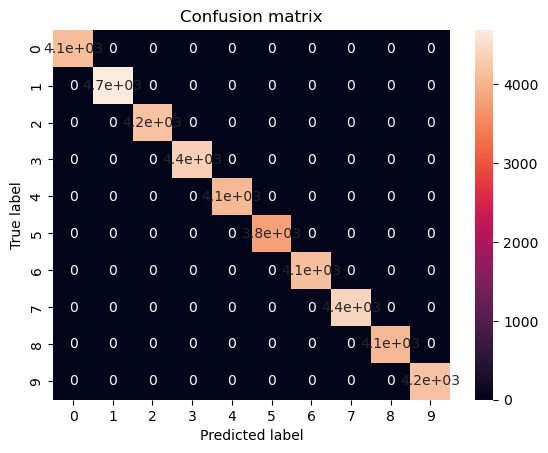

In [7]:
from sklearn import metrics

# Predict
y_proba = clf.predict_proba(X)
y_pred = clf.predict(X)

# Print scores
metric_names = ['accuracy_score','precision_score','recall_score','f1_score']
print('accuracy score:', metrics.accuracy_score(y,y_pred))
print('precision score:', metrics.precision_score(y,y_pred,average='weighted'))
print('precision score:', metrics.recall_score(y,y_pred,average='weighted'))
print('precision score:', metrics.f1_score(y,y_pred,average='weighted'))

# Plot confusion matrix
cm = metrics.confusion_matrix(y,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

## Predict test set and submit

In [8]:
X_test = test_df.values.astype('float32')/255
y_pred_test = clf.predict(X_test)

ids = np.arange(1,len(y_pred_test)+1,dtype=int)
df_submission = pd.DataFrame({'ImageId':ids,
                              'Label':y_pred_test})
df_submission.to_csv("MnistSubmissionPB.csv",index=False)
df_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


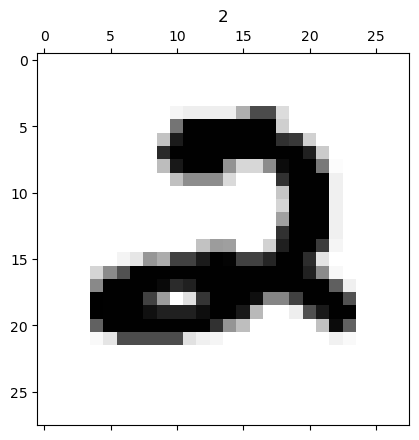

In [13]:
ex_idx = 0
ex_label = y_pred_test[ex_idx]
ex_image = X_test[ex_idx,:].reshape(28,28)
plt.matshow(ex_image,cmap='binary')
plt.title(ex_label)
plt.show()

In [21]:
# Submit to kaggle
import json
import os

with open("../Kaggle_Houses/kaggle.json","rb") as f:
    credentials = json.load(f)
credentials

os.environ["KAGGLE_USERNAME"]=credentials["username"]
os.environ["KAGGLE_KEY"]=credentials["key"]

In [22]:
import kaggle

!kaggle competitions submit -c digit-recognizer -f MnistSubmissionPB.csv -m "MNIST digit recognition MLP"

100%|█████████████████████████████████████████| 208k/208k [00:01<00:00, 209kB/s]
Successfully submitted to Digit Recognizer